<a href="https://colab.research.google.com/github/Data-Science-Specialist/Data-Science/blob/main/%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D1%81%D0%BE%D0%BB%D0%BD%D0%B5%D1%87%D0%BD%D0%BE%D0%B9_%D0%B0%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D0%BE%D1%81%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Содержание:

***Введение***
   
   **Парсинг данных:**

  * Парсинг вспышек на Солнце за 2019 - 2023 (30.06.2023) гг.*

  * Парсинг активных пятен на Солнце за 2019 - 2023 (30.06.2023) гг.*
    
  * Парсинг магнитных бурь за 2019 - 2023 (30.06.2023) гг.*
  
**Очистка и предобработка данных**

**EDA**

## Введение

В исследовании солнечной активности взят период от начала текущего 25-го солнечного цикла - 2019 год и по 30.06.2023 (правильнее сказать, 2019 год - год минимума в 11-летнем солнечном цикле, то есть 24 цикл закончился и начинается 25).

Цель исследования:
* проанализировать данные о солнечных вспышках, активных пятнах на Солнце и электромагнитной активности, полученные с 2019 года;
* изучить зависимости активных пятен на Солнце и электромагнитных данных.

Материалы для исследования взяты с общедоступного интернет-ресурса: https://tesis.xras.ru/sun_flares.html. Основным источником информации о солнечных вспышках является группировка аппаратов GOES, работающая по заказу NOAA (национальное агентство США, выполняющее функции, близкие к функциям Росгидромета). Информация о магнитных бурях предоставляется на основе так называемого планетарного индекса, являющегося интегральным по нескольким центрам, расположенных в разных географических положениях.


### Опсиание

Циклы активности Солнца открыл швейцарский астроном Рудольф Вольф в 1843 году. Он установил, что их продолжительность составляет около 11 лет, и отследил историю солнечной цикличности до 1749 года. Этот год астрономы считают началом цикла под условным номером один.

**Добавлю описание к терминам и понятиям, встречающимся в данной работе.**

1.  **Описание магнитного шторма по индексу** (описание предоставляет сайт https://tesis.xras.ru/sun_vocabulary.html?topic=8&news_id=921). Шкала силы магнитных бурь была введена Национальной Океанической и Атмосферной Администрацией США (National Oceanic and Atmospheric Administration; NOAA) в ноябре 1999 года.

Магнитные бури уровня G5 (экстремально сильные бури):

* возможны разрушения энергетических систем и повреждения трансформаторов;
* обширный поверхностный заряд, проблемы с ориентацией, связью и слежением за космическими кораблями;
* токи через трубопроводы достигают сотен ампер, один или два дня невозможна высокочастотная связь во многих района, ухудшение точности спутниковых систем навигации, низкочастотная радио-навигация выходит из строя на несколько часов, полярные сияния видны вплоть до экватора.
Kp = 9

Магнитные бури уровня G4 (очень сильные бури):
* возможны проблемы со стабильностью напряжения, частичные разрушения энергетических систем и отключение защитных систем;
* поверхностный заряд и проблемы слежения и ориентации, необходима коррекция;
* наведенные токи в трубопроводах требуют мер защиты, спорадическое прохождение ВЧ радиоволн, ухудшение спутниковой навигации на несколько часов, отказ низкочастотной радионавигации, и полярные сияния видны до тропиков.
Kp = 8

Магнитные бури уровня G3 (сильные бури):
* неoбходима коррекция напряжения, ложные срабатывания систем защиты и высокий "газ в масле" в масляных трансформаторах;
* поверхностный заряд на элементах космических аппратов, увеличение сноса аппарата с орбиты, проблемы ориентации;
* перерывы в спутниковой навигации и проблемы низкочастотной радионавигации, прерывания ВЧ радиосвязи, полярные сияния видны до средних широт.
Kp = 7

Магнитные бури уровня G2 (умеренные бури):
* воздействуют на энергетические системы, расположенные на высоких широтах;
* необходимы корректирующие действия с центров управления, отличия от прогнозируемого орбитального сноса космических аппаратов;
* ухудшение распространения ВЧ радиоволн на высоких широтах, полярные сияния видны до широты 50 градусов.
Kp = 6

Магнитные бури уровня G1 (слабые бури):
* слабые флуктуации в энергетических системах;
* небольшие влияния на системы управления космическими аппаратами;
* полярные сияния видны на высоких широтах (до 60 градусов), влияние на начало миграций животных.
Kp = 5

K (Planetary K Index) - планетарный индекс К. Агентство NOAA передаёт значения от 0 до 9. Этот индекс показывает степень нарушения магнитного поля Земли в горизонтальной составляющей. Значение измеряется в нТл с помощью магнитометра в течение трех-часовой интервал, а затем преобразуется в фактор.

A (Planetary A Index) - планетарный индекс А. Агенство NOAA сообщают в центр обработки информации значения от 0 до 400, но очень редко можно видеть числа более 80. Планетарный индекс А показывает ежедневный средний уровень геомагнитной активности. Используется 8 различных показаний и выдаётся усреднённое значение за 3 часа индекса (магнитная величина, измеряемая в nanotesla или нТл), чтобы обеспечить уровень нестабильности в пределах геомагнитного поля Земли. При использовании совместно с K-индексом необходимо обращать внимание на то, что, если оба индекса имеют высокие значения, то геомагнитное поле Земли неустойчиво. Это скажется на том, что ВЧ-сигналы будут склонны к внезапным замираниям, и некоторые трассы будут закрыты. Резкое возрастание индекса K при низком значении индекса А указывает на внезапное, резкое возмущение геомагнитного поля, которое может вызвать интенсивное, но кратковременные перебои, вызвать появление северного сияния. Обновляется значение один раз в день.

2. **Описание магнитных типов группы пятен** (описание взято с сайта https://www.spaceweatherlive.com/ru/pomoshch/magnitnaya-klassifikaciya-solnechnyh-pyaten.html). Классификацию областей солнечных пятен разработали в обсерватории Маунт-Вильсон, Калифорния (США). Солнечные пятна анализируются ежедневно и каждая группа получает число, магнитную классификацию и классификацию пятна специалистами по космической погоде.

* α – Alpha: Однополярная группа солнечных пятен.
* β – Бета: Группа солнечных пятен, которая имеет положительную и отрицательную полярность (биполярная) с простым делением между полярностями.
* γ – Gamma: Сложная область, в которой положительная и отрицательная полярности распределены нерегулярно, по этому их нельзя классифицировать как биполярную группу солнечных пятен.

* β-γ – Бета-Гамма: Биполярная группа солнечных пятен, но достаточно сложная, так что ни одна силовая линия магнитного поля не может быть проведена между пятнами противоположной полярности.

* δ – Delta: Противоположной полярности в одной полутени.

* β-δ – Бета-Дельта: Группа солнечных пятен с общей бета-магнитной конфигурацией, но содержит одно (или более) дельта-пятно.

* β-γ-δ – Бета-Гамма-Дельта: Группа солнечных пятен с бета-гамма-магнитной конфигурацией, но содержит одно (или более) дельта-пятно.

* γ-δ – Gamma-Delta: Группа солнечных пятен с гамма-магнитной конфигурацией, но содержит одно (или более) дельта-пятно.


3. **Описание по модифицированной системе Цюриха, зашифрованнные в аббревиатуру типа 'Bxo'**.

https://www.saga.iao.ru/glossary/?catalog=0&sowa=All&term=@882

Солнечные пятна классифицируются по размеру, форме и плотности пятен. Они классифицируются с использованием набора из трех кодированных букв (Zpc) следующим образом:

Z — модифицированный класс Цюриха с маркировкой от A до F плюс H.

А – Одиночное маленькое пятно (одиночная магнитная полярность).
Б – Очень небольшое распределение мелких пятен.
C – Два или более небольших пятен,
по крайней мере один из которых имеет заметную полутень.
D — Группа пятен среднего размера, некоторые из которых могут иметь заметные полутени. Магнитная сложность областей D-типа обычно способна вызывать вспышки C- и малоинтенсивных вспышек M-класса.
E - От умеренной до большой площади довольно сложной системы солнечных пятен,
некоторые из них имеют заметные полутени и хорошее разрешение. Часто способен производить как небольшие вспышки C-класса, так и крупные вспышки M-класса.
F – Большая или очень большая площадь сложной системы солнечных пятен. Эти регионы часто способны производить крупные вспышки X-класса, а также многочисленные крупные вспышки M-класса и множество C-класса.
классовые события (в зависимости от их магнитной сложности).
H - Одиночное солнечное пятно от большого до очень большого размера (обычно не способное вызывать значительные энергетические события). Этот тип солнечных пятен обычно проявляется на этапе умирания группы солнечных пятен.

р - тип полутени самого крупного пятна в группе.

х - Одно пятно.
р - Рудиментарный.
s - Малый симметричный.
а
- Небольшая асимметричность.
h - Большой симметричный.
к - Крупный асимметричный.

в - Относительное распределение пятен или компактность группы.

х - Одно пятно.
о - Открытая группа (разделенная довольно широким пространством).
i - Промежуточный (умеренная компактность пятен в группе).
в — Компактный (очень плотные и сложные пятна внутри группы).

4. **Описание вспышек:**

Согласно классификации, которая была предложена в 1970 году Д.Бейкером, солнечной вспышке присваивается балл — обозначение из латинской буквы и индекса за ней. Буквой может быть A, B, C, M или X в зависимости от величины пика интенсивности рентгеновского излучения.

* Солнечные вспышки A & B-класса - это самый низкий класс солнечных вспышек. Они очень распространены и не очень интересны.

* Солнечные вспышки класса С - это небольшие вспышки, которые практически не оказывают влияния на Землю. Только длительные вспышки С-класса могут привести к выбросу корональной массы но чаще всего они медленны, слабы и редко вызывают на Земле значительные геомагнитные возмущения.

* Солнечные вспышки M-класса - это средние из больших вспышек. Они вызывают от небольшого (R1) до умеренного (R2) уровня радиопомех на дневной стороне Земли. Некоторые вспышки M-класса могут вызвать солнечный радиационный шторм. Сильные, длительные вспышки M-класса, с большой долей вероятности могут привести к выбросу корональной массы. Если вспышка M-класса расположена вблизи центра обращенного к Земле солнечного диска и запускает выброс корональной массы в ее сторону, вероятность того, что результирующая геомагнитная буря будет достаточной силы для наблюдения северного сияния в области средних широт, достаточно высока.

* Солнечные вспышки X-класса - являются самыми большими и мощьными. В среднем вспышки X-класса происходят примерно 10 раз в год и чаще встречаются при солнечном максимуме. Во время вспышки X-класса на дневной стороне Земли, уровень радиопомех сильный до экстремального (R3-R5). Если солнечная вспышка происходит вблизи центра обращенного к Земле солнечного диска, это может вызвать сильный и продолжительный шторм солнечной радиации и создать значительный выброс корональной массы который может привести к серьезным (G4) или экстремальным (G5) геомагнитным штормам на Земле.

5. **Описание перевода в значение Энергии.**

Со́лнечная вспышка — взрывной процесс выделения энергии (световой, тепловой и кинетической) в атмосфере Солнца. Вспышки так или иначе охватывают все слои солнечной атмосферы: фотосферу, хромосферу и корону Солнца. Необходимо отметить, что солнечные вспышки и корональные выбросы массы являются различными и независимыми явлениями солнечной активности.

Продолжительность импульсной фазы солнечных вспышек обычно не превышает нескольких минут, а количество энергии, высвобождаемой за это время, может достигать миллиардов мегатонн в тротиловом эквиваленте. Энергию вспышки традиционно определяют в видимом диапазоне электромагнитных волн.

Солнечные вспышки, как правило, происходят в местах взаимодействия солнечных пятен противоположной магнитной полярности или, более точно, вблизи нейтральной линии магнитного поля, разделяющей области северной и южной полярности. Частота и мощность солнечных вспышек зависят от фазы 11-летнего солнечного цикла.

 По данным сайта https://www.spaceweatherlive.com/ru/pomoshch/chto-predstavlyayut-soboy-solnechnye-vspyshki.html солнечные вспышки классифицируются следующим образом:

"Солнечные вспышки классифицируются как A, B, C, M или X в соответствии с пиковым потоком (в Ваттах на квадратный метр, Вт/м2) длинной волны от 1 до 8 Ангстрем в околоземном пространстве, как измеряется прибором XRS на борту спутник GOES-15, который находится на геостационарной орбите над Тихим океаном.

Класс пятна по	Вт/м2 между 1 и 8 Ангстрем (метрическая единица длины, равная 10^-10 м, то есть из одной десятимиллиардной (США) метра, в стомиллионной доли сантиметра):
* A	<10-7
* B	≥10-7 <10-6
* C	≥10-6 <10-5
* M	≥10-5 <10-4
* X	≥10-4 "

То есть возведя число 10 в соотвествующую степень со знаком "-" мы получим соответствующее значение Энергии. При умножении берётся крайняя левая граница интеравала.

## Импорты и открытие датасетов

In [ ]:
pip install plotly

In [1]:
#import warnings
#warnings.filterwarnings('ignore')

# Выводим нужные импорты
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import calendar
import ftplib
import os
from datetime import time

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

from sklearn.model_selection import train_test_split # деление на 2 выборки
from sklearn.preprocessing import StandardScaler # для масштабирования количественных признаков
from sklearn.model_selection import GridSearchCV # для поиска оптимальных параметров
from sklearn.metrics import mean_squared_error # для расчета MSE и RMSE
from sklearn.metrics import mean_absolute_error # для расчета MAE
from sklearn.linear_model import LinearRegression # линейная регрессия
from sklearn.ensemble import RandomForestRegressor # случайный лес
from sklearn.tree import DecisionTreeRegressor # дерео решений
from sklearn.dummy import DummyRegressor # наивная модель
from scipy import stats as st # для доверительного интервала
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

In [2]:
from google.colab import drive
drive.mount ('/content/drive/')

Mounted at /content/drive/


In [3]:
dfsun_2019 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/dfsun_2019.xlsx')
dfsun_2020 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/dfsun_2020.xlsx')
dfsun_2021 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/dfsun_2021.xlsx')
dfsun_2022 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/dfsun_2022.xlsx')
dfsun_2023 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/dfsun_2023.xlsx')

dfsun_2019m = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/dfsun_2019m.xlsx')
dfsun_2020m = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/dfsun_2020m.xlsx')
dfsun_2021m = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/dfsun_2021m.xlsx')
dfsun_2022m = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/dfsun_2022m.xlsx')
dfsun_2023m = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/dfsun_2023m.xlsx')

dfact_2019 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/dfact_2019.xlsx')
dfact_2020 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/dfact_2020.xlsx')
dfact_2021 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/dfact_2021.xlsx')
dfact_2022 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/dfact_2022.xlsx')
dfact_2023 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/dfact_2023.xlsx')

dfsun_act19 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/dfsun_act19.xlsx')
dfsun_act20 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/dfsun_act20.xlsx')
dfsun_act21 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/dfsun_act21.xlsx')
dfsun_act22 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/dfsun_act22.xlsx')
dfsun_act23 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/dfsun_act23.xlsx')

magnetic_storms_2019 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/magnetic_storms_2019.xlsx')
magnetic_storms_2020 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/magnetic_storms_2020.xlsx')
magnetic_storms_2021 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/magnetic_storms_2021.xlsx')
magnetic_storms_2022 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/magnetic_storms_2022.xlsx')
magnetic_storms_2023 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Солнце/magnetic_storms_2023.xlsx')

## Парсинг данных

#### Парсинг вспышек на Солнце за 2019 год

In [ ]:
# Создаем пустой датафрейм
sun_flares_2019 = pd.DataFrame()

# Проходим по всем дням в периоде с января по декабрь 2019 года
for month in range(1, 13):
    # Определяем количество дней в месяце
    num_days = calendar.monthrange(2019, month)[1]
    for day in range(1, num_days + 1):
        # Отправляем GET-запрос на страницу
        url = f'https://tesis.xras.ru/sun_flares.html?m={month}&d={day}&y=2019'
        response = requests.get(url)

        # Создаем объект BeautifulSoup для парсинга HTML-кода страницы
        soup = BeautifulSoup(response.content, 'html.parser')

        # Находим таблицу с помощью ее атрибутов
        table = soup.find('table', {'class': 'fl'})

        # Проверяем, что таблица была найдена
        if table is None:
            print(f'Таблица не найдена для {day}.{month}.2019')
        else:
            # Преобразуем таблицу в датафрейм
            df = pd.read_html(str(table))[0]

            # Добавляем столбец с текущей датой
            date = datetime(2019, month, day).strftime('%Y-%m-%d')
            df['Дата'] = date

            # Добавляем датафрейм в общий датафрейм
            sun_flares_2019 = pd.concat([sun_flares_2019, df], ignore_index=True)

# Выводим общий датафрейм на экран
print(sun_flares_2019.head())
sun_flares_2019.to_excel('sun_flares_2019.xlsx')

Таблица не найдена для 1.1.2019
Таблица не найдена для 2.1.2019
Таблица не найдена для 3.1.2019
Таблица не найдена для 4.1.2019
Таблица не найдена для 5.1.2019
Таблица не найдена для 8.1.2019
Таблица не найдена для 9.1.2019
Таблица не найдена для 10.1.2019
Таблица не найдена для 11.1.2019
Таблица не найдена для 12.1.2019
Таблица не найдена для 13.1.2019
Таблица не найдена для 14.1.2019
Таблица не найдена для 15.1.2019
Таблица не найдена для 16.1.2019
Таблица не найдена для 17.1.2019
Таблица не найдена для 18.1.2019
Таблица не найдена для 19.1.2019
Таблица не найдена для 20.1.2019
Таблица не найдена для 21.1.2019
Таблица не найдена для 22.1.2019
Таблица не найдена для 23.1.2019
Таблица не найдена для 24.1.2019
Таблица не найдена для 25.1.2019
Таблица не найдена для 28.1.2019
Таблица не найдена для 1.2.2019
Таблица не найдена для 2.2.2019
Таблица не найдена для 3.2.2019
Таблица не найдена для 4.2.2019
Таблица не найдена для 5.2.2019
Таблица не найдена для 6.2.2019
Таблица не найдена для 

#### Парсинг вспышек на Солнце за 2020 год

In [ ]:
# Создаем пустой датафрейм
sun_flares_2020 = pd.DataFrame()

# Проходим по всем дням в периоде с января по декабрь 2020 года
for month in range(1, 13):
    # Определяем количество дней в месяце
    num_days = calendar.monthrange(2020, month)[1]
    for day in range(1, num_days + 1):
        # Отправляем GET-запрос на страницу
        url = f'https://tesis.xras.ru/sun_flares.html?m={month}&d={day}&y=2020'
        response = requests.get(url)

        # Создаем объект BeautifulSoup для парсинга HTML-кода страницы
        soup = BeautifulSoup(response.content, 'html.parser')

        # Находим таблицу с помощью ее атрибутов
        table = soup.find('table', {'class': 'fl'})

        # Проверяем, что таблица была найдена
        if table is None:
            print(f'Таблица не найдена для {day}.{month}.2020')
        else:
            # Преобразуем таблицу в датафрейм
            df = pd.read_html(str(table))[0]

            # Добавляем столбец с текущей датой
            date = datetime(2020, month, day).strftime('%Y-%m-%d')
            df['Дата'] = date

            # Добавляем датафрейм в общий датафрейм
            sun_flares_2020 = pd.concat([sun_flares_2020, df], ignore_index=True)

# Выводим общий датафрейм на экран
print(sun_flares_2020.head())
sun_flares_2020.to_excel('sun_flares_2020.xlsx')

Таблица не найдена для 1.1.2020
Таблица не найдена для 2.1.2020
Таблица не найдена для 3.1.2020
Таблица не найдена для 4.1.2020
Таблица не найдена для 5.1.2020
Таблица не найдена для 6.1.2020
Таблица не найдена для 7.1.2020
Таблица не найдена для 8.1.2020
Таблица не найдена для 9.1.2020
Таблица не найдена для 10.1.2020
Таблица не найдена для 11.1.2020
Таблица не найдена для 12.1.2020
Таблица не найдена для 13.1.2020
Таблица не найдена для 14.1.2020
Таблица не найдена для 15.1.2020
Таблица не найдена для 16.1.2020
Таблица не найдена для 17.1.2020
Таблица не найдена для 18.1.2020
Таблица не найдена для 19.1.2020
Таблица не найдена для 20.1.2020
Таблица не найдена для 21.1.2020
Таблица не найдена для 22.1.2020
Таблица не найдена для 23.1.2020
Таблица не найдена для 24.1.2020
Таблица не найдена для 25.1.2020
Таблица не найдена для 26.1.2020
Таблица не найдена для 27.1.2020
Таблица не найдена для 28.1.2020
Таблица не найдена для 29.1.2020
Таблица не найдена для 30.1.2020
Таблица не найдена 

#### Парсинг вспышек на Солнце за 2021 год

In [ ]:
# Создаем пустой датафрейм
sun_flares_2021 = pd.DataFrame()

# Проходим по всем дням в периоде с января по декабрь 2021 года
for month in range(1, 13):
    # Определяем количество дней в месяце
    num_days = calendar.monthrange(2021, month)[1]
    for day in range(1, num_days + 1):
        # Отправляем GET-запрос на страницу
        url = f'https://tesis.xras.ru/sun_flares.html?m={month}&d={day}&y=2021'
        response = requests.get(url)

        # Создаем объект BeautifulSoup для парсинга HTML-кода страницы
        soup = BeautifulSoup(response.content, 'html.parser')

        # Находим таблицу с помощью ее атрибутов
        table = soup.find('table', {'class': 'fl'})

        # Проверяем, что таблица была найдена
        if table is None:
            print(f'Таблица не найдена для {day}.{month}.2021')
        else:
            # Преобразуем таблицу в датафрейм
            df = pd.read_html(str(table))[0]

            # Добавляем столбец с текущей датой
            date = datetime(2021, month, day).strftime('%Y-%m-%d')
            df['Дата'] = date

            # Добавляем датафрейм в общий датафрейм
            sun_flares_2021 = pd.concat([sun_flares_2021, df], ignore_index=True)

# Выводим общий датафрейм на экран
print(sun_flares_2021.head())
sun_flares_2021.to_excel('sun_flares_2021.xlsx')

Таблица не найдена для 1.1.2021
Таблица не найдена для 2.1.2021
Таблица не найдена для 3.1.2021
Таблица не найдена для 4.1.2021
Таблица не найдена для 5.1.2021
Таблица не найдена для 6.1.2021
Таблица не найдена для 7.1.2021
Таблица не найдена для 8.1.2021
Таблица не найдена для 9.1.2021
Таблица не найдена для 10.1.2021
Таблица не найдена для 11.1.2021
Таблица не найдена для 12.1.2021
Таблица не найдена для 13.1.2021
Таблица не найдена для 14.1.2021
Таблица не найдена для 15.1.2021
Таблица не найдена для 16.1.2021
Таблица не найдена для 17.1.2021
Таблица не найдена для 18.1.2021
Таблица не найдена для 22.1.2021
Таблица не найдена для 23.1.2021
Таблица не найдена для 24.1.2021
Таблица не найдена для 25.1.2021
Таблица не найдена для 26.1.2021
Таблица не найдена для 27.1.2021
Таблица не найдена для 28.1.2021
Таблица не найдена для 29.1.2021
Таблица не найдена для 30.1.2021
Таблица не найдена для 31.1.2021
Таблица не найдена для 1.2.2021
Таблица не найдена для 2.2.2021
Таблица не найдена дл

#### Парсинг вспышек на Солнце за 2022 год

In [ ]:
# Создаем пустой датафрейм
sun_flares_2022 = pd.DataFrame()

# Проходим по всем дням в периоде с января по декабрь 2022 года
for month in range(1, 13):
    # Определяем количество дней в месяце
    num_days = calendar.monthrange(2022, month)[1]
    for day in range(1, num_days + 1):
        # Отправляем GET-запрос на страницу
        url = f'https://tesis.xras.ru/sun_flares.html?m={month}&d={day}&y=2022'
        response = requests.get(url)

        # Создаем объект BeautifulSoup для парсинга HTML-кода страницы
        soup = BeautifulSoup(response.content, 'html.parser')

        # Находим таблицу с помощью ее атрибутов
        table = soup.find('table', {'class': 'fl'})

        # Проверяем, что таблица была найдена
        if table is None:
            print(f'Таблица не найдена для {day}.{month}.2022')
        else:
            # Преобразуем таблицу в датафрейм
            df = pd.read_html(str(table))[0]

            # Добавляем столбец с текущей датой
            date = datetime(2022, month, day).strftime('%Y-%m-%d')
            df['Дата'] = date

            # Добавляем датафрейм в общий датафрейм
            sun_flares_2022 = pd.concat([sun_flares_2022, df], ignore_index=True)

# Выводим общий датафрейм на экран
print(sun_flares_2022.head())
sun_flares_2022.to_excel('sun_flares_2022.xlsx')

Таблица не найдена для 4.1.2022
Таблица не найдена для 5.1.2022
Таблица не найдена для 6.1.2022
Таблица не найдена для 10.1.2022
Таблица не найдена для 22.1.2022
Таблица не найдена для 23.1.2022
Таблица не найдена для 23.2.2022
Таблица не найдена для 24.2.2022
Таблица не найдена для 25.2.2022
Таблица не найдена для 1.6.2022
Таблица не найдена для 4.6.2022
Таблица не найдена для 7.6.2022
Таблица не найдена для 8.6.2022
Таблица не найдена для 29.6.2022
Таблица не найдена для 2.7.2022
Таблица не найдена для 31.7.2022
Таблица не найдена для 7.8.2022
Таблица не найдена для 10.8.2022
Таблица не найдена для 27.11.2022
Таблица не найдена для 28.11.2022
                    0                 1         2         3          4  \
0                 NaN  Активная область    Начало  Максимум  Окончание   
1  Вспышка балла C2.3              2918  21:59:00  22:09:00   22:15:00   
2  Вспышка балла M1.1              2918  10:07:00  10:30:00   10:42:00   
3                 NaN  Активная область    Начало  

#### Парсинг вспышек на Солне за 2023 (01.01.23-30.06.23) год

In [ ]:
# Создаем пустой датафрейм
sun_flares_2023 = pd.DataFrame()

# Проходим по всем дням в периоде с января по июнь 2023 года
for month in range(1, 7):
    # Определяем количество дней в месяце
    num_days = calendar.monthrange(2023, month)[1]
    for day in range(1, num_days + 1):
        # Отправляем GET-запрос на страницу
        url = f'https://tesis.xras.ru/sun_flares.html?m={month}&d={day}&y=2023'
        response = requests.get(url)

        # Создаем объект BeautifulSoup для парсинга HTML-кода страницы
        soup = BeautifulSoup(response.content, 'html.parser')

        # Находим таблицу с помощью ее атрибутов
        table = soup.find('table', {'class': 'fl'})

        # Проверяем, что таблица была найдена
        if table is None:
            print(f'Таблица не найдена для {day}.{month}.2023')
        else:
            # Преобразуем таблицу в датафрейм
            df = pd.read_html(str(table))[0]

            # Добавляем столбец с текущей датой
            date = datetime(2023, month, day).strftime('%Y-%m-%d')
            df['Дата'] = date

            # Добавляем датафрейм в общий датафрейм
            sun_flares_2023 = pd.concat([sun_flares_2023, df], ignore_index=True)

# Выводим общий датафрейм на экран
print(sun_flares_2023.head())
sun_flares_2023.to_excel('sun_flares_2023.xlsx')

                    0                 1         2         3          4  \
0                 NaN  Активная область    Начало  Максимум  Окончание   
1  Вспышка балла C1.1              3180  22:31:00  22:35:00   22:43:00   
2  Вспышка балла C1.8              3180  20:43:00  20:52:00   21:09:00   
3  Вспышка балла C1.7              3177  17:16:00  17:30:00   17:35:00   
4  Вспышка балла C1.9              3180  10:35:00  10:44:00   10:50:00   

         Дата  
0  2023-01-01  
1  2023-01-01  
2  2023-01-01  
3  2023-01-01  
4  2023-01-01  


#### Парсинг активных пятен на Солнце за 2019 год

In [ ]:
# Создаем пустой датафрейм
active_areas_2019 = pd.DataFrame()

# Проходим по всем дням в периоде с января по декбрь 2019 года
for month in range(1, 13):
    # Определяем количество дней в месяце
    num_days = calendar.monthrange(2019, month)[1]
    for day in range(1, num_days + 1):
        # Отправляем GET-запрос на страницу
        url = f'https://tesis.xras.ru/active_areas.html?m={month}&d={day}&y=2019'
        response = requests.get(url)

        # Создаем объект BeautifulSoup для парсинга HTML-кода страницы
        soup = BeautifulSoup(response.content, 'html.parser')

        # Находим таблицу с помощью ее атрибутов
        table = soup.find('table', {'class': 'table_1'})

        # Проверяем, что таблица была найдена
        if table is None:
            print(f'Таблица не найдена для {day}.{month}.2019')
        else:
            # Преобразуем таблицу в датафрейм
            df = pd.read_html(str(table))[0]

            # Добавляем столбец с текущей датой
            date = datetime(2019, month, day).strftime('%Y-%m-%d')
            df['Дата'] = date

            # Добавляем датафрейм в общий датафрейм
            active_areas_2019 = pd.concat([active_areas_2019, df], ignore_index=True)

# Выводим общий датафрейм на экран
print(active_areas_2019.head())
active_areas_2019.to_excel('active_areas_2019.xlsx')


Таблица не найдена для 1.1.2019
Таблица не найдена для 8.1.2019
Таблица не найдена для 9.1.2019
Таблица не найдена для 10.1.2019
Таблица не найдена для 11.1.2019
Таблица не найдена для 12.1.2019
Таблица не найдена для 13.1.2019
Таблица не найдена для 14.1.2019
Таблица не найдена для 15.1.2019
Таблица не найдена для 16.1.2019
Таблица не найдена для 17.1.2019
Таблица не найдена для 18.1.2019
Таблица не найдена для 19.1.2019
Таблица не найдена для 20.1.2019
Таблица не найдена для 21.1.2019
Таблица не найдена для 22.1.2019
Таблица не найдена для 1.2.2019
Таблица не найдена для 2.2.2019
Таблица не найдена для 3.2.2019
Таблица не найдена для 4.2.2019
Таблица не найдена для 5.2.2019
Таблица не найдена для 6.2.2019
Таблица не найдена для 7.2.2019
Таблица не найдена для 8.2.2019
Таблица не найдена для 9.2.2019
Таблица не найдена для 10.2.2019
Таблица не найдена для 11.2.2019
Таблица не найдена для 12.2.2019
Таблица не найдена для 13.2.2019
Таблица не найдена для 14.2.2019
Таблица не найдена для

#### Парсинг активных пятен на Солнце за 2020 год

In [ ]:
# Создаем пустой датафрейм
active_areas_2020 = pd.DataFrame()

# Проходим по всем дням в периоде с января по декбрь 2020 года
for month in range(1, 13):
    # Определяем количество дней в месяце
    num_days = calendar.monthrange(2020, month)[1]
    for day in range(1, num_days + 1):
        # Отправляем GET-запрос на страницу
        url = f'https://tesis.xras.ru/active_areas.html?m={month}&d={day}&y=2020'
        response = requests.get(url)

        # Создаем объект BeautifulSoup для парсинга HTML-кода страницы
        soup = BeautifulSoup(response.content, 'html.parser')

        # Находим таблицу с помощью ее атрибутов
        table = soup.find('table', {'class': 'table_1'})

        # Проверяем, что таблица была найдена
        if table is None:
            print(f'Таблица не найдена для {day}.{month}.2020')
        else:
            # Преобразуем таблицу в датафрейм
            df = pd.read_html(str(table))[0]

            # Добавляем столбец с текущей датой
            date = datetime(2020, month, day).strftime('%Y-%m-%d')
            df['Дата'] = date

            # Добавляем датафрейм в общий датафрейм
            active_areas_2020 = pd.concat([active_areas_2020, df], ignore_index=True)

# Выводим общий датафрейм на экран
print(active_areas_2020.head())
active_areas_2020.to_excel('active_areas_2020.xlsx')


Таблица не найдена для 14.1.2020
Таблица не найдена для 15.1.2020
Таблица не найдена для 16.1.2020
Таблица не найдена для 17.1.2020
Таблица не найдена для 18.1.2020
Таблица не найдена для 19.1.2020
Таблица не найдена для 20.1.2020
Таблица не найдена для 21.1.2020
Таблица не найдена для 22.1.2020
Таблица не найдена для 23.1.2020
Таблица не найдена для 24.1.2020
Таблица не найдена для 4.2.2020
Таблица не найдена для 5.2.2020
Таблица не найдена для 6.2.2020
Таблица не найдена для 7.2.2020
Таблица не найдена для 8.2.2020
Таблица не найдена для 9.2.2020
Таблица не найдена для 10.2.2020
Таблица не найдена для 11.2.2020
Таблица не найдена для 12.2.2020
Таблица не найдена для 13.2.2020
Таблица не найдена для 14.2.2020
Таблица не найдена для 15.2.2020
Таблица не найдена для 16.2.2020
Таблица не найдена для 17.2.2020
Таблица не найдена для 18.2.2020
Таблица не найдена для 19.2.2020
Таблица не найдена для 20.2.2020
Таблица не найдена для 21.2.2020
Таблица не найдена для 22.2.2020
Таблица не найде

#### Парсинг активных пятен на Солнце за 2021 год

In [ ]:
# Создаем пустой датафрейм
active_areas_2021 = pd.DataFrame()

# Проходим по всем дням в периоде с января по декбрь 2021 года
for month in range(1, 13):
    # Определяем количество дней в месяце
    num_days = calendar.monthrange(2021, month)[1]
    for day in range(1, num_days + 1):
        # Отправляем GET-запрос на страницу
        url = f'https://tesis.xras.ru/active_areas.html?m={month}&d={day}&y=2021'
        response = requests.get(url)

        # Создаем объект BeautifulSoup для парсинга HTML-кода страницы
        soup = BeautifulSoup(response.content, 'html.parser')

        # Находим таблицу с помощью ее атрибутов
        table = soup.find('table', {'class': 'table_1'})

        # Проверяем, что таблица была найдена
        if table is None:
            print(f'Таблица не найдена для {day}.{month}.2021')
        else:
            # Преобразуем таблицу в датафрейм
            df = pd.read_html(str(table))[0]

            # Добавляем столбец с текущей датой
            date = datetime(2021, month, day).strftime('%Y-%m-%d')
            df['Дата'] = date

            # Добавляем датафрейм в общий датафрейм
            active_areas_2021 = pd.concat([active_areas_2021, df], ignore_index=True)

# Выводим общий датафрейм на экран
print(active_areas_2021.head())
active_areas_2021.to_excel('active_areas_2021.xlsx')


Таблица не найдена для 6.1.2021
Таблица не найдена для 7.1.2021
Таблица не найдена для 8.1.2021
Таблица не найдена для 9.1.2021
Таблица не найдена для 10.1.2021
Таблица не найдена для 11.1.2021
Таблица не найдена для 12.1.2021
Таблица не найдена для 13.1.2021
Таблица не найдена для 14.1.2021
Таблица не найдена для 15.1.2021
Таблица не найдена для 8.2.2021
Таблица не найдена для 9.2.2021
Таблица не найдена для 10.2.2021
Таблица не найдена для 11.2.2021
Таблица не найдена для 12.2.2021
Таблица не найдена для 13.2.2021
Таблица не найдена для 14.2.2021
Таблица не найдена для 15.2.2021
Таблица не найдена для 16.2.2021
Таблица не найдена для 17.2.2021
Таблица не найдена для 18.2.2021
Таблица не найдена для 10.4.2021
Таблица не найдена для 11.4.2021
Таблица не найдена для 12.4.2021
Таблица не найдена для 3.5.2021
Таблица не найдена для 4.5.2021
Таблица не найдена для 5.5.2021
Таблица не найдена для 6.5.2021
Таблица не найдена для 7.5.2021
Таблица не найдена для 18.10.2021
  Номер группы Коорд

#### Парсинг активных пятен на Солнце за 2022 год

In [ ]:
# Создаем пустой датафрейм
active_areas_2022 = pd.DataFrame()

# Проходим по всем дням в периоде с января по декбрь 2022 года
for month in range(1, 13):
    # Определяем количество дней в месяце
    num_days = calendar.monthrange(2022, month)[1]
    for day in range(1, num_days + 1):
        # Отправляем GET-запрос на страницу
        url = f'https://tesis.xras.ru/active_areas.html?m={month}&d={day}&y=2022'
        response = requests.get(url)

        # Создаем объект BeautifulSoup для парсинга HTML-кода страницы
        soup = BeautifulSoup(response.content, 'html.parser')

        # Находим таблицу с помощью ее атрибутов
        table = soup.find('table', {'class': 'table_1'})

        # Проверяем, что таблица была найдена
        if table is None:
            print(f'Таблица не найдена для {day}.{month}.2022')
        else:
            # Преобразуем таблицу в датафрейм
            df = pd.read_html(str(table))[0]

            # Добавляем столбец с текущей датой
            date = datetime(2022, month, day).strftime('%Y-%m-%d')
            df['Дата'] = date

            # Добавляем датафрейм в общий датафрейм
            active_areas_2022 = pd.concat([active_areas_2022, df], ignore_index=True)

# Выводим общий датафрейм на экран
print(active_areas_2022.head())
active_areas_2022.to_excel('active_areas_2022.xlsx')


Таблица не найдена для 17.12.2022
  Номер группы Координаты на Солнце  Число пятен в группе  \
0       № 2916              S16 W49                   8.0   
1       № 2918              N22 W67                   2.0   
2       № 2919              S12 W15                   1.0   
3       № 2922              S17 E24                   2.0   
4       № 2916              S18 W61                   4.0   

  Классификация группы по модифицированной системе Цюриха  \
0                                                Ehi        
1                                                Bxo        
2                                                Hrx        
3                                                Cso        
4                                                Ehi        

   Площадь (в миллионных долях солнечной полусферы)  \
0                                             420.0   
1                                              20.0   
2                                              10.0   
3           

#### Парсинг активных пятен на Солнце за 2023 (01.01.23-30.06.23) год

In [ ]:
# Создаем пустой датафрейм
active_areas_2023 = pd.DataFrame()

# Проходим по всем дням в периоде с января по июнь 2023 года
for month in range(1, 7):
    # Определяем количество дней в месяце
    num_days = calendar.monthrange(2023, month)[1]
    for day in range(1, num_days + 1):
        # Отправляем GET-запрос на страницу
        url = f'https://tesis.xras.ru/active_areas.html?m={month}&d={day}&y=2023'
        response = requests.get(url)

        # Создаем объект BeautifulSoup для парсинга HTML-кода страницы
        soup = BeautifulSoup(response.content, 'html.parser')

        # Находим таблицу с помощью ее атрибутов
        table = soup.find('table', {'class': 'table_1'})

        # Проверяем, что таблица была найдена
        if table is None:
            print(f'Таблица не найдена для {day}.{month}.2023')
        else:
            # Преобразуем таблицу в датафрейм
            df = pd.read_html(str(table))[0]

            # Добавляем столбец с текущей датой
            date = datetime(2023, month, day).strftime('%Y-%m-%d')
            df['Дата'] = date

            # Добавляем датафрейм в общий датафрейм
            active_areas_2023 = pd.concat([active_areas_2023, df], ignore_index=True)

# Выводим общий датафрейм на экран
print(active_areas_2023.head())
active_areas_2023.to_excel('active_areas_2023.xlsx')


  Номер группы Координаты на Солнце  Число пятен в группе  \
0       № 3173              N24 W42                     1   
1       № 3176              N20 W03                    12   
2       № 3177              S18 E31                     6   
3       № 3179              N14 W37                     7   
4       № 3180              N19 E56                     6   

  Классификация группы по модифицированной системе Цюриха  \
0                                                Hrx        
1                                                Eko        
2                                                Dac        
3                                                Dki        
4                                                Dao        

   Площадь (в миллионных долях солнечной полусферы)  \
0                                                20   
1                                               430   
2                                               310   
3                                             

#### Парсинг магнитных бурь за 2019 год

In [ ]:
# Создаем пустой датафрейм
df = pd.DataFrame()

# Задаем диапазон дат
start_date = pd.Timestamp("2019-01-01")
end_date = pd.Timestamp("2019-12-31")

# Проходим по каждой дате в диапазоне
for date in pd.date_range(start_date, end_date):
    # Формируем URL-адрес для каждой даты
    url = f"https://tesis.xras.ru/magnetic_storms.html?m={date.month}&d={date.day}&y={date.year}"

    # Отправляем HTTP-запрос и получаем HTML-страницу
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    # Находим необходимые данные на странице
    radio_flux = soup.find(text="Поток радиоизлучения (10.7 см) = ")
    if radio_flux is not None:
        radio_flux = radio_flux.find_next("b").text.strip()
        df.at[date, "Поток радиоизлучения (10.7 см) = "] = radio_flux

    a_index = soup.find(text="Усредненный планетарный A-индекс = ")
    if a_index is not None:
        a_index = a_index.find_next("b").text.strip()
        df.at[date, "Усредненный планетарный A-индекс = "] = a_index

    kp_index = soup.find(text="Усредненный планетарный Kp-индекс = ")
    if kp_index is not None:
        kp_index = kp_index.find_next("b").text.strip()
        df.at[date, "Усредненный планетарный Kp-индекс = "] = kp_index

# Выводим общий датафрейм на экран
print(df.head())
df.to_excel('magnetic_storms_2019.xlsx')

           Поток радиоизлучения (10.7 см) =   \
2019-01-01                                72   
2019-01-02                                75   
2019-01-03                                75   
2019-01-04                                73   
2019-01-05                                72   

           Усредненный планетарный A-индекс =   \
2019-01-01                                   7   
2019-01-02                                   6   
2019-01-03                                   5   
2019-01-04                                   9   
2019-01-05                                  14   

           Усредненный планетарный Kp-индекс =   
2019-01-01                            3 (30 nT)  
2019-01-02                             1 (7 nT)  
2019-01-03                             1 (7 nT)  
2019-01-04                            3 (30 nT)  
2019-01-05                            5 (95 nT)  


#### Парсинг магнитных бурь за 2020 год

In [ ]:
# Создаем пустой датафрейм
df = pd.DataFrame()

# Задаем диапазон дат
start_date = pd.Timestamp("2020-01-01")
end_date = pd.Timestamp("2020-12-31")

# Проходим по каждой дате в диапазоне
for date in pd.date_range(start_date, end_date):
    # Формируем URL-адрес для каждой даты
    url = f"https://tesis.xras.ru/magnetic_storms.html?m={date.month}&d={date.day}&y={date.year}"

    # Отправляем HTTP-запрос и получаем HTML-страницу
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    # Находим необходимые данные на странице
    radio_flux = soup.find(text="Поток радиоизлучения (10.7 см) = ")
    if radio_flux is not None:
        radio_flux = radio_flux.find_next("b").text.strip()
        df.at[date, "Поток радиоизлучения (10.7 см) = "] = radio_flux

    a_index = soup.find(text="Усредненный планетарный A-индекс = ")
    if a_index is not None:
        a_index = a_index.find_next("b").text.strip()
        df.at[date, "Усредненный планетарный A-индекс = "] = a_index

    kp_index = soup.find(text="Усредненный планетарный Kp-индекс = ")
    if kp_index is not None:
        kp_index = kp_index.find_next("b").text.strip()
        df.at[date, "Усредненный планетарный Kp-индекс = "] = kp_index

# Выводим общий датафрейм на экран
print(df.head())
df.to_excel('magnetic_storms_2020.xlsx')

           Поток радиоизлучения (10.7 см) =   \
2020-01-01                                72   
2020-01-02                                72   
2020-01-03                                72   
2020-01-04                                72   
2020-01-05                                72   

           Усредненный планетарный A-индекс =   \
2020-01-01                                   4   
2020-01-02                                   3   
2020-01-03                                   5   
2020-01-04                                   6   
2020-01-05                                   9   

           Усредненный планетарный Kp-индекс =   
2020-01-01                             1 (7 nT)  
2020-01-02                             1 (7 nT)  
2020-01-03                            3 (30 nT)  
2020-01-04                            2 (15 nT)  
2020-01-05                            4 (55 nT)  


#### Парсинг магнитных бурь за 2021 год

In [ ]:
# Создаем пустой датафрейм
df = pd.DataFrame()

# Задаем диапазон дат
start_date = pd.Timestamp("2021-01-01")
end_date = pd.Timestamp("2021-12-31")

# Проходим по каждой дате в диапазоне
for date in pd.date_range(start_date, end_date):
    # Формируем URL-адрес для каждой даты
    url = f"https://tesis.xras.ru/magnetic_storms.html?m={date.month}&d={date.day}&y={date.year}"

    # Отправляем HTTP-запрос и получаем HTML-страницу
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    # Находим необходимые данные на странице
    radio_flux = soup.find(text="Поток радиоизлучения (10.7 см) = ")
    if radio_flux is not None:
        radio_flux = radio_flux.find_next("b").text.strip()
        df.at[date, "Поток радиоизлучения (10.7 см) = "] = radio_flux

    a_index = soup.find(text="Усредненный планетарный A-индекс = ")
    if a_index is not None:
        a_index = a_index.find_next("b").text.strip()
        df.at[date, "Усредненный планетарный A-индекс = "] = a_index

    kp_index = soup.find(text="Усредненный планетарный Kp-индекс = ")
    if kp_index is not None:
        kp_index = kp_index.find_next("b").text.strip()
        df.at[date, "Усредненный планетарный Kp-индекс = "] = kp_index

# Выводим общий датафрейм на экран
print(df.head())
df.to_excel('magnetic_storms_2021.xlsx')

           Поток радиоизлучения (10.7 см) =   \
2021-01-01                                81   
2021-01-02                                82   
2021-01-03                                82   
2021-01-04                                80   
2021-01-05                                78   

           Усредненный планетарный A-индекс =   \
2021-01-01                                   4   
2021-01-02                                   4   
2021-01-03                                   3   
2021-01-04                                   3   
2021-01-05                                  12   

           Усредненный планетарный Kp-индекс =   
2021-01-01                             1 (7 nT)  
2021-01-02                             1 (7 nT)  
2021-01-03                             1 (7 nT)  
2021-01-04                             1 (7 nT)  
2021-01-05                            4 (55 nT)  


#### Парсинг магнитных бурь за 2022 год

In [ ]:
# Создаем пустой датафрейм
df = pd.DataFrame()

# Задаем диапазон дат
start_date = pd.Timestamp("2022-01-01")
end_date = pd.Timestamp("2022-12-31")

# Проходим по каждой дате в диапазоне
for date in pd.date_range(start_date, end_date):
    # Формируем URL-адрес для каждой даты
    url = f"https://tesis.xras.ru/magnetic_storms.html?m={date.month}&d={date.day}&y={date.year}"

    # Отправляем HTTP-запрос и получаем HTML-страницу
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    # Находим необходимые данные на странице
    radio_flux = soup.find(text="Поток радиоизлучения (10.7 см) = ")
    if radio_flux is not None:
        radio_flux = radio_flux.find_next("b").text.strip()
        df.at[date, "Поток радиоизлучения (10.7 см) = "] = radio_flux

    a_index = soup.find(text="Усредненный планетарный A-индекс = ")
    if a_index is not None:
        a_index = a_index.find_next("b").text.strip()
        df.at[date, "Усредненный планетарный A-индекс = "] = a_index

    kp_index = soup.find(text="Усредненный планетарный Kp-индекс = ")
    if kp_index is not None:
        kp_index = kp_index.find_next("b").text.strip()
        df.at[date, "Усредненный планетарный Kp-индекс = "] = kp_index

# Выводим общий датафрейм на экран
print(df.head())
df.to_excel('magnetic_storms_2022.xlsx')

           Поток радиоизлучения (10.7 см) =   \
2022-01-01                               102   
2022-01-02                                94   
2022-01-03                                89   
2022-01-04                                86   
2022-01-05                                86   

           Усредненный планетарный A-индекс =   \
2022-01-01                                  12   
2022-01-02                                  11   
2022-01-03                                  12   
2022-01-04                                  12   
2022-01-05                                   6   

           Усредненный планетарный Kp-индекс =   
2022-01-01                            4 (55 nT)  
2022-01-02                            3 (30 nT)  
2022-01-03                            4 (55 nT)  
2022-01-04                            3 (30 nT)  
2022-01-05                            2 (15 nT)  


#### Парсинг магнитных бурь за 2023 (01.01.2023-30.06.2023) год

In [ ]:
# Создаем пустой датафрейм
df = pd.DataFrame()

# Задаем диапазон дат
start_date = pd.Timestamp("2023-01-01")
end_date = pd.Timestamp("2023-06-30")

# Проходим по каждой дате в диапазоне
for date in pd.date_range(start_date, end_date):
    # Формируем URL-адрес для каждой даты
    url = f"https://tesis.xras.ru/magnetic_storms.html?m={date.month}&d={date.day}&y={date.year}"

    # Отправляем HTTP-запрос и получаем HTML-страницу
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    # Находим необходимые данные на странице
    radio_flux = soup.find(text="Поток радиоизлучения (10.7 см) = ")
    if radio_flux is not None:
        radio_flux = radio_flux.find_next("b").text.strip()
        df.at[date, "Поток радиоизлучения (10.7 см) = "] = radio_flux

    a_index = soup.find(text="Усредненный планетарный A-индекс = ")
    if a_index is not None:
        a_index = a_index.find_next("b").text.strip()
        df.at[date, "Усредненный планетарный A-индекс = "] = a_index

    kp_index = soup.find(text="Усредненный планетарный Kp-индекс = ")
    if kp_index is not None:
        kp_index = kp_index.find_next("b").text.strip()
        df.at[date, "Усредненный планетарный Kp-индекс = "] = kp_index

# Выводим общий датафрейм на экран
print(df.head())
df.to_excel('magnetic_storms_2023.xlsx')

           Поток радиоизлучения (10.7 см) =   \
2023-01-01                               165   
2023-01-02                               153   
2023-01-03                               149   
2023-01-04                               151   
2023-01-05                               154   

           Усредненный планетарный A-индекс =   \
2023-01-01                                  16   
2023-01-02                                  14   
2023-01-03                                   8   
2023-01-04                                  24   
2023-01-05                                  21   

           Усредненный планетарный Kp-индекс =   
2023-01-01                            4 (55 nT)  
2023-01-02                            4 (55 nT)  
2023-01-03                            3 (30 nT)  
2023-01-04                            4 (55 nT)  
2023-01-05                            3 (30 nT)  


!!!Отсюда исполняем ниже код!!!

## Очистка и предобработка данных

### Очистка

#### Вспышки на Солнце

До раздела Исследование, работа велась в Анаконде.

In [ ]:
dfsun2019 = pd.read_excel(r"C:\Users\julij\Desktop\парсинг Солнца\sun_flares_2019.xlsx")
dfsun2020 = pd.read_excel(r"C:\Users\julij\Desktop\парсинг Солнца\sun_flares_2020.xlsx")
dfsun2021 = pd.read_excel(r"C:\Users\julij\Desktop\парсинг Солнца\sun_flares_2021.xlsx")
dfsun2022 = pd.read_excel(r"C:\Users\julij\Desktop\парсинг Солнца\sun_flares_2022.xlsx")
dfsun2023 = pd.read_excel(r"C:\Users\julij\Desktop\парсинг Солнца\sun_flares_2023.xlsx")

In [ ]:
print(dfsun2019.head())
print(dfsun2019.info())

   Unnamed: 0                   0                 1         2         3  \
0           0                 NaN  Активная область    Начало  Максимум   
1           1  Вспышка балла C1.6              2732  13:31:00  13:51:00   
2           2                 NaN  Активная область    Начало  Максимум   
3           3  Вспышка балла C1.6              2732  13:31:00  13:51:00   
4           4                 NaN  Активная область    Начало  Максимум   

           4        Дата  
0  Окончание  2019-01-06  
1   14:00:00  2019-01-06  
2  Окончание  2019-01-07  
3   14:00:00  2019-01-07  
4  Окончание  2019-01-26  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  70 non-null     int64 
 1   0           48 non-null     object
 2   1           70 non-null     object
 3   2           70 non-null     object
 4   3           70 non-null     object
 5   

Данные требуют обработки. Сразу приведу таблички к читаемому виду.

In [ ]:
dfsun2019 = dfsun2019.drop(columns=['Unnamed: 0'], axis=1) # удалить ненужный столбец
dfsun2019.columns = dfsun2019.iloc[0] #поднять строку в название столбцов
dfsun2019 = dfsun2019[dfsun2019["Активная область"].str.contains("Активная область")== False ] # удалить строки в которые попало название столбцов
dfsun2019.columns = ['Балл вспышки', 'Активная область', 'Начало', 'Максимум', 'Окончание', 'Дата'] # переименовать столбцы
print(dfsun2019.head())
print(dfsun2019.info())

         Балл вспышки Активная область    Начало  Максимум Окончание  \
1  Вспышка балла C1.6             2732  13:31:00  13:51:00  14:00:00   
3  Вспышка балла C1.6             2732  13:31:00  13:51:00  14:00:00   
5  Вспышка балла C5.0             2733  16:12:00  16:22:00  16:34:00   
7  Вспышка балла C5.0             2733  16:12:00  16:22:00  16:34:00   
9  Вспышка балла C1.9             2733  13:21:00  13:34:00  13:40:00   

         Дата  
1  2019-01-06  
3  2019-01-07  
5  2019-01-26  
7  2019-01-27  
9  2019-01-29  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 1 to 69
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Балл вспышки      48 non-null     object
 1   Активная область  48 non-null     object
 2   Начало            48 non-null     object
 3   Максимум          48 non-null     object
 4   Окончание         48 non-null     object
 5   Дата              48 non-null     object
d

In [ ]:
dfsun2019.to_excel(r'C:\Users\julij\Desktop\Обработанные датасеты\dfsun2019.xlsx', index=False)

In [ ]:
print(dfsun2020.head())
print(dfsun2020.info())

   Unnamed: 0                   0                 1         2         3  \
0           0                 NaN  Активная область    Начало  Максимум   
1           1  Вспышка балла C1.0                 0  17:18:00  17:22:00   
2           2  Вспышка балла C9.3                 0  13:41:00  13:46:00   
3           3  Вспышка балла M1.1                 0  10:13:00  10:24:00   
4           4                 NaN  Активная область    Начало  Максимум   

           4        Дата  
0  Окончание  2020-05-29  
1   17:27:00  2020-05-29  
2   13:50:00  2020-05-29  
3   10:28:00  2020-05-29  
4  Окончание  2020-05-30  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  163 non-null    int64 
 1   0           115 non-null    object
 2   1           163 non-null    object
 3   2           163 non-null    object
 4   3           163 non-null    object
 5 

In [ ]:
dfsun2020 = dfsun2020.drop(columns=['Unnamed: 0'], axis=1) # удалить ненужный столбец
dfsun2020.columns = dfsun2020.iloc[0] #поднять строку в название столбцов
dfsun2020 = dfsun2020[dfsun2020["Активная область"].str.contains("Активная область")== False ] # удалить строки в которые попало название столбцов
dfsun2020.columns = ['Балл вспышки', 'Активная область', 'Начало', 'Максимум', 'Окончание', 'Дата'] # переименовать столбцы
print(dfsun2020.head())
print(dfsun2020.info())
dfsun2020.to_excel(r'C:\Users\julij\Desktop\Обработанные датасеты\dfsun2020.xlsx', index=False)

         Балл вспышки Активная область    Начало  Максимум Окончание  \
1  Вспышка балла C1.0                0  17:18:00  17:22:00  17:27:00   
2  Вспышка балла C9.3                0  13:41:00  13:46:00  13:50:00   
3  Вспышка балла M1.1                0  10:13:00  10:24:00  10:28:00   
5  Вспышка балла C1.0                0  17:18:00  17:22:00  17:27:00   
6  Вспышка балла C9.3                0  13:41:00  13:46:00  13:50:00   

         Дата  
1  2020-05-29  
2  2020-05-29  
3  2020-05-29  
5  2020-05-30  
6  2020-05-30  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 1 to 162
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Балл вспышки      115 non-null    object
 1   Активная область  115 non-null    object
 2   Начало            115 non-null    object
 3   Максимум          115 non-null    object
 4   Окончание         115 non-null    object
 5   Дата              115 non-null    object

In [ ]:
print(dfsun2021.head())
print(dfsun2021.info())

   Unnamed: 0                   0                 1         2         3  \
0           0                 NaN  Активная область    Начало  Максимум   
1           1  Вспышка балла C1.0              2798  20:46:00  20:54:00   
2           2                 NaN  Активная область    Начало  Максимум   
3           3  Вспышка балла C1.4              2798  15:35:00  15:53:00   
4           4                 NaN  Активная область    Начало  Максимум   

           4        Дата  
0  Окончание  2021-01-19  
1   20:59:00  2021-01-19  
2  Окончание  2021-01-20  
3   15:59:00  2021-01-20  
4  Окончание  2021-01-21  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  682 non-null    int64 
 1   0           523 non-null    object
 2   1           682 non-null    object
 3   2           682 non-null    object
 4   3           682 non-null    object
 5 

In [ ]:
dfsun2021 = dfsun2021.drop(columns=['Unnamed: 0'], axis=1) # удалить ненужный столбец
dfsun2021.columns = dfsun2021.iloc[0] #поднять строку в название столбцов
dfsun2021 = dfsun2021[dfsun2021["Активная область"].str.contains("Активная область")== False ] # удалить строки в которые попало название столбцов
dfsun2021.columns = ['Балл вспышки', 'Активная область', 'Начало', 'Максимум', 'Окончание', 'Дата'] # переименовать столбцы
print(dfsun2021.head())
print(dfsun2021.info())
dfsun2021.to_excel(r'C:\Users\julij\Desktop\Обработанные датасеты\dfsun2021.xlsx', index=False)

         Балл вспышки Активная область    Начало  Максимум Окончание  \
1  Вспышка балла C1.0             2798  20:46:00  20:54:00  20:59:00   
3  Вспышка балла C1.4             2798  15:35:00  15:53:00  15:59:00   
5  Вспышка балла C1.4             2798  15:35:00  15:53:00  15:59:00   
7  Вспышка балла C2.7             2804  20:51:00  21:00:00  21:05:00   
9  Вспышка балла C3.9             2804  09:40:00  09:46:00  09:51:00   

         Дата  
1  2021-01-19  
3  2021-01-20  
5  2021-01-21  
7  2021-02-27  
9  2021-02-28  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 523 entries, 1 to 681
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Балл вспышки      523 non-null    object
 1   Активная область  523 non-null    object
 2   Начало            523 non-null    object
 3   Максимум          523 non-null    object
 4   Окончание         523 non-null    object
 5   Дата              523 non-null    object

In [ ]:
print(dfsun2022.head())
print(dfsun2022.info())

   Unnamed: 0                   0                 1         2         3  \
0           0                 NaN  Активная область    Начало  Максимум   
1           1  Вспышка балла C2.3              2918  21:59:00  22:09:00   
2           2  Вспышка балла M1.1              2918  10:07:00  10:30:00   
3           3                 NaN  Активная область    Начало  Максимум   
4           4  Вспышка балла C1.0              2918  03:01:00  03:12:00   

           4        Дата  
0  Окончание  2022-01-01  
1   22:15:00  2022-01-01  
2   10:42:00  2022-01-01  
3  Окончание  2022-01-02  
4   03:20:00  2022-01-02  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2718 entries, 0 to 2717
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2718 non-null   int64 
 1   0           2373 non-null   object
 2   1           2718 non-null   object
 3   2           2718 non-null   object
 4   3           2718 non-null   object
 

In [ ]:
dfsun2022 = dfsun2022.drop(columns=['Unnamed: 0'], axis=1) # удалить ненужный столбец
dfsun2022.columns = dfsun2022.iloc[0] #поднять строку в название столбцов
dfsun2022 = dfsun2022[dfsun2022["Активная область"].str.contains("Активная область")== False ] # удалить строки в которые попало название столбцов
dfsun2022.columns = ['Балл вспышки', 'Активная область', 'Начало', 'Максимум', 'Окончание', 'Дата'] # переименовать столбцы
print(dfsun2022.head())
print(dfsun2022.info())
dfsun2022.to_excel(r'C:\Users\julij\Desktop\Обработанные датасеты\dfsun2022.xlsx', index=False)

         Балл вспышки Активная область    Начало  Максимум Окончание  \
1  Вспышка балла C2.3             2918  21:59:00  22:09:00  22:15:00   
2  Вспышка балла M1.1             2918  10:07:00  10:30:00  10:42:00   
4  Вспышка балла C1.0             2918  03:01:00  03:12:00  03:20:00   
6  Вспышка балла C1.0             2918  03:01:00  03:12:00  03:20:00   
8  Вспышка балла C1.1             2924  11:04:00  11:13:00  11:20:00   

         Дата  
1  2022-01-01  
2  2022-01-01  
4  2022-01-02  
6  2022-01-03  
8  2022-01-07  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2373 entries, 1 to 2717
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Балл вспышки      2373 non-null   object
 1   Активная область  2373 non-null   object
 2   Начало            2373 non-null   object
 3   Максимум          2373 non-null   object
 4   Окончание         2373 non-null   object
 5   Дата              2373 non-null   obje

In [ ]:
print(dfsun2023.head())
print(dfsun2023.info())

   Unnamed: 0                   0                 1         2         3  \
0           0                 NaN  Активная область    Начало  Максимум   
1           1  Вспышка балла C1.1              3180  22:31:00  22:35:00   
2           2  Вспышка балла C1.8              3180  20:43:00  20:52:00   
3           3  Вспышка балла C1.7              3177  17:16:00  17:30:00   
4           4  Вспышка балла C1.9              3180  10:35:00  10:44:00   

           4        Дата  
0  Окончание  2023-01-01  
1   22:43:00  2023-01-01  
2   21:09:00  2023-01-01  
3   17:35:00  2023-01-01  
4   10:50:00  2023-01-01  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1785 entries, 0 to 1784
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1785 non-null   int64 
 1   0           1604 non-null   object
 2   1           1785 non-null   object
 3   2           1785 non-null   object
 4   3           1785 non-null   object
 

In [ ]:
dfsun2023 = dfsun2023.drop(columns=['Unnamed: 0'], axis=1) # удалить ненужный столбец
dfsun2023.columns = dfsun2023.iloc[0] #поднять строку в название столбцов
dfsun2023 = dfsun2023[dfsun2023["Активная область"].str.contains("Активная область")== False ] # удалить строки в которые попало название столбцов
dfsun2023.columns = ['Балл вспышки', 'Активная область', 'Начало', 'Максимум', 'Окончание', 'Дата'] # переименовать столбцы
print(dfsun2023.head())
print(dfsun2023.info())
dfsun2023.to_excel(r'C:\Users\julij\Desktop\Обработанные датасеты\dfsun2023.xlsx', index=False)

         Балл вспышки Активная область    Начало  Максимум Окончание  \
1  Вспышка балла C1.1             3180  22:31:00  22:35:00  22:43:00   
2  Вспышка балла C1.8             3180  20:43:00  20:52:00  21:09:00   
3  Вспышка балла C1.7             3177  17:16:00  17:30:00  17:35:00   
4  Вспышка балла C1.9             3180  10:35:00  10:44:00  10:50:00   
5  Вспышка балла C1.7             3180  09:56:00  10:02:00  10:06:00   

         Дата  
1  2023-01-01  
2  2023-01-01  
3  2023-01-01  
4  2023-01-01  
5  2023-01-01  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1604 entries, 1 to 1784
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Балл вспышки      1604 non-null   object
 1   Активная область  1604 non-null   object
 2   Начало            1604 non-null   object
 3   Максимум          1604 non-null   object
 4   Окончание         1604 non-null   object
 5   Дата              1604 non-null   obje

#### Активные пятна на Солнце

In [ ]:
dfact2019 = pd.read_excel(r"C:\Users\julij\Desktop\парсинг Солнца\active_areas_2019.xlsx")
dfact2020 = pd.read_excel(r"C:\Users\julij\Desktop\парсинг Солнца\active_areas_2020.xlsx")
dfact2021 = pd.read_excel(r"C:\Users\julij\Desktop\парсинг Солнца\active_areas_2021.xlsx")
dfact2022 = pd.read_excel(r"C:\Users\julij\Desktop\парсинг Солнца\active_areas_2022.xlsx")
dfact2023 = pd.read_excel(r"C:\Users\julij\Desktop\парсинг Солнца\active_areas_2023.xlsx")

In [ ]:
print(dfact2019.head())
print(dfact2019.info())

   Unnamed: 0 Номер группы Координаты на Солнце  Число пятен в группе  \
0           0       № 2732              N10 W20                   3.0   
1           1       № 2732              N09 W33                   6.0   
2           2       № 2732              N09 W47                   6.0   
3           3       № 2732              N10 W59                   3.0   
4           4       № 2732              N10 W74                   3.0   

  Классификация группы по модифицированной системе Цюриха  \
0                                                Bxo        
1                                                Dro        
2                                                Cao        
3                                                Cao        
4                                                Bxo        

   Площадь (в миллионных долях солнечной полусферы)  \
0                                              10.0   
1                                              30.0   
2                            

In [ ]:
dfact2019.head(20)

,Unnamed: 0,Номер группы,Координаты на Солнце,Число пятен в группе,Классификация группы по модифицированной системе Цюриха,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы,Дата,Номер области,Координаты,Кэррингтоновская долгота (в градусах)
0,0,№ 2732,N10 W20,3.0,Bxo,10.0,4.0,215.0,Beta,2019-01-02,NaN,NaN,NaN
1,1,№ 2732,N09 W33,6.0,Dro,30.0,6.0,214.0,Beta,2019-01-03,NaN,NaN,NaN
2,2,№ 2732,N09 W47,6.0,Cao,90.0,8.0,215.0,Beta,2019-01-04,NaN,NaN,NaN
3,3,№ 2732,N10 W59,3.0,Cao,50.0,8.0,215.0,Beta,2019-01-05,NaN,NaN,NaN
4,4,№ 2732,N10 W74,3.0,Bxo,10.0,7.0,217.0,Beta,2019-01-06,NaN,NaN,NaN
5,5,№ 2732,N09 W85,2.0,Bxo,10.0,5.0,213.0,Beta,2019-01-07,NaN,NaN,NaN
6,6,№ 2733,N06 E22,8.0,Cro,20.0,4.0,257.0,Beta,2019-01-23,NaN,NaN,NaN
7,7,№ 2733,N06 E08,9.0,Cro,30.0,5.0,258.0,Beta,2019-01-24,NaN,NaN,NaN
8,8,№ 2733,N06 W07,9.0,Dro,30.0,8.0,259.0,Beta,2019-01-25,NaN,NaN,NaN
9,9,№ 2733,N06 W20,17.0,Dri,50.0,9.0,259.0,Beta,2019-01-26,NaN,NaN,NaN


Данные также нуждаются в обработке. К тому же в таблицу попали столбцы из нижней таблицы о хромосферных флоккулах. Поэтому их нужно удалить.

In [ ]:
dfact2019 = dfact2019.drop(columns=['Unnamed: 0', 'Номер области', 'Координаты', 'Кэррингтоновская долгота (в градусах)'], axis=1) # удалить ненужные столбцы
print(dfact2019.head())
print(dfact2019.info())
dfact2019.to_excel(r'C:\Users\julij\Desktop\Обработанные датасеты\dfact2019.xlsx', index=False)

  Номер группы Координаты на Солнце  Число пятен в группе  \
0       № 2732              N10 W20                   3.0   
1       № 2732              N09 W33                   6.0   
2       № 2732              N09 W47                   6.0   
3       № 2732              N10 W59                   3.0   
4       № 2732              N10 W74                   3.0   

  Классификация группы по модифицированной системе Цюриха  \
0                                                Bxo        
1                                                Dro        
2                                                Cao        
3                                                Cao        
4                                                Bxo        

   Площадь (в миллионных долях солнечной полусферы)  \
0                                              10.0   
1                                              30.0   
2                                              90.0   
3                                             

In [ ]:
print(dfact2020.head())
print(dfact2020.info())

   Unnamed: 0 Номер области Координаты  Кэррингтоновская долгота (в градусах)  \
0           0        № 2753    S29 W52                                  123.0   
1           1        № 2753    S29 W66                                  124.0   
2           2           NaN        NaN                                    NaN   
3           3           NaN        NaN                                    NaN   
4           4           NaN        NaN                                    NaN   

         Дата Номер группы Координаты на Солнце  Число пятен в группе  \
0  2020-01-01          NaN                  NaN                   NaN   
1  2020-01-02          NaN                  NaN                   NaN   
2  2020-01-03       № 2755              S35 E51                   3.0   
3  2020-01-04       № 2755              S34 E36                   3.0   
4  2020-01-05       № 2755              S35 E21                   1.0   

  Классификация группы по модифицированной системе Цюриха  \
0            

In [ ]:
dfact2020 = dfact2020.drop(columns=['Unnamed: 0', 'Номер области', 'Координаты', 'Кэррингтоновская долгота (в градусах)'], axis=1) # удалить ненужные столбцы
print(dfact2020.head())
print(dfact2020.info())
dfact2020.to_excel(r'C:\Users\julij\Desktop\Обработанные датасеты\dfact2020.xlsx', index=False)

         Дата Номер группы Координаты на Солнце  Число пятен в группе  \
0  2020-01-01          NaN                  NaN                   NaN   
1  2020-01-02          NaN                  NaN                   NaN   
2  2020-01-03       № 2755              S35 E51                   3.0   
3  2020-01-04       № 2755              S34 E36                   3.0   
4  2020-01-05       № 2755              S35 E21                   1.0   

  Классификация группы по модифицированной системе Цюриха  \
0                                                NaN        
1                                                NaN        
2                                                Bxo        
3                                                Bxo        
4                                                Axx        

   Площадь (в миллионных долях солнечной полусферы)  \
0                                               NaN   
1                                               NaN   
2                            

In [ ]:
print(dfact2021.head())
print(dfact2021.info())

   Unnamed: 0 Номер группы Координаты на Солнце  Число пятен в группе  \
0           0       № 2794              S16 W68                   1.0   
1           1       № 2795              S18 W38                   4.0   
2           2       № 2794              S16 W80                   1.0   
3           3       № 2795              S17 W51                   2.0   
4           4       № 2794              S16 W93                   1.0   

  Классификация группы по модифицированной системе Цюриха  \
0                                                Hsx        
1                                                Bxo        
2                                                Hsx        
3                                                Bxo        
4                                                Hsx        

   Площадь (в миллионных долях солнечной полусферы)  \
0                                             180.0   
1                                              30.0   
2                            

In [ ]:
dfact2021 = dfact2021.drop(columns=['Unnamed: 0', 'Номер области', 'Координаты', 'Кэррингтоновская долгота (в градусах)'], axis=1) # удалить ненужные столбцы
print(dfact2021.head())
print(dfact2021.info())
dfact2021.to_excel(r'C:\Users\julij\Desktop\Обработанные датасеты\dfact2021.xlsx', index=False)

  Номер группы Координаты на Солнце  Число пятен в группе  \
0       № 2794              S16 W68                   1.0   
1       № 2795              S18 W38                   4.0   
2       № 2794              S16 W80                   1.0   
3       № 2795              S17 W51                   2.0   
4       № 2794              S16 W93                   1.0   

  Классификация группы по модифицированной системе Цюриха  \
0                                                Hsx        
1                                                Bxo        
2                                                Hsx        
3                                                Bxo        
4                                                Hsx        

   Площадь (в миллионных долях солнечной полусферы)  \
0                                             180.0   
1                                              30.0   
2                                             180.0   
3                                             

In [ ]:
print(dfact2022.head())
print(dfact2022.info())

   Unnamed: 0 Номер группы Координаты на Солнце  Число пятен в группе  \
0           0       № 2916              S16 W49                   8.0   
1           1       № 2918              N22 W67                   2.0   
2           2       № 2919              S12 W15                   1.0   
3           3       № 2922              S17 E24                   2.0   
4           4       № 2916              S18 W61                   4.0   

  Классификация группы по модифицированной системе Цюриха  \
0                                                Ehi        
1                                                Bxo        
2                                                Hrx        
3                                                Cso        
4                                                Ehi        

   Площадь (в миллионных долях солнечной полусферы)  \
0                                             420.0   
1                                              20.0   
2                            

In [ ]:
dfact2022 = dfact2022.drop(columns=['Unnamed: 0', 'Номер области', 'Координаты', 'Кэррингтоновская долгота (в градусах)'], axis=1) # удалить ненужные столбцы
print(dfact2022.head())
print(dfact2022.info())
dfact2022.to_excel(r'C:\Users\julij\Desktop\Обработанные датасеты\dfact2022.xlsx', index=False)

  Номер группы Координаты на Солнце  Число пятен в группе  \
0       № 2916              S16 W49                   8.0   
1       № 2918              N22 W67                   2.0   
2       № 2919              S12 W15                   1.0   
3       № 2922              S17 E24                   2.0   
4       № 2916              S18 W61                   4.0   

  Классификация группы по модифицированной системе Цюриха  \
0                                                Ehi        
1                                                Bxo        
2                                                Hrx        
3                                                Cso        
4                                                Ehi        

   Площадь (в миллионных долях солнечной полусферы)  \
0                                             420.0   
1                                              20.0   
2                                              10.0   
3                                             

In [ ]:
print(dfact2023.head())
print(dfact2023.info())

   Unnamed: 0 Номер группы Координаты на Солнце  Число пятен в группе  \
0           0       № 3173              N24 W42                     1   
1           1       № 3176              N20 W03                    12   
2           2       № 3177              S18 E31                     6   
3           3       № 3179              N14 W37                     7   
4           4       № 3180              N19 E56                     6   

  Классификация группы по модифицированной системе Цюриха  \
0                                                Hrx        
1                                                Eko        
2                                                Dac        
3                                                Dki        
4                                                Dao        

   Площадь (в миллионных долях солнечной полусферы)  \
0                                                20   
1                                               430   
2                            

In [ ]:
dfact2023 = dfact2023.drop(columns=['Unnamed: 0'], axis=1) # удалить ненужные столбцы
print(dfact2023.head())
print(dfact2023.info())
dfact2023.to_excel(r'C:\Users\julij\Desktop\Обработанные датасеты\dfact2023.xlsx', index=False)

  Номер группы Координаты на Солнце  Число пятен в группе  \
0       № 3173              N24 W42                     1   
1       № 3176              N20 W03                    12   
2       № 3177              S18 E31                     6   
3       № 3179              N14 W37                     7   
4       № 3180              N19 E56                     6   

  Классификация группы по модифицированной системе Цюриха  \
0                                                Hrx        
1                                                Eko        
2                                                Dac        
3                                                Dki        
4                                                Dao        

   Площадь (в миллионных долях солнечной полусферы)  \
0                                                20   
1                                               430   
2                                               310   
3                                             

#### Магнитные бури

In [ ]:
magnetic_storms_2019 = pd.read_excel(r"C:\Users\julij\Desktop\Магнитные бури\magnetic_storms_2019.xlsx") # 1
magnetic_storms_2020 = pd.read_excel(r"C:\Users\julij\Desktop\Магнитные бури\magnetic_storms_2020.xlsx")
magnetic_storms_2021 = pd.read_excel(r"C:\Users\julij\Desktop\Магнитные бури\magnetic_storms_2021.xlsx")
magnetic_storms_2022 = pd.read_excel(r"C:\Users\julij\Desktop\Магнитные бури\magnetic_storms_2022.xlsx")
magnetic_storms_2023 = pd.read_excel(r"C:\Users\julij\Desktop\Магнитные бури\magnetic_storms_2023.xlsx")

In [ ]:
magnetic_storms_2019 = pd.read_excel(r"C:\Users\ua.bondarenko\Desktop\с\magnetic_storms_2019.xlsx") # 2
magnetic_storms_2020 = pd.read_excel(r"C:\Users\ua.bondarenko\Desktop\с\magnetic_storms_2020.xlsx")
magnetic_storms_2021 = pd.read_excel(r"C:\Users\ua.bondarenko\Desktop\с\magnetic_storms_2021.xlsx")
magnetic_storms_2022 = pd.read_excel(r"C:\Users\ua.bondarenko\Desktop\с\magnetic_storms_2022.xlsx")
magnetic_storms_2023 = pd.read_excel(r"C:\Users\ua.bondarenko\Desktop\с\magnetic_storms_2023.xlsx")

In [ ]:
print(magnetic_storms_2019.head())
print(magnetic_storms_2019.info())

  Unnamed: 0  Поток радиоизлучения (10.7 см) =   \
0 2019-01-01                                 72   
1 2019-01-02                                 75   
2 2019-01-03                                 75   
3 2019-01-04                                 73   
4 2019-01-05                                 72   

   Усредненный планетарный A-индекс =  Усредненный планетарный Kp-индекс =   
0                                    7                            3 (30 nT)  
1                                    6                             1 (7 nT)  
2                                    5                             1 (7 nT)  
3                                    9                            3 (30 nT)  
4                                   14                            5 (95 nT)  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                ----

In [ ]:
magnetic_storms_2019.columns = ['Дата', 'Поток радиоизлучения (10.7 см)',
                                'Усредненный планетарный A-индекс',
                                'Усредненный планетарный Kp-индекс'] # переименовать столбцы
print(magnetic_storms_2019.head())
print(magnetic_storms_2019.info())
magnetic_storms_2019.to_excel(r'C:\Users\ua.bondarenko\Desktop\с\обработанные\magnetic_storms_2019.xlsx', index=False)

        Дата  Поток радиоизлучения (10.7 см)  \
0 2019-01-01                              72   
1 2019-01-02                              75   
2 2019-01-03                              75   
3 2019-01-04                              73   
4 2019-01-05                              72   

   Усредненный планетарный A-индекс Усредненный планетарный Kp-индекс  
0                                 7                         3 (30 nT)  
1                                 6                          1 (7 nT)  
2                                 5                          1 (7 nT)  
3                                 9                         3 (30 nT)  
4                                14                         5 (95 nT)  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Дата                        

In [ ]:
print(magnetic_storms_2020.head())
print(magnetic_storms_2020.info())

  Unnamed: 0  Поток радиоизлучения (10.7 см) =   \
0 2020-01-01                                 72   
1 2020-01-02                                 72   
2 2020-01-03                                 72   
3 2020-01-04                                 72   
4 2020-01-05                                 72   

   Усредненный планетарный A-индекс =  Усредненный планетарный Kp-индекс =   
0                                    4                             1 (7 nT)  
1                                    3                             1 (7 nT)  
2                                    5                            3 (30 nT)  
3                                    6                            2 (15 nT)  
4                                    9                            4 (55 nT)  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                ----

In [ ]:
magnetic_storms_2020.columns = ['Дата', 'Поток радиоизлучения (10.7 см)',
                                'Усредненный планетарный A-индекс',
                                'Усредненный планетарный Kp-индекс'] # переименовать столбцы
print(magnetic_storms_2020.head())
print(magnetic_storms_2020.info())
magnetic_storms_2020.to_excel(r'C:\Users\ua.bondarenko\Desktop\с\обработанные\magnetic_storms_2020.xlsx', index=False)

        Дата  Поток радиоизлучения (10.7 см)  \
0 2020-01-01                              72   
1 2020-01-02                              72   
2 2020-01-03                              72   
3 2020-01-04                              72   
4 2020-01-05                              72   

   Усредненный планетарный A-индекс Усредненный планетарный Kp-индекс  
0                                 4                          1 (7 nT)  
1                                 3                          1 (7 nT)  
2                                 5                         3 (30 nT)  
3                                 6                         2 (15 nT)  
4                                 9                         4 (55 nT)  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Дата                        

In [ ]:
print(magnetic_storms_2021.head())
print(magnetic_storms_2021.info())

  Unnamed: 0  Поток радиоизлучения (10.7 см) =   \
0 2021-01-01                                 81   
1 2021-01-02                                 82   
2 2021-01-03                                 82   
3 2021-01-04                                 80   
4 2021-01-05                                 78   

   Усредненный планетарный A-индекс =  Усредненный планетарный Kp-индекс =   
0                                    4                             1 (7 nT)  
1                                    4                             1 (7 nT)  
2                                    3                             1 (7 nT)  
3                                    3                             1 (7 nT)  
4                                   12                            4 (55 nT)  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                ----

In [ ]:
magnetic_storms_2021.columns = ['Дата', 'Поток радиоизлучения (10.7 см)',
                                'Усредненный планетарный A-индекс',
                                'Усредненный планетарный Kp-индекс'] # переименовать столбцы
print(magnetic_storms_2021.head())
print(magnetic_storms_2021.info())
magnetic_storms_2021.to_excel(r'C:\Users\ua.bondarenko\Desktop\с\обработанные\magnetic_storms_2021.xlsx', index=False)

        Дата  Поток радиоизлучения (10.7 см)  \
0 2021-01-01                              81   
1 2021-01-02                              82   
2 2021-01-03                              82   
3 2021-01-04                              80   
4 2021-01-05                              78   

   Усредненный планетарный A-индекс Усредненный планетарный Kp-индекс  
0                                 4                          1 (7 nT)  
1                                 4                          1 (7 nT)  
2                                 3                          1 (7 nT)  
3                                 3                          1 (7 nT)  
4                                12                         4 (55 nT)  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Дата                        

In [ ]:
print(magnetic_storms_2022.head())
print(magnetic_storms_2022.info())

  Unnamed: 0  Поток радиоизлучения (10.7 см) =   \
0 2022-01-01                                102   
1 2022-01-02                                 94   
2 2022-01-03                                 89   
3 2022-01-04                                 86   
4 2022-01-05                                 86   

   Усредненный планетарный A-индекс =  Усредненный планетарный Kp-индекс =   
0                                   12                            4 (55 nT)  
1                                   11                            3 (30 nT)  
2                                   12                            4 (55 nT)  
3                                   12                            3 (30 nT)  
4                                    6                            2 (15 nT)  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                ----

In [ ]:
magnetic_storms_2022.columns = ['Дата', 'Поток радиоизлучения (10.7 см)',
                                'Усредненный планетарный A-индекс',
                                'Усредненный планетарный Kp-индекс'] # переименовать столбцы
print(magnetic_storms_2022.head())
print(magnetic_storms_2022.info())
magnetic_storms_2022.to_excel(r'C:\Users\ua.bondarenko\Desktop\с\обработанные\magnetic_storms_2022.xlsx', index=False)

        Дата  Поток радиоизлучения (10.7 см)  \
0 2022-01-01                             102   
1 2022-01-02                              94   
2 2022-01-03                              89   
3 2022-01-04                              86   
4 2022-01-05                              86   

   Усредненный планетарный A-индекс Усредненный планетарный Kp-индекс  
0                                12                         4 (55 nT)  
1                                11                         3 (30 nT)  
2                                12                         4 (55 nT)  
3                                12                         3 (30 nT)  
4                                 6                         2 (15 nT)  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Дата                        

In [ ]:
print(magnetic_storms_2023.head())
print(magnetic_storms_2023.info())

  Unnamed: 0  Поток радиоизлучения (10.7 см) =   \
0 2023-01-01                                165   
1 2023-01-02                                153   
2 2023-01-03                                149   
3 2023-01-04                                151   
4 2023-01-05                                154   

   Усредненный планетарный A-индекс =  Усредненный планетарный Kp-индекс =   
0                                   16                            4 (55 nT)  
1                                   14                            4 (55 nT)  
2                                    8                            3 (30 nT)  
3                                   24                            4 (55 nT)  
4                                   21                            3 (30 nT)  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                ----

In [ ]:
magnetic_storms_2023.columns = ['Дата', 'Поток радиоизлучения (10.7 см)',
                                'Усредненный планетарный A-индекс',
                                'Усредненный планетарный Kp-индекс'] # переименовать столбцы
print(magnetic_storms_2023.head())
print(magnetic_storms_2023.info())
magnetic_storms_2023.to_excel(r'C:\Users\ua.bondarenko\Desktop\с\обработанные\magnetic_storms_2023.xlsx', index=False)

        Дата  Поток радиоизлучения (10.7 см)  \
0 2023-01-01                             165   
1 2023-01-02                             153   
2 2023-01-03                             149   
3 2023-01-04                             151   
4 2023-01-05                             154   

   Усредненный планетарный A-индекс Усредненный планетарный Kp-индекс  
0                                16                         4 (55 nT)  
1                                14                         4 (55 nT)  
2                                 8                         3 (30 nT)  
3                                24                         4 (55 nT)  
4                                21                         3 (30 nT)  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Дата                        

### Для дальнейшего исследования сделаем предобработку.

1. блок (по датасету magnetic_storms_):
* добавить описание шторма по Kp индексу;
* проверить данные на пропуски и дубликаты.

2. блок (по датасету dfact_):
* проверить данные на пропуски и дубликаты.

3. блок (по датасету dfsun_):
* посчитать длительность вспышки (обратим внимание на то, что на сайте время используется в формате UT+3:00 - Это Московское время, в 24-часовом формате);
* оценить излучение по баллу вспышки через оптическое излучение рентгеновских лучей в коротковолновом спектре (Вт/м^2) - перевести в значение Энергии (E).

#### 1  Блок

Посмотрим уникальные значения усредненного планетарного Kp-индекса по каждому году

In [ ]:
magnetic_storms_2019['Усредненный планетарный Kp-индекс'].unique()

array(['3 (30 nT)', '1 (7 nT)', '5 (95 nT)', '2 (15 nT)', '4 (55 nT)',
       '7 (265 nT)', '6 (160 nT)', '0 (3 nT)'], dtype=object)

In [ ]:
magnetic_storms_2020['Усредненный планетарный Kp-индекс'].unique()

array(['1 (7 nT)', '3 (30 nT)', '2 (15 nT)', '4 (55 nT)', '5 (95 nT)',
       '6 (160 nT)', '0 (3 nT)'], dtype=object)

In [ ]:
magnetic_storms_2021['Усредненный планетарный Kp-индекс'].unique()

array(['1 (7 nT)', '4 (55 nT)', '2 (15 nT)', '3 (30 nT)', '5 (95 nT)',
       '6 (160 nT)', '7 (265 nT)'], dtype=object)

In [ ]:
magnetic_storms_2022['Усредненный планетарный Kp-индекс'].unique()

array(['4 (55 nT)', '3 (30 nT)', '2 (15 nT)', '1 (7 nT)', '0 (3 nT)',
       '5 (95 nT)', '6 (160 nT)', '7 (265 nT)'], dtype=object)

In [ ]:
magnetic_storms_2023['Усредненный планетарный Kp-индекс'].unique()

array(['4 (55 nT)', '3 (30 nT)', '2 (15 nT)', '5 (95 nT)', '1 (7 nT)',
       '7 (265 nT)', '8 (440 nT)', '6 (160 nT)'], dtype=object)

Добавим столбец с баллом магнитного щторма по каждому году

In [ ]:
magnetic_storms_2019['Усредненный планетарный Kp-индекс']=magnetic_storms_2019['Усредненный планетарный Kp-индекс'].astype('str')

In [ ]:
def mb (row):
    if '7 (265 nT)' in row:
        return 'G3'
    if '6 (160 nT)' in row:
        return 'G2'
    else:
        return 'G1'
    return row

magnetic_storms_2019['Балл магнитного шторма']=magnetic_storms_2019['Усредненный планетарный Kp-индекс'].apply(mb)
magnetic_storms_2019['Балл магнитного шторма'].unique()

array(['G1', 'G3', 'G2'], dtype=object)

In [ ]:
magnetic_storms_2020['Усредненный планетарный Kp-индекс']=magnetic_storms_2020['Усредненный планетарный Kp-индекс'].astype('str')

def mb20 (row):
    if '6 (160 nT)' in row:
        return 'G2'
    else:
        return 'G1'
    return row

magnetic_storms_2020['Балл магнитного шторма']=magnetic_storms_2020['Усредненный планетарный Kp-индекс'].apply(mb20)
magnetic_storms_2020['Балл магнитного шторма'].unique()

array(['G1', 'G2'], dtype=object)

In [ ]:
def mb21 (row):
    if '7 (265 nT)' in row:
        return 'G3'
    if '6 (160 nT)' in row:
        return 'G2'
    else:
        return 'G1'
    return row

magnetic_storms_2021['Балл магнитного шторма']=magnetic_storms_2021['Усредненный планетарный Kp-индекс'].apply(mb21)
magnetic_storms_2021['Балл магнитного шторма'].unique()

array(['G1', 'G2', 'G3'], dtype=object)

In [ ]:
def mb22 (row):
    if '7 (265 nT)' in row:
        return 'G3'
    if '6 (160 nT)' in row:
        return 'G2'
    else:
        return 'G1'
    return row

magnetic_storms_2022['Балл магнитного шторма']=magnetic_storms_2022['Усредненный планетарный Kp-индекс'].apply(mb22)
magnetic_storms_2022['Балл магнитного шторма'].unique()

array(['G1', 'G2', 'G3'], dtype=object)

In [ ]:
def mb23 (row):
    if '8 (440 nT)' in row:
        return 'G4'
    if '7 (265 nT)' in row:
        return 'G3'
    if '6 (160 nT)' in row:
        return 'G2'
    else:
        return 'G1'
    return row

magnetic_storms_2023['Балл магнитного шторма']=magnetic_storms_2023['Усредненный планетарный Kp-индекс'].apply(mb23)
magnetic_storms_2023['Балл магнитного шторма'].unique()

array(['G1', 'G3', 'G4', 'G2'], dtype=object)

In [ ]:
magnetic_storms_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Дата                               363 non-null    datetime64[ns]
 1   Поток радиоизлучения (10.7 см)     363 non-null    int64         
 2   Усредненный планетарный A-индекс   363 non-null    int64         
 3   Усредненный планетарный Kp-индекс  363 non-null    object        
 4   Балл магнитного шторма             363 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 14.3+ KB


In [ ]:
magnetic_storms_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Дата                               366 non-null    datetime64[ns]
 1   Поток радиоизлучения (10.7 см)     366 non-null    int64         
 2   Усредненный планетарный A-индекс   366 non-null    int64         
 3   Усредненный планетарный Kp-индекс  366 non-null    object        
 4   Балл магнитного шторма             366 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 14.4+ KB


In [ ]:
magnetic_storms_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Дата                               364 non-null    datetime64[ns]
 1   Поток радиоизлучения (10.7 см)     364 non-null    int64         
 2   Усредненный планетарный A-индекс   364 non-null    int64         
 3   Усредненный планетарный Kp-индекс  364 non-null    object        
 4   Балл магнитного шторма             364 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 14.3+ KB


In [ ]:
magnetic_storms_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Дата                               323 non-null    datetime64[ns]
 1   Поток радиоизлучения (10.7 см)     323 non-null    int64         
 2   Усредненный планетарный A-индекс   323 non-null    int64         
 3   Усредненный планетарный Kp-индекс  323 non-null    object        
 4   Балл магнитного шторма             323 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 12.7+ KB


In [ ]:
magnetic_storms_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Дата                               181 non-null    datetime64[ns]
 1   Поток радиоизлучения (10.7 см)     181 non-null    int64         
 2   Усредненный планетарный A-индекс   181 non-null    int64         
 3   Усредненный планетарный Kp-индекс  181 non-null    object        
 4   Балл магнитного шторма             181 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 7.2+ KB


In [ ]:
dfs = [magnetic_storms_2019, magnetic_storms_2020, magnetic_storms_2021, magnetic_storms_2022, magnetic_storms_2023]

for i in dfs:
    print(i.duplicated().sum())

0
0
0
0
0


Пропусков и дубликатов нет, можно сохранять данные.

In [ ]:
magnetic_storms_2019.to_excel(r'C:\Users\julij\Desktop\Обработанные датасеты\magnetic_storms_2019.xlsx', index=False)
magnetic_storms_2020.to_excel(r'C:\Users\julij\Desktop\Обработанные датасеты\magnetic_storms_2020.xlsx', index=False)
magnetic_storms_2021.to_excel(r'C:\Users\julij\Desktop\Обработанные датасеты\magnetic_storms_2021.xlsx', index=False)
magnetic_storms_2022.to_excel(r'C:\Users\julij\Desktop\Обработанные датасеты\magnetic_storms_2022.xlsx', index=False)
magnetic_storms_2023.to_excel(r'C:\Users\julij\Desktop\Обработанные датасеты\magnetic_storms_2023.xlsx', index=False)

#### 2 Блок

In [ ]:
dfact_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 9 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Номер группы                                             98 non-null     object 
 1   Координаты на Солнце                                     98 non-null     object 
 2   Число пятен в группе                                     98 non-null     float64
 3   Классификация группы по модифицированной системе Цюриха  98 non-null     object 
 4   Площадь (в миллионных долях солнечной полусферы)         98 non-null     float64
 5   Протяженность группы (в градусах)                        98 non-null     float64
 6   Кэррингтоновская долгота группы (в градусах дуги)        98 non-null     float64
 7   Магнитный тип группы                                     98 non-null     object 
 8   Дата                           

In [ ]:
dfact_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Дата                                                     301 non-null    object 
 1   Номер группы                                             226 non-null    object 
 2   Координаты на Солнце                                     226 non-null    object 
 3   Число пятен в группе                                     226 non-null    float64
 4   Классификация группы по модифицированной системе Цюриха  226 non-null    object 
 5   Площадь (в миллионных долях солнечной полусферы)         226 non-null    float64
 6   Протяженность группы (в градусах)                        226 non-null    float64
 7   Кэррингтоновская долгота группы (в градусах дуги)        226 non-null    float64
 8   Магнитный тип группы           

In [ ]:
dfact_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 9 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Номер группы                                             733 non-null    object 
 1   Координаты на Солнце                                     733 non-null    object 
 2   Число пятен в группе                                     733 non-null    float64
 3   Классификация группы по модифицированной системе Цюриха  733 non-null    object 
 4   Площадь (в миллионных долях солнечной полусферы)         733 non-null    float64
 5   Протяженность группы (в градусах)                        733 non-null    float64
 6   Кэррингтоновская долгота группы (в градусах дуги)        733 non-null    float64
 7   Магнитный тип группы                                     732 non-null    object 
 8   Дата                           

In [ ]:
dfact_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Номер группы                                             1792 non-null   object 
 1   Координаты на Солнце                                     1792 non-null   object 
 2   Число пятен в группе                                     1792 non-null   float64
 3   Классификация группы по модифицированной системе Цюриха  1792 non-null   object 
 4   Площадь (в миллионных долях солнечной полусферы)         1792 non-null   float64
 5   Протяженность группы (в градусах)                        1792 non-null   float64
 6   Кэррингтоновская долгота группы (в градусах дуги)        1792 non-null   float64
 7   Магнитный тип группы                                     1792 non-null   object 
 8   Дата                         

In [ ]:
dfact_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 9 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Номер группы                                             1344 non-null   object
 1   Координаты на Солнце                                     1344 non-null   object
 2   Число пятен в группе                                     1344 non-null   int64 
 3   Классификация группы по модифицированной системе Цюриха  1344 non-null   object
 4   Площадь (в миллионных долях солнечной полусферы)         1344 non-null   int64 
 5   Протяженность группы (в градусах)                        1344 non-null   int64 
 6   Кэррингтоновская долгота группы (в градусах дуги)        1344 non-null   int64 
 7   Магнитный тип группы                                     1344 non-null   object
 8   Дата                                   

Не каждый день на Солнце были пятна, поэтому и есть пропуски. Смело можно их удалить.


In [ ]:
dfact_2019 = dfact_2019.dropna()
dfact_2020 = dfact_2020.dropna()
dfact_2021 = dfact_2021.dropna()
dfact_2022 = dfact_2022.dropna()
dfact_2023 = dfact_2023.dropna()

In [ ]:
def info_df(dfact_2019, dfact_2020, dfact_2021, dfact_2022, dfact_2023): #на вход функция принимает все датасеты сразу
    df_all = [dfact_2019, dfact_2020, dfact_2021, dfact_2022, dfact_2023]
    for i in df_all:
        display(i.isna().sum()) #пропуски
        display(i.duplicated().sum()) #дубликаты

display(info_df(dfact_2019, dfact_2020, dfact_2021, dfact_2022, dfact_2023))

Номер группы                                               0
Координаты на Солнце                                       0
Число пятен в группе                                       0
Классификация группы по модифицированной системе Цюриха    0
Площадь (в миллионных долях солнечной полусферы)           0
Протяженность группы (в градусах)                          0
Кэррингтоновская долгота группы (в градусах дуги)          0
Магнитный тип группы                                       0
Дата                                                       0
dtype: int64

0

Дата                                                       0
Номер группы                                               0
Координаты на Солнце                                       0
Число пятен в группе                                       0
Классификация группы по модифицированной системе Цюриха    0
Площадь (в миллионных долях солнечной полусферы)           0
Протяженность группы (в градусах)                          0
Кэррингтоновская долгота группы (в градусах дуги)          0
Магнитный тип группы                                       0
dtype: int64

0

Номер группы                                               0
Координаты на Солнце                                       0
Число пятен в группе                                       0
Классификация группы по модифицированной системе Цюриха    0
Площадь (в миллионных долях солнечной полусферы)           0
Протяженность группы (в градусах)                          0
Кэррингтоновская долгота группы (в градусах дуги)          0
Магнитный тип группы                                       0
Дата                                                       0
dtype: int64

2

Номер группы                                               0
Координаты на Солнце                                       0
Число пятен в группе                                       0
Классификация группы по модифицированной системе Цюриха    0
Площадь (в миллионных долях солнечной полусферы)           0
Протяженность группы (в градусах)                          0
Кэррингтоновская долгота группы (в градусах дуги)          0
Магнитный тип группы                                       0
Дата                                                       0
dtype: int64

7

Номер группы                                               0
Координаты на Солнце                                       0
Число пятен в группе                                       0
Классификация группы по модифицированной системе Цюриха    0
Площадь (в миллионных долях солнечной полусферы)           0
Протяженность группы (в градусах)                          0
Кэррингтоновская долгота группы (в градусах дуги)          0
Магнитный тип группы                                       0
Дата                                                       0
dtype: int64

0

None

В 2021 и 2022 году найдены дуликаты, Рассмотрим подробнее.

In [ ]:
dfact_2021[dfact_2021.duplicated(keep=False)]

,Номер группы,Координаты на Солнце,Число пятен в группе,Классификация группы по модифицированной системе Цюриха,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы,Дата
640,№ 2896,S17 W48,1.0,Axx,20.0,1.0,331.0,Alpha,2021-11-24
641,№ 2896,S17 W48,1.0,Axx,20.0,1.0,331.0,Alpha,2021-11-24
642,№ 2897,N15 W35,3.0,Bxo,30.0,2.0,318.0,Beta,2021-11-24
643,№ 2897,N15 W35,3.0,Bxo,30.0,2.0,318.0,Beta,2021-11-24


In [ ]:
dfact_2022[dfact_2022.duplicated(keep=False)]

,Номер группы,Координаты на Солнце,Число пятен в группе,Классификация группы по модифицированной системе Цюриха,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы,Дата
588,№ 3006,S31 W72,3.0,Bxo,10.0,7.0,235.0,Beta,2022-05-16
589,№ 3006,S31 W72,3.0,Bxo,10.0,7.0,235.0,Beta,2022-05-16
590,№ 3007,S24 W21,30.0,Ekc,340.0,12.0,184.0,Beta,2022-05-16
591,№ 3007,S24 W21,30.0,Ekc,340.0,12.0,184.0,Beta,2022-05-16
592,№ 3010,S15 E35,12.0,Dso,190.0,9.0,128.0,Beta,2022-05-16
593,№ 3010,S15 E35,12.0,Dso,190.0,9.0,128.0,Beta,2022-05-16
594,№ 3011,N16 E40,2.0,Bxo,10.0,5.0,123.0,Beta,2022-05-16
595,№ 3011,N16 E40,2.0,Bxo,10.0,5.0,123.0,Beta,2022-05-16
596,№ 3013,S28 E16,1.0,Axx,10.0,1.0,147.0,Alpha,2022-05-16
597,№ 3013,S28 E16,1.0,Axx,10.0,1.0,147.0,Alpha,2022-05-16


В таблице на сайте действительно есть такие данные, но это явнаые дубликаты. Возможно техническая ошибка. Удалим дубликаты и с 2021 и с 2022 годов.

In [ ]:
dfact_2021 = dfact_2021.drop_duplicates()
dfact_2022 = dfact_2022.drop_duplicates()
print(dfact_2021.duplicated().sum())
print(dfact_2022.duplicated().sum())

0
0


Значения в поле Номер группы приведём к общему виду, без символа №.

In [ ]:
dfact_2019['Номер группы'] = dfact_2019['Номер группы'].replace(to_replace ='№ ', value = '', regex = True)
dfact_2020['Номер группы'] = dfact_2020['Номер группы'].replace(to_replace ='№ ', value = '', regex = True)
dfact_2021['Номер группы'] = dfact_2021['Номер группы'].replace(to_replace ='№ ', value = '', regex = True)
dfact_2022['Номер группы'] = dfact_2022['Номер группы'].replace(to_replace ='№ ', value = '', regex = True)
dfact_2023['Номер группы'] = dfact_2023['Номер группы'].replace(to_replace ='№ ', value = '', regex = True)

Данные предобработаны и очищены, можно сохранять.

In [ ]:
dfact_2019.to_excel(r'C:\Users\julij\Desktop\Обработанные датасеты\dfact_2019.xlsx', index=False)
dfact_2020.to_excel(r'C:\Users\julij\Desktop\Обработанные датасеты\dfact_2020.xlsx', index=False)
dfact_2021.to_excel(r'C:\Users\julij\Desktop\Обработанные датасеты\dfact_2021.xlsx', index=False)
dfact_2022.to_excel(r'C:\Users\julij\Desktop\Обработанные датасеты\dfact_2022.xlsx', index=False)
dfact_2023.to_excel(r'C:\Users\julij\Desktop\Обработанные датасеты\dfact_2023.xlsx', index=False)

#### 3 Блок

In [ ]:
dfsun_2019.sort_values(by=['Начало'], ascending=False).head()

,Балл вспышки,Активная область,Начало,Окончание,Дата начала вспышки
47,Вспышка балла C2.0,2741,2019-05-16 22:15:00,2019-05-16 22:27:00,2019-05-16
46,Вспышка балла C2.0,2741,2019-05-15 22:15:00,2019-05-15 22:27:00,2019-05-15
45,Вспышка балла C6.7,2740,2019-05-10 08:40:00,2019-05-10 08:56:00,2019-05-10
44,Вспышка балла C6.7,2740,2019-05-09 08:40:00,2019-05-09 08:56:00,2019-05-09
42,Вспышка балла C1.4,2740,2019-05-08 14:52:00,2019-05-08 14:57:00,2019-05-08


In [ ]:
dfsun_2019.sort_values(by=['Окончание'], ascending=False).head()

,Балл вспышки,Активная область,Начало,Окончание,Дата начала вспышки
47,Вспышка балла C2.0,2741,2019-05-16 22:15:00,2019-05-16 22:27:00,2019-05-16
46,Вспышка балла C2.0,2741,2019-05-15 22:15:00,2019-05-15 22:27:00,2019-05-15
45,Вспышка балла C6.7,2740,2019-05-10 08:40:00,2019-05-10 08:56:00,2019-05-10
44,Вспышка балла C6.7,2740,2019-05-09 08:40:00,2019-05-09 08:56:00,2019-05-09
42,Вспышка балла C1.4,2740,2019-05-08 14:52:00,2019-05-08 14:57:00,2019-05-08


In [ ]:
dfsun_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Балл вспышки         48 non-null     object
 1   Активная область     48 non-null     int64 
 2   Начало               48 non-null     object
 3   Окончание            48 non-null     object
 4   Дата начала вспышки  48 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.0+ KB


In [ ]:
dfsun_2019['Продолжительность вспышки'] = (pd.to_datetime(dfsun_2019['Окончание']) - pd.to_datetime(dfsun_2019['Начало'])).apply(lambda x:time(x.components[1],x.components[2],x.components[3]))
dfsun_2019.head()

,Балл вспышки,Активная область,Начало,Окончание,Дата начала вспышки,Продолжительность вспышки
0,Вспышка балла C1.6,2732,2019-01-06 13:31:00,2019-01-06 14:00:00,2019-01-06,00:29:00
1,Вспышка балла C1.6,2732,2019-01-07 13:31:00,2019-01-07 14:00:00,2019-01-07,00:29:00
2,Вспышка балла C5.0,2733,2019-01-26 16:12:00,2019-01-26 16:34:00,2019-01-26,00:22:00
3,Вспышка балла C5.0,2733,2019-01-27 16:12:00,2019-01-27 16:34:00,2019-01-27,00:22:00
4,Вспышка балла C1.9,2733,2019-01-29 13:21:00,2019-01-29 13:40:00,2019-01-29,00:19:00


In [ ]:
dfsun_2019['Балл'] = dfsun_2019['Балл вспышки'].apply(lambda x : x[-3:])
dfsun_2019['Класс вспышки'] = dfsun_2019['Балл вспышки'].apply(lambda x : x[:15])
dfsun_2019.head()

,Балл вспышки,Активная область,Начало,Окончание,Дата начала вспышки,Продолжительность вспышки,Балл,Класс вспышки
0,Вспышка балла C1.6,2732,2019-01-06 13:31:00,2019-01-06 14:00:00,2019-01-06,00:29:00,1.6,Вспышка балла C
1,Вспышка балла C1.6,2732,2019-01-07 13:31:00,2019-01-07 14:00:00,2019-01-07,00:29:00,1.6,Вспышка балла C
2,Вспышка балла C5.0,2733,2019-01-26 16:12:00,2019-01-26 16:34:00,2019-01-26,00:22:00,5.0,Вспышка балла C
3,Вспышка балла C5.0,2733,2019-01-27 16:12:00,2019-01-27 16:34:00,2019-01-27,00:22:00,5.0,Вспышка балла C
4,Вспышка балла C1.9,2733,2019-01-29 13:21:00,2019-01-29 13:40:00,2019-01-29,00:19:00,1.9,Вспышка балла C


In [ ]:
dfsun_2019['Балл вспышки'].unique()

array(['Вспышка балла C1.6', 'Вспышка балла C5.0', 'Вспышка балла C1.9',
       'Вспышка балла C1.3', 'Вспышка балла C5.2', 'Вспышка балла C2.0',
       'Вспышка балла C4.8', 'Вспышка балла C2.6', 'Вспышка балла C1.2',
       'Вспышка балла C1.5', 'Вспышка балла C5.6', 'Вспышка балла C1.4',
       'Вспышка балла C1.0', 'Вспышка балла C2.1', 'Вспышка балла C7.3',
       'Вспышка балла C1.7', 'Вспышка балла C9.9', 'Вспышка балла C6.7'],
      dtype=object)

In [ ]:
dfsun_2019 = dfsun_2019.replace({'Класс вспышки':{'Вспышка балла C': '0.000001'}})
dfsun_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Балл вспышки               48 non-null     object
 1   Активная область           48 non-null     int64 
 2   Начало                     48 non-null     object
 3   Окончание                  48 non-null     object
 4   Дата начала вспышки        48 non-null     object
 5   Продолжительность вспышки  48 non-null     object
 6   Балл                       48 non-null     object
 7   Класс вспышки              48 non-null     object
dtypes: int64(1), object(7)
memory usage: 3.1+ KB


In [ ]:
dfsun_2019['Класс вспышки'] = dfsun_2019['Класс вспышки'].astype(float)
dfsun_2019['Балл'] = dfsun_2019['Балл'].astype(float)
dfsun_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Балл вспышки               48 non-null     object 
 1   Активная область           48 non-null     int64  
 2   Начало                     48 non-null     object 
 3   Окончание                  48 non-null     object 
 4   Дата начала вспышки        48 non-null     object 
 5   Продолжительность вспышки  48 non-null     object 
 6   Балл                       48 non-null     float64
 7   Класс вспышки              48 non-null     float64
dtypes: float64(2), int64(1), object(5)
memory usage: 3.1+ KB


In [ ]:
dfsun_2019['E'] = dfsun_2019['Класс вспышки'] * dfsun_2019['Балл']
dfsun_2019.head()

,Балл вспышки,Активная область,Начало,Окончание,Дата начала вспышки,Продолжительность вспышки,Балл,Класс вспышки,E
0,Вспышка балла C1.6,2732,2019-01-06 13:31:00,2019-01-06 14:00:00,2019-01-06,00:29:00,1.6,0.000001,0.000002
1,Вспышка балла C1.6,2732,2019-01-07 13:31:00,2019-01-07 14:00:00,2019-01-07,00:29:00,1.6,0.000001,0.000002
2,Вспышка балла C5.0,2733,2019-01-26 16:12:00,2019-01-26 16:34:00,2019-01-26,00:22:00,5.0,0.000001,0.000005
3,Вспышка балла C5.0,2733,2019-01-27 16:12:00,2019-01-27 16:34:00,2019-01-27,00:22:00,5.0,0.000001,0.000005
4,Вспышка балла C1.9,2733,2019-01-29 13:21:00,2019-01-29 13:40:00,2019-01-29,00:19:00,1.9,0.000001,0.000002


In [ ]:
dfsun_2019.duplicated().sum()

0

In [ ]:
dfsun_2019.to_excel(r'C:\Users\julij\Desktop\Обработанные датасеты\dfsun_2019.xlsx', index=False)

Тем самым в столбце Е получили значения энергии в Вт*м^2, то есть в потоке рентгеновского радиоизлучения на коротких длинн волн.


2020 год

In [ ]:
dfsun_2020.sort_values(by=['Начало'], ascending=False).head()

,Балл вспышки,Активная область,Начало,Окончание,Дата начала вспышки
32,Вспышка балла C4.0,2792,2020-12-15 17:09:00,2020-12-15 17:56:00,2020-12-15
31,Вспышка балла C4.0,2792,2020-12-14 17:09:00,2020-12-14 17:56:00,2020-12-14
20,Вспышка балла C7.4,2790,2020-12-08 18:46:00,2020-12-08 20:33:00,2020-12-08
19,Вспышка балла C7.4,2790,2020-12-07 18:46:00,2020-12-07 20:33:00,2020-12-07
42,Вспышка балла C1.6,2790,2020-12-06 16:18:00,2020-12-06 16:36:00,2020-12-06


In [ ]:
dfsun_2020.sort_values(by=['Окончание'], ascending=False).head()

,Балл вспышки,Активная область,Начало,Окончание,Дата начала вспышки
32,Вспышка балла C4.0,2792,2020-12-15 17:09:00,2020-12-15 17:56:00,2020-12-15
31,Вспышка балла C4.0,2792,2020-12-14 17:09:00,2020-12-14 17:56:00,2020-12-14
20,Вспышка балла C7.4,2790,2020-12-08 18:46:00,2020-12-08 20:33:00,2020-12-08
19,Вспышка балла C7.4,2790,2020-12-07 18:46:00,2020-12-07 20:33:00,2020-12-07
42,Вспышка балла C1.6,2790,2020-12-06 16:18:00,2020-12-06 16:36:00,2020-12-06


In [ ]:
dfsun_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Балл вспышки         115 non-null    object
 1   Активная область     115 non-null    int64 
 2   Начало               115 non-null    object
 3   Окончание            115 non-null    object
 4   Дата начала вспышки  115 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.6+ KB


In [ ]:
dfsun_2020['Продолжительность вспышки'] = (pd.to_datetime(dfsun_2020['Окончание']) - pd.to_datetime(dfsun_2020['Начало'])).apply(lambda x:time(x.components[1],x.components[2],x.components[3]))
dfsun_2020['Балл'] = dfsun_2020['Балл вспышки'].apply(lambda x : x[-3:])
dfsun_2020['Класс вспышки'] = dfsun_2020['Балл вспышки'].apply(lambda x : x[:15])
print(dfsun_2020.head())
print(dfsun_2020['Балл вспышки'].unique())

         Балл вспышки  Активная область               Начало  \
0  Вспышка балла C2.6                 0  2020-11-26 22:20:00   
1  Вспышка балла C1.1              2779  2020-10-28 23:40:00   
2  Вспышка балла C1.5              2779  2020-10-29 23:00:00   
3  Вспышка балла C1.5              2779  2020-10-30 23:00:00   
4  Вспышка балла C1.0              2781  2020-11-04 23:04:00   

             Окончание Дата начала вспышки Продолжительность вспышки Балл  \
0  2020-11-27 02:53:00          2020-11-26                  04:33:00  2.6   
1  2020-10-28 23:58:00          2020-10-28                  00:18:00  1.1   
2  2020-10-29 23:38:00          2020-10-29                  00:38:00  1.5   
3  2020-10-30 23:38:00          2020-10-30                  00:38:00  1.5   
4  2020-11-04 23:17:00          2020-11-04                  00:13:00  1.0   

     Класс вспышки  
0  Вспышка балла C  
1  Вспышка балла C  
2  Вспышка балла C  
3  Вспышка балла C  
4  Вспышка балла C  
['Вспышка балла C2.6' 'Всп

В 2020 году были не только вспышки класса С, но и М. произведём соответствующую замену.

In [ ]:
dfsun_2020 = dfsun_2020.replace({'Класс вспышки':{'Вспышка балла C': '0.000001'}})
dfsun_2020 = dfsun_2020.replace({'Класс вспышки':{'Вспышка балла M': '0.00001'}})
print(dfsun_2020.head())
print(dfsun_2020.info())

         Балл вспышки  Активная область               Начало  \
0  Вспышка балла C2.6                 0  2020-11-26 22:20:00   
1  Вспышка балла C1.1              2779  2020-10-28 23:40:00   
2  Вспышка балла C1.5              2779  2020-10-29 23:00:00   
3  Вспышка балла C1.5              2779  2020-10-30 23:00:00   
4  Вспышка балла C1.0              2781  2020-11-04 23:04:00   

             Окончание Дата начала вспышки Продолжительность вспышки Балл  \
0  2020-11-27 02:53:00          2020-11-26                  04:33:00  2.6   
1  2020-10-28 23:58:00          2020-10-28                  00:18:00  1.1   
2  2020-10-29 23:38:00          2020-10-29                  00:38:00  1.5   
3  2020-10-30 23:38:00          2020-10-30                  00:38:00  1.5   
4  2020-11-04 23:17:00          2020-11-04                  00:13:00  1.0   

  Класс вспышки  
0      0.000001  
1      0.000001  
2      0.000001  
3      0.000001  
4      0.000001  
<class 'pandas.core.frame.DataFrame'>
RangeI

In [ ]:
dfsun_2020['Класс вспышки'] = dfsun_2020['Класс вспышки'].astype(float)
dfsun_2020['Балл'] = dfsun_2020['Балл'].astype(float)
dfsun_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Балл вспышки               115 non-null    object 
 1   Активная область           115 non-null    int64  
 2   Начало                     115 non-null    object 
 3   Окончание                  115 non-null    object 
 4   Дата начала вспышки        115 non-null    object 
 5   Продолжительность вспышки  115 non-null    object 
 6   Балл                       115 non-null    float64
 7   Класс вспышки              115 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 7.3+ KB


In [ ]:
dfsun_2020['E'] = dfsun_2020['Класс вспышки'] * dfsun_2020['Балл']
dfsun_2020.head()

,Балл вспышки,Активная область,Начало,Окончание,Дата начала вспышки,Продолжительность вспышки,Балл,Класс вспышки,E
0,Вспышка балла C2.6,0,2020-11-26 22:20:00,2020-11-27 02:53:00,2020-11-26,04:33:00,2.6,0.000001,0.000003
1,Вспышка балла C1.1,2779,2020-10-28 23:40:00,2020-10-28 23:58:00,2020-10-28,00:18:00,1.1,0.000001,0.000001
2,Вспышка балла C1.5,2779,2020-10-29 23:00:00,2020-10-29 23:38:00,2020-10-29,00:38:00,1.5,0.000001,0.000002
3,Вспышка балла C1.5,2779,2020-10-30 23:00:00,2020-10-30 23:38:00,2020-10-30,00:38:00,1.5,0.000001,0.000002
4,Вспышка балла C1.0,2781,2020-11-04 23:04:00,2020-11-04 23:17:00,2020-11-04,00:13:00,1.0,0.000001,0.000001


In [ ]:
dfsun_2020.duplicated().sum()

0

In [ ]:
dfsun_2020.to_excel(r'C:\Users\julij\Desktop\Обработанные датасеты\dfsun_2020.xlsx', index=False)

2021 год

In [ ]:
dfsun_2021.sort_values(by=['Начало'], ascending=False).head()

,Балл вспышки,Активная область,Начало,Окончание,Дата начала вспышки
516,Вспышка балла C8.1,2918,2021-12-31 22:32:00,2021-12-31 23:02:00,2021-12-31
517,Вспышка балла C1.2,0,2021-12-31 20:11:00,2021-12-31 20:40:00,2021-12-31
518,Вспышка балла C9.8,2918,2021-12-31 09:46:00,2021-12-31 10:06:00,2021-12-31
519,Вспышка балла C4.5,2918,2021-12-31 09:26:00,2021-12-31 09:46:00,2021-12-31
520,Вспышка балла C1.9,2918,2021-12-31 07:44:00,2021-12-31 08:07:00,2021-12-31


In [ ]:
dfsun_2021.sort_values(by=['Окончание'], ascending=False).head()

,Балл вспышки,Активная область,Начало,Окончание,Дата начала вспышки
516,Вспышка балла C8.1,2918,2021-12-31 22:32:00,2021-12-31 23:02:00,2021-12-31
517,Вспышка балла C1.2,0,2021-12-31 20:11:00,2021-12-31 20:40:00,2021-12-31
518,Вспышка балла C9.8,2918,2021-12-31 09:46:00,2021-12-31 10:06:00,2021-12-31
519,Вспышка балла C4.5,2918,2021-12-31 09:26:00,2021-12-31 09:46:00,2021-12-31
520,Вспышка балла C1.9,2918,2021-12-31 07:44:00,2021-12-31 08:07:00,2021-12-31


In [ ]:
dfsun_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Балл вспышки         521 non-null    object
 1   Активная область     521 non-null    int64 
 2   Начало               521 non-null    object
 3   Окончание            521 non-null    object
 4   Дата начала вспышки  521 non-null    object
dtypes: int64(1), object(4)
memory usage: 20.5+ KB


In [ ]:
dfsun_2021['Продолжительность вспышки'] = (pd.to_datetime(dfsun_2021['Окончание']) - pd.to_datetime(dfsun_2021['Начало'])).apply(lambda x:time(x.components[1],x.components[2],x.components[3]))
dfsun_2021['Балл'] = dfsun_2021['Балл вспышки'].apply(lambda x : x[-3:])
dfsun_2021['Класс вспышки'] = dfsun_2021['Балл вспышки'].apply(lambda x : x[:15])
print(dfsun_2021.head())
print(dfsun_2021['Балл вспышки'].unique())

         Балл вспышки  Активная область               Начало  \
0  Вспышка балла C1.0              2798  2021-01-19 20:46:00   
1  Вспышка балла C1.4              2798  2021-01-20 15:35:00   
2  Вспышка балла C1.4              2798  2021-01-21 15:35:00   
3  Вспышка балла C2.7              2804  2021-02-27 20:51:00   
4  Вспышка балла C3.9              2804  2021-02-28 09:40:00   

             Окончание Дата начала вспышки Продолжительность вспышки Балл  \
0  2021-01-19 20:59:00          2021-01-19                  00:13:00  1.0   
1  2021-01-20 15:59:00          2021-01-20                  00:24:00  1.4   
2  2021-01-21 15:59:00          2021-01-21                  00:24:00  1.4   
3  2021-02-27 21:05:00          2021-02-27                  00:14:00  2.7   
4  2021-02-28 09:51:00          2021-02-28                  00:11:00  3.9   

     Класс вспышки  
0  Вспышка балла C  
1  Вспышка балла C  
2  Вспышка балла C  
3  Вспышка балла C  
4  Вспышка балла C  
['Вспышка балла C1.0' 'Всп

В 2021 году уже видно три класса вспышек, даже была вспышка класса Х.

In [ ]:
dfsun_2021 = dfsun_2021.replace({'Класс вспышки':{'Вспышка балла C': '0.000001'}})
dfsun_2021 = dfsun_2021.replace({'Класс вспышки':{'Вспышка балла M': '0.00001'}})
dfsun_2021 = dfsun_2021.replace({'Класс вспышки':{'Вспышка балла X': '0.0001'}})
print(dfsun_2021.head())
print(dfsun_2021.info())

         Балл вспышки  Активная область               Начало  \
0  Вспышка балла C1.0              2798  2021-01-19 20:46:00   
1  Вспышка балла C1.4              2798  2021-01-20 15:35:00   
2  Вспышка балла C1.4              2798  2021-01-21 15:35:00   
3  Вспышка балла C2.7              2804  2021-02-27 20:51:00   
4  Вспышка балла C3.9              2804  2021-02-28 09:40:00   

             Окончание Дата начала вспышки Продолжительность вспышки Балл  \
0  2021-01-19 20:59:00          2021-01-19                  00:13:00  1.0   
1  2021-01-20 15:59:00          2021-01-20                  00:24:00  1.4   
2  2021-01-21 15:59:00          2021-01-21                  00:24:00  1.4   
3  2021-02-27 21:05:00          2021-02-27                  00:14:00  2.7   
4  2021-02-28 09:51:00          2021-02-28                  00:11:00  3.9   

  Класс вспышки  
0      0.000001  
1      0.000001  
2      0.000001  
3      0.000001  
4      0.000001  
<class 'pandas.core.frame.DataFrame'>
RangeI

In [ ]:
dfsun_2021['Класс вспышки'] = dfsun_2021['Класс вспышки'].astype(float)
dfsun_2021['Балл'] = dfsun_2021['Балл'].astype(float)
dfsun_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Балл вспышки               521 non-null    object 
 1   Активная область           521 non-null    int64  
 2   Начало                     521 non-null    object 
 3   Окончание                  521 non-null    object 
 4   Дата начала вспышки        521 non-null    object 
 5   Продолжительность вспышки  521 non-null    object 
 6   Балл                       521 non-null    float64
 7   Класс вспышки              521 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ KB


In [ ]:
dfsun_2021['E'] = dfsun_2021['Класс вспышки'] * dfsun_2021['Балл']
dfsun_2021.head()

,Балл вспышки,Активная область,Начало,Окончание,Дата начала вспышки,Продолжительность вспышки,Балл,Класс вспышки,E
0,Вспышка балла C1.0,2798,2021-01-19 20:46:00,2021-01-19 20:59:00,2021-01-19,00:13:00,1.0,0.000001,0.000001
1,Вспышка балла C1.4,2798,2021-01-20 15:35:00,2021-01-20 15:59:00,2021-01-20,00:24:00,1.4,0.000001,0.000001
2,Вспышка балла C1.4,2798,2021-01-21 15:35:00,2021-01-21 15:59:00,2021-01-21,00:24:00,1.4,0.000001,0.000001
3,Вспышка балла C2.7,2804,2021-02-27 20:51:00,2021-02-27 21:05:00,2021-02-27,00:14:00,2.7,0.000001,0.000003
4,Вспышка балла C3.9,2804,2021-02-28 09:40:00,2021-02-28 09:51:00,2021-02-28,00:11:00,3.9,0.000001,0.000004


In [ ]:
dfsun_2021.duplicated().sum()

0

In [ ]:
dfsun_2021.to_excel(r'C:\Users\julij\Desktop\Обработанные датасеты\dfsun_2021.xlsx', index=False)

2022 год

In [ ]:
dfsun_2022.sort_values(by=['Окончание'], ascending=False).head()

,Балл вспышки,Активная область,Начало,Окончание,Дата начала вспышки
44,Вспышка балла C3.5,3177,2022-12-31 23:52:00,2022-12-31 23:59:00,2022-12-31
345,Вспышка балла C2.0,3180,2022-12-31 20:43:00,2022-12-31 20:53:00,2022-12-31
379,Вспышка балла C2.0,3171,2022-12-31 20:17:00,2022-12-31 20:35:00,2022-12-31
434,Вспышка балла C2.2,3176,2022-12-31 19:16:00,2022-12-31 19:53:00,2022-12-31
946,Вспышка балла C4.9,3180,2022-12-31 14:24:00,2022-12-31 14:42:00,2022-12-31


In [ ]:
dfsun_2022.sort_values(by=['Начало'], ascending=False).head()

,Балл вспышки,Активная область,Начало,Окончание,Дата начала вспышки
44,Вспышка балла C3.5,3177,2022-12-31 23:52:00,2022-12-31 23:59:00,2022-12-31
345,Вспышка балла C2.0,3180,2022-12-31 20:43:00,2022-12-31 20:53:00,2022-12-31
379,Вспышка балла C2.0,3171,2022-12-31 20:17:00,2022-12-31 20:35:00,2022-12-31
434,Вспышка балла C2.2,3176,2022-12-31 19:16:00,2022-12-31 19:53:00,2022-12-31
946,Вспышка балла C4.9,3180,2022-12-31 14:24:00,2022-12-31 14:42:00,2022-12-31


In [ ]:
dfsun_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2373 entries, 0 to 2372
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Балл вспышки         2373 non-null   object
 1   Активная область     2373 non-null   int64 
 2   Начало               2373 non-null   object
 3   Окончание            2373 non-null   object
 4   Дата начала вспышки  2373 non-null   object
dtypes: int64(1), object(4)
memory usage: 92.8+ KB


In [ ]:
dfsun_2022['Продолжительность вспышки'] = (pd.to_datetime(dfsun_2022['Окончание']) - pd.to_datetime(dfsun_2022['Начало'])).apply(lambda x:time(x.components[1],x.components[2],x.components[3]))
dfsun_2022['Балл'] = dfsun_2022['Балл вспышки'].apply(lambda x : x[-3:])
dfsun_2022['Класс вспышки'] = dfsun_2022['Балл вспышки'].apply(lambda x : x[:15])
print(dfsun_2022.head())
print(dfsun_2022['Балл вспышки'].unique())

         Балл вспышки  Активная область               Начало  \
0  Вспышка балла C7.6              2996  2022-04-27 17:14:00   
1  Вспышка балла C4.8              2993  2022-04-25 23:38:00   
2  Вспышка балла C2.7              2982  2022-04-04 23:52:00   
3  Вспышка балла C1.2              3130  2022-10-23 23:57:00   
4  Вспышка балла C1.4              3153  2022-12-08 23:52:00   

             Окончание Дата начала вспышки Продолжительность вспышки Балл  \
0  2022-04-28 00:27:00          2022-04-27                  07:13:00  7.6   
1  2022-04-26 06:08:00          2022-04-25                  06:30:00  4.8   
2  2022-04-05 00:42:00          2022-04-04                  00:50:00  2.7   
3  2022-10-24 00:36:00          2022-10-23                  00:39:00  1.2   
4  2022-12-09 00:35:00          2022-12-08                  00:43:00  1.4   

     Класс вспышки  
0  Вспышка балла C  
1  Вспышка балла C  
2  Вспышка балла C  
3  Вспышка балла C  
4  Вспышка балла C  
['Вспышка балла C7.6' 'Всп

In [ ]:
dfsun_2022 = dfsun_2022.replace({'Класс вспышки':{'Вспышка балла C': '0.000001'}})
dfsun_2022 = dfsun_2022.replace({'Класс вспышки':{'Вспышка балла M': '0.00001'}})
dfsun_2022 = dfsun_2022.replace({'Класс вспышки':{'Вспышка балла X': '0.0001'}})
print(dfsun_2022.head())
print(dfsun_2022.info())

         Балл вспышки  Активная область               Начало  \
0  Вспышка балла C7.6              2996  2022-04-27 17:14:00   
1  Вспышка балла C4.8              2993  2022-04-25 23:38:00   
2  Вспышка балла C2.7              2982  2022-04-04 23:52:00   
3  Вспышка балла C1.2              3130  2022-10-23 23:57:00   
4  Вспышка балла C1.4              3153  2022-12-08 23:52:00   

             Окончание Дата начала вспышки Продолжительность вспышки Балл  \
0  2022-04-28 00:27:00          2022-04-27                  07:13:00  7.6   
1  2022-04-26 06:08:00          2022-04-25                  06:30:00  4.8   
2  2022-04-05 00:42:00          2022-04-04                  00:50:00  2.7   
3  2022-10-24 00:36:00          2022-10-23                  00:39:00  1.2   
4  2022-12-09 00:35:00          2022-12-08                  00:43:00  1.4   

  Класс вспышки  
0      0.000001  
1      0.000001  
2      0.000001  
3      0.000001  
4      0.000001  
<class 'pandas.core.frame.DataFrame'>
RangeI

In [ ]:
dfsun_2022['Класс вспышки'] = dfsun_2022['Класс вспышки'].astype(float)
dfsun_2022['Балл'] = dfsun_2022['Балл'].astype(float)
dfsun_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2373 entries, 0 to 2372
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Балл вспышки               2373 non-null   object 
 1   Активная область           2373 non-null   int64  
 2   Начало                     2373 non-null   object 
 3   Окончание                  2373 non-null   object 
 4   Дата начала вспышки        2373 non-null   object 
 5   Продолжительность вспышки  2373 non-null   object 
 6   Балл                       2373 non-null   float64
 7   Класс вспышки              2373 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 148.4+ KB


In [ ]:
dfsun_2022['E'] = dfsun_2022['Класс вспышки'] * dfsun_2022['Балл']
dfsun_2022.head()

,Балл вспышки,Активная область,Начало,Окончание,Дата начала вспышки,Продолжительность вспышки,Балл,Класс вспышки,E
0,Вспышка балла C7.6,2996,2022-04-27 17:14:00,2022-04-28 00:27:00,2022-04-27,07:13:00,7.6,0.000001,0.000008
1,Вспышка балла C4.8,2993,2022-04-25 23:38:00,2022-04-26 06:08:00,2022-04-25,06:30:00,4.8,0.000001,0.000005
2,Вспышка балла C2.7,2982,2022-04-04 23:52:00,2022-04-05 00:42:00,2022-04-04,00:50:00,2.7,0.000001,0.000003
3,Вспышка балла C1.2,3130,2022-10-23 23:57:00,2022-10-24 00:36:00,2022-10-23,00:39:00,1.2,0.000001,0.000001
4,Вспышка балла C1.4,3153,2022-12-08 23:52:00,2022-12-09 00:35:00,2022-12-08,00:43:00,1.4,0.000001,0.000001


In [ ]:
dfsun_2022.duplicated().sum()

0

In [ ]:
dfsun_2022.to_excel(r'C:\Users\julij\Desktop\Обработанные датасеты\dfsun_2022.xlsx', index=False)

2023 год

In [ ]:
dfsun_2023.sort_values(by=['Окончание'], ascending=False).head()

,Балл вспышки,Активная область,Начало,Окончание,Дата начала вспышки
150,Вспышка балла C2.8,3340,2023-06-30 22:03:00,2023-06-30 22:11:00,2023-06-30
165,Вспышка балла C3.7,3354,2023-06-30 21:53:00,2023-06-30 22:01:00,2023-06-30
510,Вспышка балла C4.2,3354,2023-06-30 16:44:00,2023-06-30 16:59:00,2023-06-30
586,Вспышка балла C2.9,3340,2023-06-30 15:39:00,2023-06-30 15:51:00,2023-06-30
673,Вспышка балла C1.9,3354,2023-06-30 14:16:00,2023-06-30 14:29:00,2023-06-30


In [ ]:
dfsun_2023.sort_values(by=['Начало'], ascending=False).head()

,Балл вспышки,Активная область,Начало,Окончание,Дата начала вспышки
150,Вспышка балла C2.8,3340,2023-06-30 22:03:00,2023-06-30 22:11:00,2023-06-30
165,Вспышка балла C3.7,3354,2023-06-30 21:53:00,2023-06-30 22:01:00,2023-06-30
510,Вспышка балла C4.2,3354,2023-06-30 16:44:00,2023-06-30 16:59:00,2023-06-30
586,Вспышка балла C2.9,3340,2023-06-30 15:39:00,2023-06-30 15:51:00,2023-06-30
673,Вспышка балла C1.9,3354,2023-06-30 14:16:00,2023-06-30 14:29:00,2023-06-30


In [ ]:
dfsun_2023['Продолжительность вспышки'] = (pd.to_datetime(dfsun_2023['Окончание']) - pd.to_datetime(dfsun_2023['Начало'])).apply(lambda x:time(x.components[1],x.components[2],x.components[3]))
dfsun_2023['Балл'] = dfsun_2023['Балл вспышки'].apply(lambda x : x[-3:])
dfsun_2023['Класс вспышки'] = dfsun_2023['Балл вспышки'].apply(lambda x : x[:15])
print(dfsun_2023.head())
print(dfsun_2023['Балл вспышки'].unique())

         Балл вспышки  Активная область               Начало  \
0  Вспышка балла M1.9                 0  2023-05-22 16:30:00   
1  Вспышка балла C9.1              3229  2023-02-16 23:39:00   
2  Вспышка балла C7.9              3191  2023-01-22 23:54:00   
3  Вспышка балла M3.7              3229  2023-02-24 23:03:00   
4  Вспышка балла C2.1              3297  2023-05-02 23:55:00   

             Окончание Дата начала вспышки Продолжительность вспышки Балл  \
0  2023-05-22 20:55:00          2023-05-22                  04:25:00  1.9   
1  2023-02-17 04:03:00          2023-02-16                  04:24:00  9.1   
2  2023-01-23 00:55:00          2023-01-22                  01:01:00  7.9   
3  2023-02-25 00:29:00          2023-02-24                  01:26:00  3.7   
4  2023-05-03 00:26:00          2023-05-02                  00:31:00  2.1   

     Класс вспышки  
0  Вспышка балла M  
1  Вспышка балла C  
2  Вспышка балла C  
3  Вспышка балла M  
4  Вспышка балла C  
['Вспышка балла M1.9' 'Всп

In [ ]:
dfsun_2023 = dfsun_2023.replace({'Класс вспышки':{'Вспышка балла C': '0.000001'}})
dfsun_2023 = dfsun_2023.replace({'Класс вспышки':{'Вспышка балла M': '0.00001'}})
dfsun_2023 = dfsun_2023.replace({'Класс вспышки':{'Вспышка балла X': '0.0001'}})
print(dfsun_2023.head())
print(dfsun_2023.info())

         Балл вспышки  Активная область               Начало  \
0  Вспышка балла M1.9                 0  2023-05-22 16:30:00   
1  Вспышка балла C9.1              3229  2023-02-16 23:39:00   
2  Вспышка балла C7.9              3191  2023-01-22 23:54:00   
3  Вспышка балла M3.7              3229  2023-02-24 23:03:00   
4  Вспышка балла C2.1              3297  2023-05-02 23:55:00   

             Окончание Дата начала вспышки Продолжительность вспышки Балл  \
0  2023-05-22 20:55:00          2023-05-22                  04:25:00  1.9   
1  2023-02-17 04:03:00          2023-02-16                  04:24:00  9.1   
2  2023-01-23 00:55:00          2023-01-22                  01:01:00  7.9   
3  2023-02-25 00:29:00          2023-02-24                  01:26:00  3.7   
4  2023-05-03 00:26:00          2023-05-02                  00:31:00  2.1   

  Класс вспышки  
0       0.00001  
1      0.000001  
2      0.000001  
3       0.00001  
4      0.000001  
<class 'pandas.core.frame.DataFrame'>
RangeI

In [ ]:
dfsun_2023['Класс вспышки'] = dfsun_2023['Класс вспышки'].astype(float)
dfsun_2023['Балл'] = dfsun_2023['Балл'].astype(float)
dfsun_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604 entries, 0 to 1603
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Балл вспышки               1604 non-null   object 
 1   Активная область           1604 non-null   int64  
 2   Начало                     1604 non-null   object 
 3   Окончание                  1604 non-null   object 
 4   Дата начала вспышки        1604 non-null   object 
 5   Продолжительность вспышки  1604 non-null   object 
 6   Балл                       1604 non-null   float64
 7   Класс вспышки              1604 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 100.4+ KB


In [ ]:
dfsun_2023['E'] = dfsun_2023['Класс вспышки'] * dfsun_2023['Балл']
dfsun_2023.head()

,Балл вспышки,Активная область,Начало,Окончание,Дата начала вспышки,Продолжительность вспышки,Балл,Класс вспышки,E
0,Вспышка балла M1.9,0,2023-05-22 16:30:00,2023-05-22 20:55:00,2023-05-22,04:25:00,1.9,0.000010,0.000019
1,Вспышка балла C9.1,3229,2023-02-16 23:39:00,2023-02-17 04:03:00,2023-02-16,04:24:00,9.1,0.000001,0.000009
2,Вспышка балла C7.9,3191,2023-01-22 23:54:00,2023-01-23 00:55:00,2023-01-22,01:01:00,7.9,0.000001,0.000008
3,Вспышка балла M3.7,3229,2023-02-24 23:03:00,2023-02-25 00:29:00,2023-02-24,01:26:00,3.7,0.000010,0.000037
4,Вспышка балла C2.1,3297,2023-05-02 23:55:00,2023-05-03 00:26:00,2023-05-02,00:31:00,2.1,0.000001,0.000002


In [ ]:
dfsun_2023.duplicated().sum()

0

## EDA

Исследование разбивается на 3 блока:

* анализ колличества вспышек и активных пятен по годам;
* продолжительность вспышки и излучение, тип магнитной группы;
* анализ магнитных бурь.

### 1 Блок - анализ вспышек и активных пятен по годам

#### Анализ вспышек

In [ ]:
dfsun_2019.head()

,Балл вспышки,Активная область,Начало,Окончание,Дата начала вспышки,Продолжительность вспышки,Балл,Класс вспышки,E
0,Вспышка балла C1.6,2732,2019-01-06 13:31:00,2019-01-06 14:00:00,2019-01-06,00:29:00,1.6,0.000001,0.000002
1,Вспышка балла C1.6,2732,2019-01-07 13:31:00,2019-01-07 14:00:00,2019-01-07,00:29:00,1.6,0.000001,0.000002
2,Вспышка балла C5.0,2733,2019-01-26 16:12:00,2019-01-26 16:34:00,2019-01-26,00:22:00,5.0,0.000001,0.000005
3,Вспышка балла C5.0,2733,2019-01-27 16:12:00,2019-01-27 16:34:00,2019-01-27,00:22:00,5.0,0.000001,0.000005
4,Вспышка балла C1.9,2733,2019-01-29 13:21:00,2019-01-29 13:40:00,2019-01-29,00:19:00,1.9,0.000001,0.000002


In [ ]:
dfsun_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Балл вспышки               48 non-null     object 
 1   Активная область           48 non-null     int64  
 2   Начало                     48 non-null     object 
 3   Окончание                  48 non-null     object 
 4   Дата начала вспышки        48 non-null     object 
 5   Продолжительность вспышки  48 non-null     object 
 6   Балл                       48 non-null     float64
 7   Класс вспышки              48 non-null     float64
 8   E                          48 non-null     float64
dtypes: float64(3), int64(1), object(5)
memory usage: 3.5+ KB


In [ ]:
#Построим графики чтобы посмотреть на распределение
def dist_and_box(df,col):
    global title
    fig, axs = plt.subplots(ncols=2,figsize=(15,5))
    sns.set(font_scale=1.10)
    displot = sns.distplot(df[col],ax=axs[0]).set_title(f'Признак {title}',fontsize=20);
    sns.boxplot(df[col], ax=axs[1]).set_title(f'Признак {title}',fontsize=20)

<ipython-input-6-6b4c1374acf0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  displot = sns.distplot(df[col],ax=axs[0]).set_title(f'Признак {title}',fontsize=20);


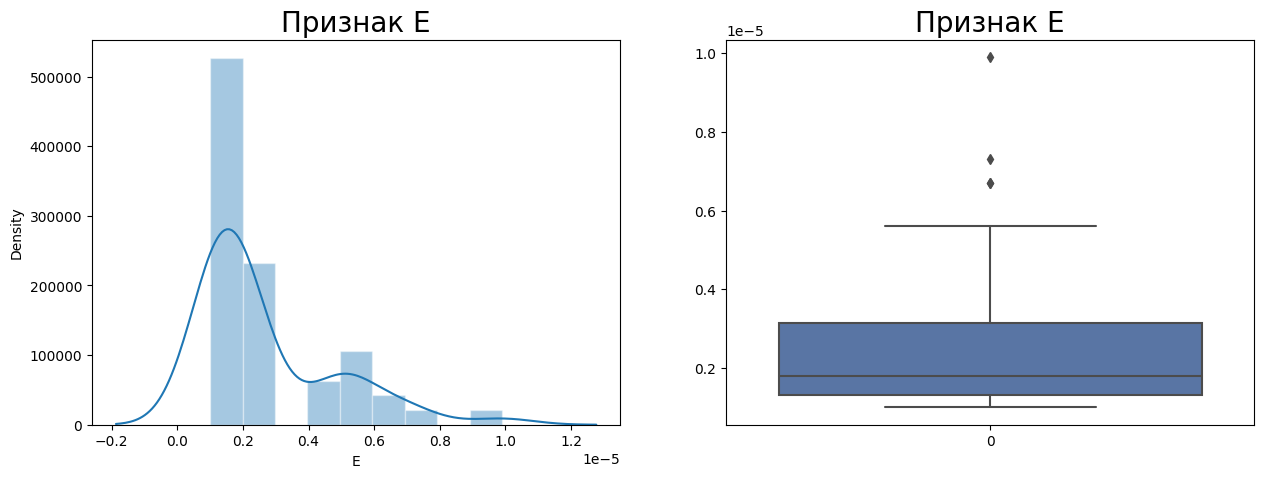

In [ ]:
df = dfsun_2019
title = 'E'

dist_and_box(dfsun_2019,'E')

In [ ]:
dfsun_2019.describe()

,Активная область,Балл,Класс вспышки,E
count,48.000000,48.000000,48.000000,48.000000
mean,2736.645833,2.668750,0.000001,0.000003
std,2.884217,2.073865,0.000000,0.000002
min,2732.000000,1.000000,0.000001,0.000001
25%,2734.000000,1.300000,0.000001,0.000001
50%,2736.000000,1.800000,0.000001,0.000002
75%,2740.000000,3.150000,0.000001,0.000003
max,2741.000000,9.900000,0.000001,0.000010


Распределение скошено вправо, стандартное квадратичное отклонение близко к среднему.

<ipython-input-40-6b4c1374acf0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  displot = sns.distplot(df[col],ax=axs[0]).set_title(f'Признак {title}',fontsize=20);


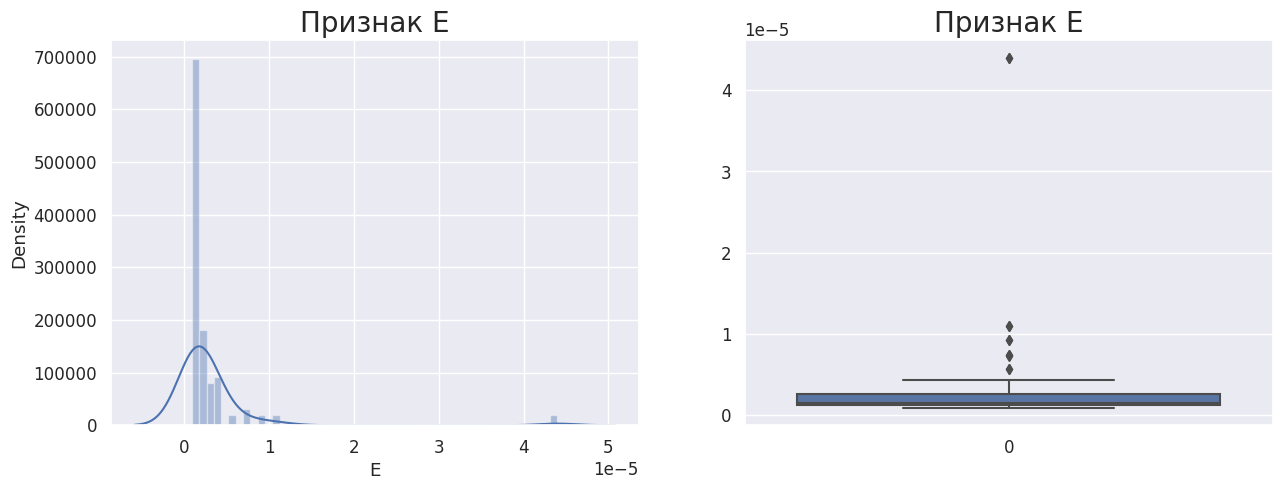

In [ ]:
df = dfsun_2020
title = 'E'

dist_and_box(dfsun_2020,'E')

In [ ]:
dfsun_2020.describe()

,Активная область,Балл,Класс вспышки,E
count,115.000000,115.000000,115.000000,1.150000e+02
mean,2370.643478,2.182609,0.000001,3.043478e-06
std,991.696289,1.667768,0.000002,5.828366e-06
min,0.000000,0.900000,0.000001,9.000000e-07
25%,2778.000000,1.200000,0.000001,1.200000e-06
50%,2781.000000,1.500000,0.000001,1.500000e-06
75%,2785.500000,2.550000,0.000001,2.600000e-06
max,2792.000000,9.300000,0.000010,4.400000e-05


Распределение скошено вправо, стандартное квадратичное отклонение не близко к среднему, что значит значения разбросаны около среднего.

<ipython-input-40-6b4c1374acf0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  displot = sns.distplot(df[col],ax=axs[0]).set_title(f'Признак {title}',fontsize=20);


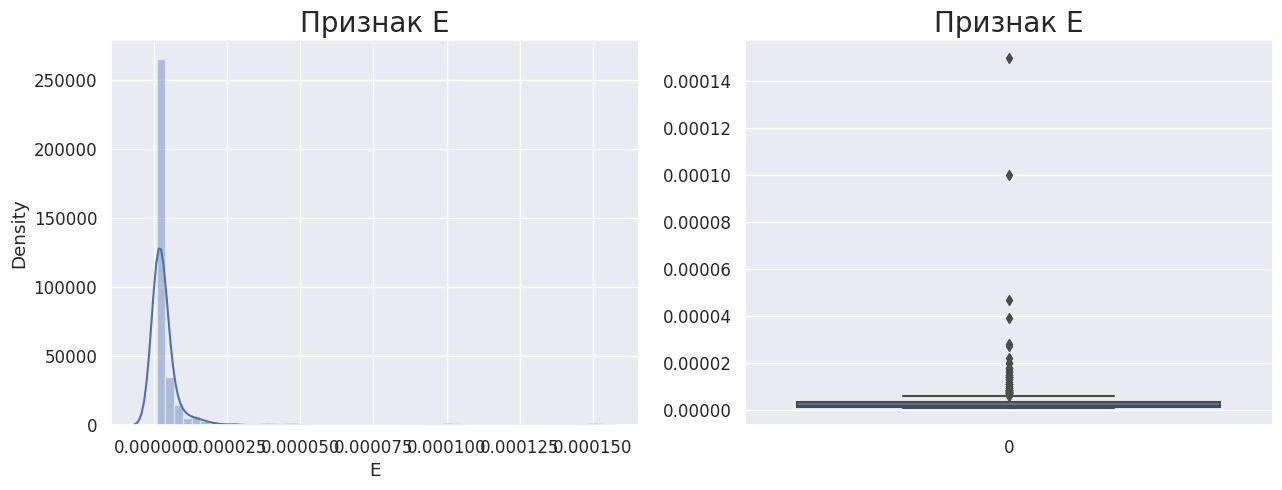

In [ ]:
df = dfsun_2021
title = 'E'

dist_and_box(dfsun_2021,'E')

In [ ]:
dfsun_2021.describe()

,Активная область,Балл,Класс вспышки,E
count,521.000000,521.000000,521.000000,5.210000e+02
mean,2591.976967,2.355278,0.000002,3.721689e-06
std,855.276754,1.719184,0.000006,8.827000e-06
min,0.000000,0.900000,0.000001,9.000000e-07
25%,2826.000000,1.300000,0.000001,1.300000e-06
50%,2877.000000,1.600000,0.000001,1.700000e-06
75%,2907.000000,2.800000,0.000001,3.200000e-06
max,2920.000000,9.800000,0.000100,1.500000e-04


Распределение скошено вправо, стандартное квадратичное отклонение далеко от среднего. О сильном разбросе значений говорит блочная диаграмма.

<ipython-input-40-6b4c1374acf0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  displot = sns.distplot(df[col],ax=axs[0]).set_title(f'Признак {title}',fontsize=20);


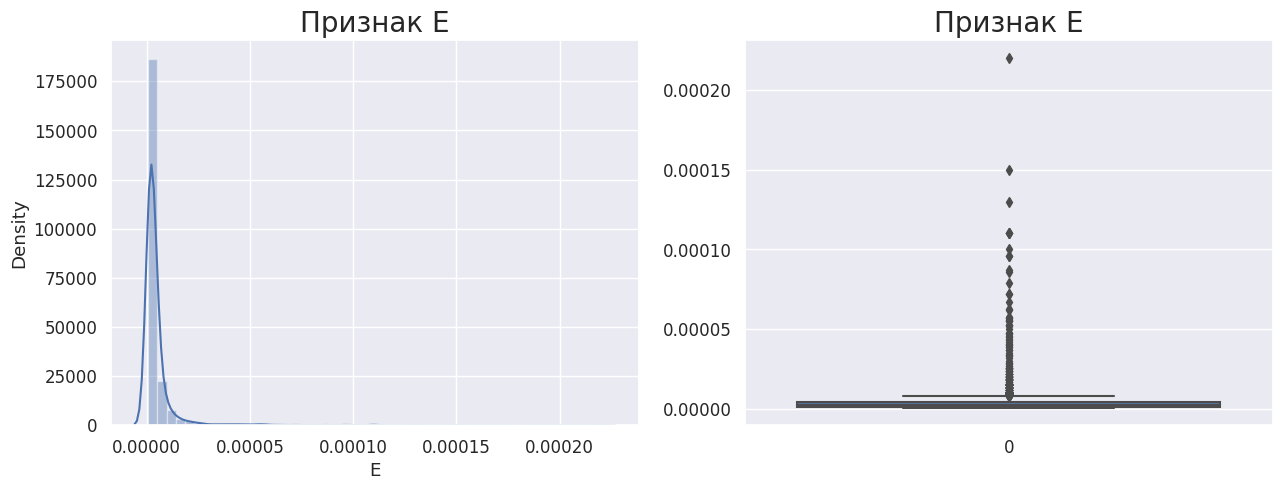

In [ ]:
df = dfsun_2022
title = 'E'

dist_and_box(dfsun_2022,'E')

In [ ]:
dfsun_2022.describe()

,Активная область,Балл,Класс вспышки,E
count,2373.000000,2373.000000,2373.000000,2.373000e+03
mean,2598.206911,2.777328,0.000002,4.856089e-06
std,1101.214569,1.827853,0.000006,1.062094e-05
min,0.000000,0.900000,0.000001,9.000000e-07
25%,2974.000000,1.400000,0.000001,1.500000e-06
50%,3055.000000,2.200000,0.000001,2.400000e-06
75%,3110.000000,3.600000,0.000001,4.300000e-06
max,3180.000000,9.900000,0.000100,2.200000e-04


Распределение скошено вправо, стандартное квадратичное отклонение далеко от среднего. О сильном разбросе значений также говорит блочная диаграмма.

<ipython-input-6-6b4c1374acf0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  displot = sns.distplot(df[col],ax=axs[0]).set_title(f'Признак {title}',fontsize=20);


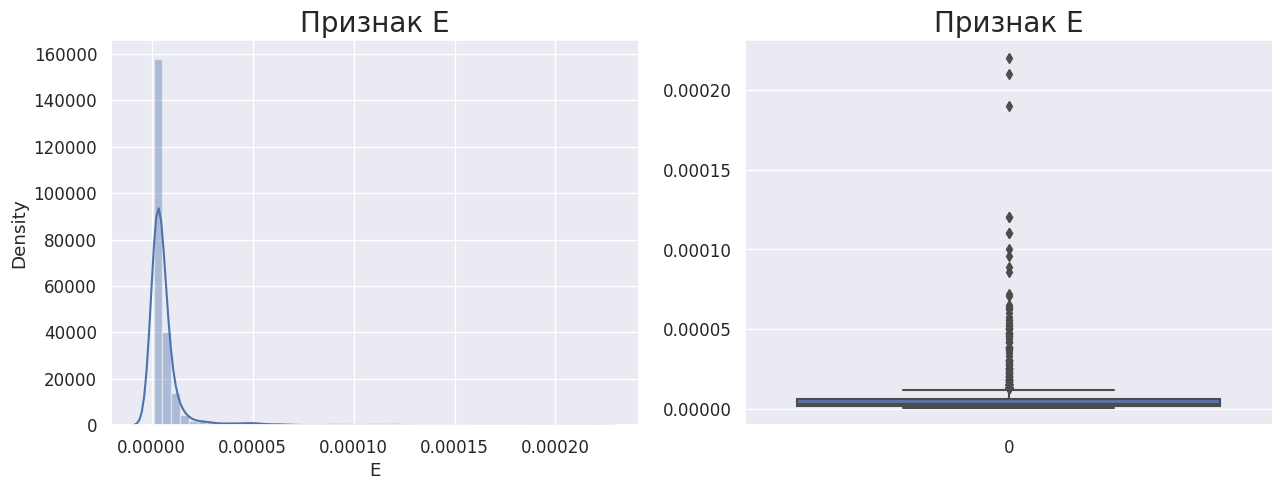

In [ ]:
df = dfsun_2023
title = 'E'

dist_and_box(dfsun_2023,'E')

In [ ]:
dfsun_2023.describe()

,Активная область,Балл,Класс вспышки,E
count,1604.000000,1604.000000,1604.000000,1.604000e+03
mean,2870.082918,3.449252,0.000003,6.726621e-06
std,1066.081913,2.064314,0.000008,1.381025e-05
min,0.000000,0.900000,0.000001,9.000000e-07
25%,3192.000000,1.800000,0.000001,2.100000e-06
50%,3256.000000,2.900000,0.000001,3.400000e-06
75%,3305.000000,4.625000,0.000001,6.200000e-06
max,3713.000000,9.900000,0.000100,2.200000e-04


Распределение скошено вправо, стандартное квадратичное отклонение далеко от среднего. О сильном разбросе значений говорит блочная диаграмма.

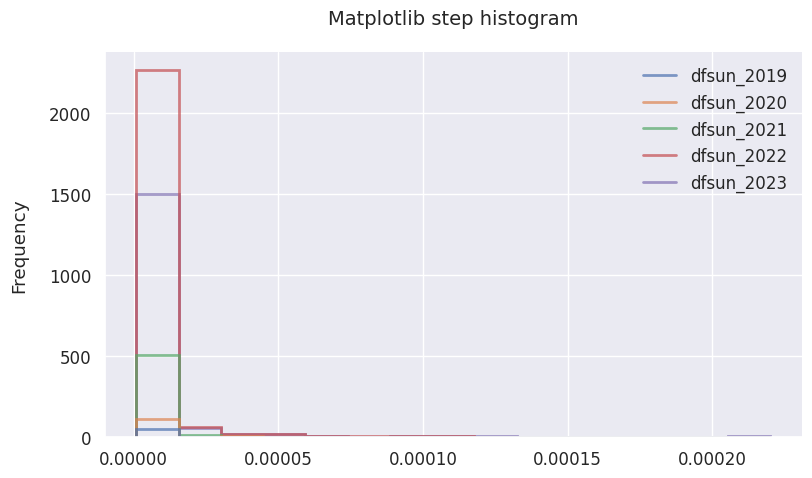

In [ ]:
from matplotlib.lines import Line2D


# Create figure with 'step' type of histogram to improve plot readability
fig, ax = plt.subplots(figsize=(9,5))
ax.hist([dfsun_2019['E'], dfsun_2020['E'], dfsun_2021['E'], dfsun_2022['E'], dfsun_2023['E']], bins=15, histtype='step', linewidth=2,
        alpha=0.7, label=['dfsun_2019','dfsun_2020', 'dfsun_2021', 'dfsun_2022', 'dfsun_2023'])

# Edit legend to get lines as legend keys instead of the default polygons
# and sort the legend entries in alphanumeric order
handles, labels = ax.get_legend_handles_labels()
leg_entries = {}
for h, label in zip(handles, labels):
    leg_entries[label] = Line2D([0], [0], color=h.get_facecolor()[:-1],
                                alpha=h.get_alpha(), lw=h.get_linewidth())
labels_sorted, lines = zip(*sorted(leg_entries.items()))
ax.legend(lines, labels_sorted, frameon=False)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add annotations
plt.ylabel('Frequency', labelpad=15)
plt.title('Matplotlib step histogram', fontsize=14, pad=20)
plt.show()

In [ ]:
dfsun_2019m = dfsun_2019.copy()
dfsun_2019m['Продолжительность вспышки'] = pd.to_datetime(dfsun_2019m['Продолжительность вспышки'])
dfsun_2019m['Продолжительность в минутах'] = (dfsun_2019m['Продолжительность вспышки'].dt.hour*60)+dfsun_2019m['Продолжительность вспышки'].dt.minute+(dfsun_2019m['Продолжительность вспышки'].dt.second/60)
dfsun_2019m['Продолжительность в минутах'] = dfsun_2019m['Продолжительность в минутах'].astype('int')

dfsun_2019m.sort_values(by='Продолжительность вспышки', ascending=False).head()

,Балл вспышки,Активная область,Начало,Окончание,Дата начала вспышки,Продолжительность вспышки,Балл,Класс вспышки,E,Продолжительность в минутах
43,Вспышка балла C1.2,2740,2019-05-08 12:51:00,2019-05-08 13:58:00,2019-05-08,2023-10-13 01:07:00,1.2,0.000001,0.000001,67
41,Вспышка балла C1.2,2740,2019-05-07 12:51:00,2019-05-07 13:58:00,2019-05-07,2023-10-13 01:07:00,1.2,0.000001,0.000001,67
31,Вспышка балла C1.0,2740,2019-05-04 01:49:00,2019-05-04 02:49:00,2019-05-04,2023-10-13 01:00:00,1.0,0.000001,0.000001,60
13,Вспышка балла C4.8,2736,2019-03-20 13:35:00,2019-03-20 14:34:00,2019-03-20,2023-10-13 00:59:00,4.8,0.000001,0.000005,59
11,Вспышка балла C1.3,2734,2019-03-08 06:07:00,2019-03-08 06:58:00,2019-03-08,2023-10-13 00:51:00,1.3,0.000001,0.000001,51


<ipython-input-8-6b4c1374acf0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  displot = sns.distplot(df[col],ax=axs[0]).set_title(f'Признак {title}',fontsize=20);


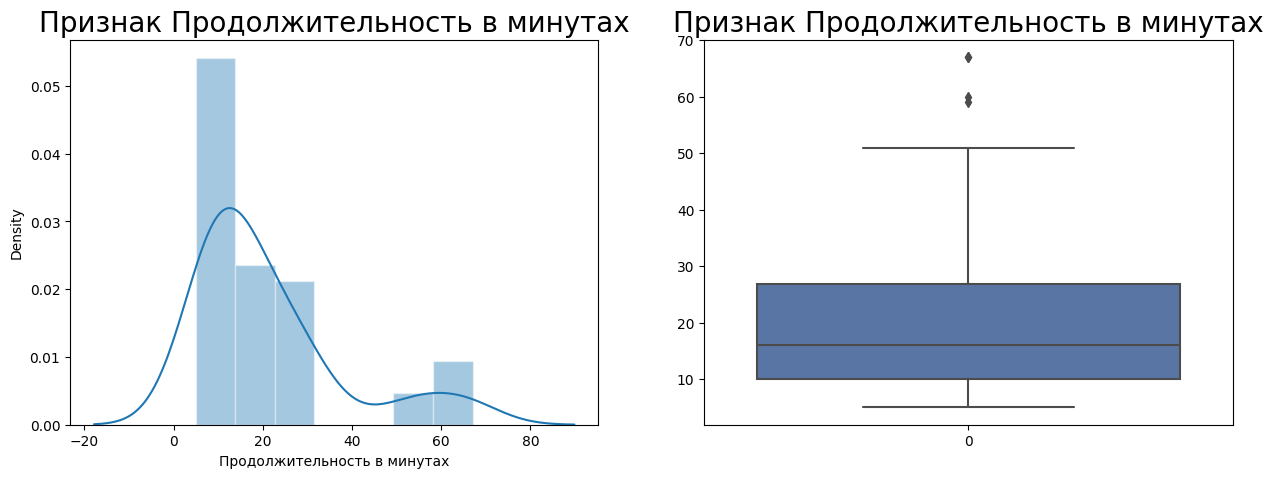

In [ ]:
df = dfsun_2019m
title = 'Продолжительность в минутах'

dist_and_box(dfsun_2019m,'Продолжительность в минутах')

In [ ]:
dfsun_2019m.describe()

,Активная область,Балл,Класс вспышки,E,Продолжительность в минутах
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,2736.645833,2.668750,0.000001,0.000003,20.937500
std,2.884217,2.073865,0.000000,0.000002,16.518727
min,2732.000000,1.000000,0.000001,0.000001,5.000000
25%,2734.000000,1.300000,0.000001,0.000001,10.000000
50%,2736.000000,1.800000,0.000001,0.000002,16.000000
75%,2740.000000,3.150000,0.000001,0.000003,26.750000
max,2741.000000,9.900000,0.000001,0.000010,67.000000


In [ ]:
dfsun_2020m = dfsun_2020.copy()
dfsun_2020m['Продолжительность вспышки'] = pd.to_datetime(dfsun_2020m['Продолжительность вспышки'])
dfsun_2020m['Продолжительность в минутах'] = (dfsun_2020m['Продолжительность вспышки'].dt.hour*60)+dfsun_2020m['Продолжительность вспышки'].dt.minute+(dfsun_2020m['Продолжительность вспышки'].dt.second/60)
dfsun_2020m['Продолжительность в минутах'] = dfsun_2020m['Продолжительность в минутах'].astype('int')

dfsun_2020m.sort_values(by='Продолжительность вспышки', ascending=False).head()

,Балл вспышки,Активная область,Начало,Окончание,Дата начала вспышки,Продолжительность вспышки,Балл,Класс вспышки,E,Продолжительность в минутах
0,Вспышка балла C2.6,0,2020-11-26 22:20:00,2020-11-27 02:53:00,2020-11-26,2023-10-13 04:33:00,2.6,0.000001,0.000003,273
20,Вспышка балла C7.4,2790,2020-12-08 18:46:00,2020-12-08 20:33:00,2020-12-08,2023-10-13 01:47:00,7.4,0.000001,0.000007,107
19,Вспышка балла C7.4,2790,2020-12-07 18:46:00,2020-12-07 20:33:00,2020-12-07,2023-10-13 01:47:00,7.4,0.000001,0.000007,107
75,Вспышка балла C1.0,2785,2020-11-24 07:10:00,2020-11-24 08:33:00,2020-11-24,2023-10-13 01:23:00,1.0,0.000001,0.000001,83
11,Вспышка балла C1.0,0,2020-11-21 21:10:00,2020-11-21 22:19:00,2020-11-21,2023-10-13 01:09:00,1.0,0.000001,0.000001,69


<ipython-input-8-6b4c1374acf0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  displot = sns.distplot(df[col],ax=axs[0]).set_title(f'Признак {title}',fontsize=20);


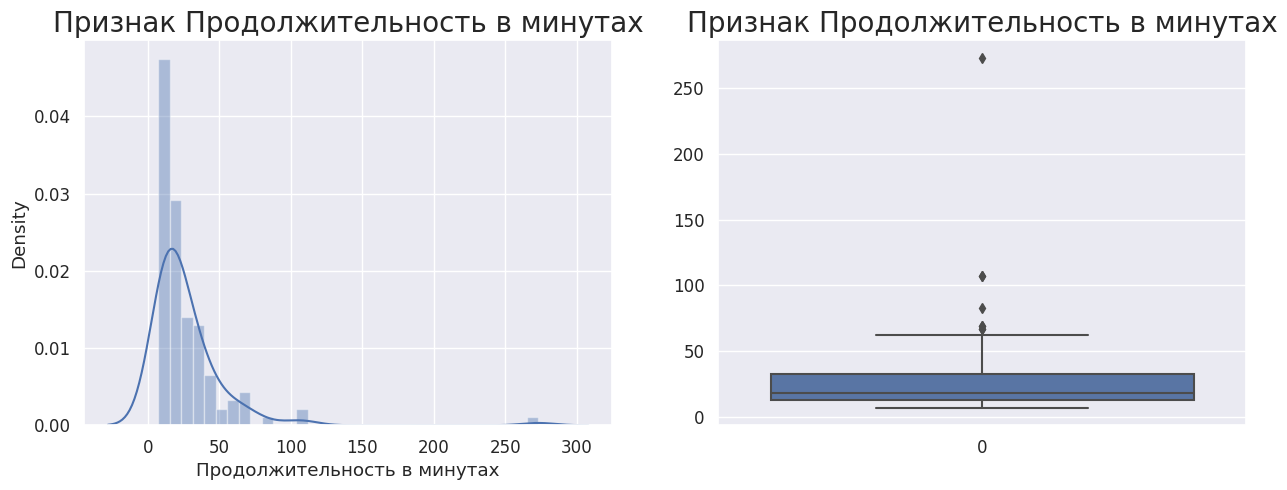

In [ ]:
df = dfsun_2020m
title = 'Продолжительность в минутах'

dist_and_box(dfsun_2020m,'Продолжительность в минутах')

In [ ]:
dfsun_2020m.describe()

,Активная область,Балл,Класс вспышки,E,Продолжительность в минутах
count,115.000000,115.000000,115.000000,1.150000e+02,115.000000
mean,2370.643478,2.182609,0.000001,3.043478e-06,27.521739
std,991.696289,1.667768,0.000002,5.828366e-06,30.179390
min,0.000000,0.900000,0.000001,9.000000e-07,7.000000
25%,2778.000000,1.200000,0.000001,1.200000e-06,13.000000
50%,2781.000000,1.500000,0.000001,1.500000e-06,18.000000
75%,2785.500000,2.550000,0.000001,2.600000e-06,33.000000
max,2792.000000,9.300000,0.000010,4.400000e-05,273.000000


In [ ]:
dfsun_2021m = dfsun_2021.copy()
dfsun_2021m['Продолжительность вспышки'] = pd.to_datetime(dfsun_2021m['Продолжительность вспышки'])
dfsun_2021m['Продолжительность в минутах'] = (dfsun_2021m['Продолжительность вспышки'].dt.hour*60)+dfsun_2021m['Продолжительность вспышки'].dt.minute+(dfsun_2021m['Продолжительность вспышки'].dt.second/60)
dfsun_2021m['Продолжительность в минутах'] = dfsun_2021m['Продолжительность в минутах'].astype('int')

dfsun_2021m.sort_values(by='Продолжительность вспышки', ascending=False).head()

,Балл вспышки,Активная область,Начало,Окончание,Дата начала вспышки,Продолжительность вспышки,Балл,Класс вспышки,E,Продолжительность в минутах
205,Вспышка балла C1.6,2871,2021-09-18 10:48:00,2021-09-19 02:48:00,2021-09-18,2023-10-13 16:00:00,1.6,0.000001,0.000002,960
51,Вспышка балла C1.3,2824,2021-05-22 10:10:00,2021-05-22 17:03:00,2021-05-22,2023-10-13 06:53:00,1.3,0.000001,0.000001,413
319,Вспышка балла M1.7,2891,2021-11-02 04:20:00,2021-11-02 06:50:00,2021-11-02,2023-10-13 02:30:00,1.7,0.000010,0.000017,150
86,Вспышка балла C9.4,2824,2021-05-29 01:19:00,2021-05-29 03:12:00,2021-05-29,2023-10-13 01:53:00,9.4,0.000001,0.000009,113
90,Вспышка балла C9.4,2824,2021-05-30 01:19:00,2021-05-30 03:12:00,2021-05-30,2023-10-13 01:53:00,9.4,0.000001,0.000009,113


<ipython-input-6-6b4c1374acf0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  displot = sns.distplot(df[col],ax=axs[0]).set_title(f'Признак {title}',fontsize=20);


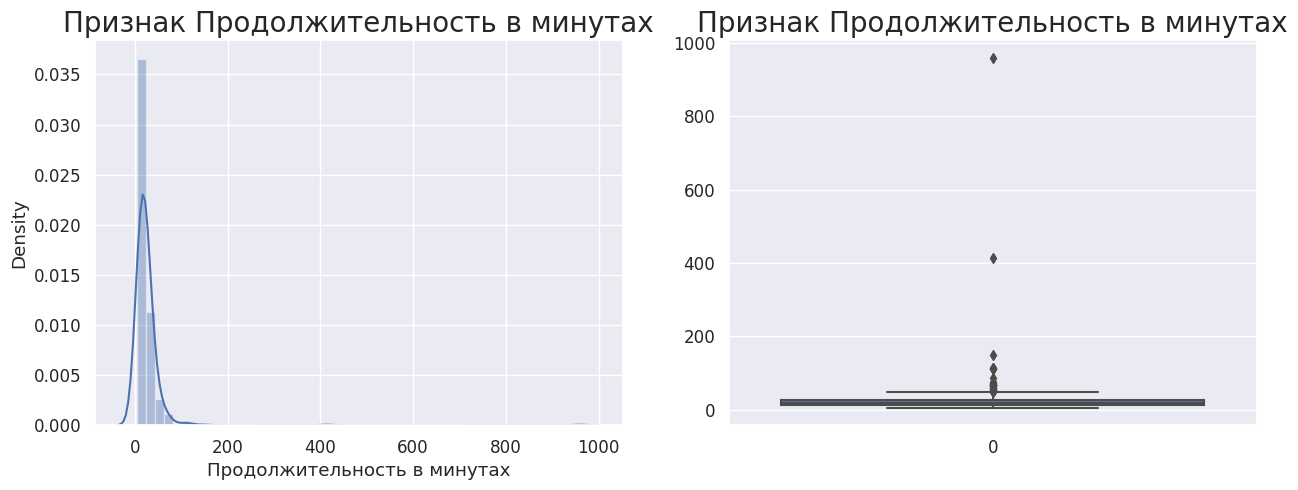

In [ ]:
df = dfsun_2021m
title = 'Продолжительность в минутах'

dist_and_box(dfsun_2021m,'Продолжительность в минутах')

In [ ]:
dfsun_2021m.describe()

,Активная область,Балл,Класс вспышки,E,Продолжительность в минутах
count,521.000000,521.000000,521.000000,5.210000e+02,521.000000
mean,2591.976967,2.355278,0.000002,3.721689e-06,24.978887
std,855.276754,1.719184,0.000006,8.827000e-06,47.299796
min,0.000000,0.900000,0.000001,9.000000e-07,5.000000
25%,2826.000000,1.300000,0.000001,1.300000e-06,13.000000
50%,2877.000000,1.600000,0.000001,1.700000e-06,18.000000
75%,2907.000000,2.800000,0.000001,3.200000e-06,27.000000
max,2920.000000,9.800000,0.000100,1.500000e-04,960.000000


In [ ]:
dfsun_2022m = dfsun_2022.copy()
dfsun_2022m['Продолжительность вспышки'] = pd.to_datetime(dfsun_2022m['Продолжительность вспышки'])
dfsun_2022m['Продолжительность в минутах'] = (dfsun_2022m['Продолжительность вспышки'].dt.hour*60)+dfsun_2022m['Продолжительность вспышки'].dt.minute+(dfsun_2022m['Продолжительность вспышки'].dt.second/60)
dfsun_2022m['Продолжительность в минутах'] = dfsun_2022m['Продолжительность в минутах'].astype('int')

dfsun_2022m.sort_values(by='Продолжительность вспышки', ascending=False).head()

,Балл вспышки,Активная область,Начало,Окончание,Дата начала вспышки,Продолжительность вспышки,Балл,Класс вспышки,E,Продолжительность в минутах
0,Вспышка балла C7.6,2996,2022-04-27 17:14:00,2022-04-28 00:27:00,2022-04-27,2023-10-13 07:13:00,7.6,0.000001,0.000008,433
589,Вспышка балла C1.3,0,2022-02-28 11:05:00,2022-02-28 18:17:00,2022-02-28,2023-10-13 07:12:00,1.3,0.000001,0.000001,432
590,Вспышка балла C1.3,0,2022-03-01 11:05:00,2022-03-01 18:17:00,2022-03-01,2023-10-13 07:12:00,1.3,0.000001,0.000001,432
1,Вспышка балла C4.8,2993,2022-04-25 23:38:00,2022-04-26 06:08:00,2022-04-25,2023-10-13 06:30:00,4.8,0.000001,0.000005,390
585,Вспышка балла C1.3,0,2022-04-14 13:23:00,2022-04-14 18:19:00,2022-04-14,2023-10-13 04:56:00,1.3,0.000001,0.000001,296


<ipython-input-6-6b4c1374acf0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  displot = sns.distplot(df[col],ax=axs[0]).set_title(f'Признак {title}',fontsize=20);


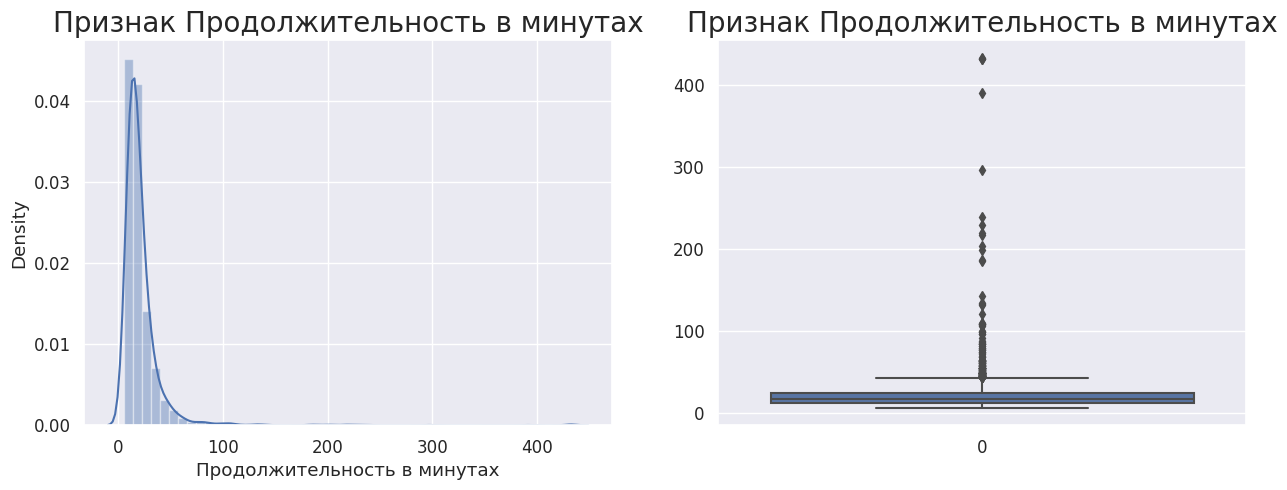

In [ ]:
df = dfsun_2022m
title = 'Продолжительность в минутах'

dist_and_box(dfsun_2022m,'Продолжительность в минутах')

In [ ]:
dfsun_2022m.describe()

,Активная область,Балл,Класс вспышки,E,Продолжительность в минутах
count,2373.000000,2373.000000,2373.000000,2.373000e+03,2373.000000
mean,2598.206911,2.777328,0.000002,4.856089e-06,21.850822
std,1101.214569,1.827853,0.000006,1.062094e-05,24.860498
min,0.000000,0.900000,0.000001,9.000000e-07,6.000000
25%,2974.000000,1.400000,0.000001,1.500000e-06,12.000000
50%,3055.000000,2.200000,0.000001,2.400000e-06,17.000000
75%,3110.000000,3.600000,0.000001,4.300000e-06,24.000000
max,3180.000000,9.900000,0.000100,2.200000e-04,433.000000


In [ ]:
dfsun_2023m = dfsun_2023.copy()
dfsun_2023m['Продолжительность вспышки'] = pd.to_datetime(dfsun_2023m['Продолжительность вспышки'])
dfsun_2023m['Продолжительность в минутах'] = (dfsun_2023m['Продолжительность вспышки'].dt.hour*60)+dfsun_2023m['Продолжительность вспышки'].dt.minute+(dfsun_2023m['Продолжительность вспышки'].dt.second/60)
dfsun_2023m['Продолжительность в минутах'] = dfsun_2023m['Продолжительность в минутах'].astype('int')

dfsun_2023m.sort_values(by='Продолжительность вспышки', ascending=False).head()

,Балл вспышки,Активная область,Начало,Окончание,Дата начала вспышки,Продолжительность вспышки,Балл,Класс вспышки,E,Продолжительность в минутах
642,Вспышка балла C3.7,3214,2023-02-14 08:08:00,2023-02-14 15:02:00,2023-02-14,2023-10-13 06:54:00,3.7,0.000001,0.000004,414
794,Вспышка балла C3.5,3276,2023-04-10 07:14:00,2023-04-10 12:37:00,2023-04-10,2023-10-13 05:23:00,3.5,0.000001,0.000003,323
601,Вспышка балла C4.0,0,2023-01-03 10:42:00,2023-01-03 15:33:00,2023-01-03,2023-10-13 04:51:00,4.0,0.000001,0.000004,291
0,Вспышка балла M1.9,0,2023-05-22 16:30:00,2023-05-22 20:55:00,2023-05-22,2023-10-13 04:25:00,1.9,0.000010,0.000019,265
1,Вспышка балла C9.1,3229,2023-02-16 23:39:00,2023-02-17 04:03:00,2023-02-16,2023-10-13 04:24:00,9.1,0.000001,0.000009,264


<ipython-input-6-6b4c1374acf0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  displot = sns.distplot(df[col],ax=axs[0]).set_title(f'Признак {title}',fontsize=20);


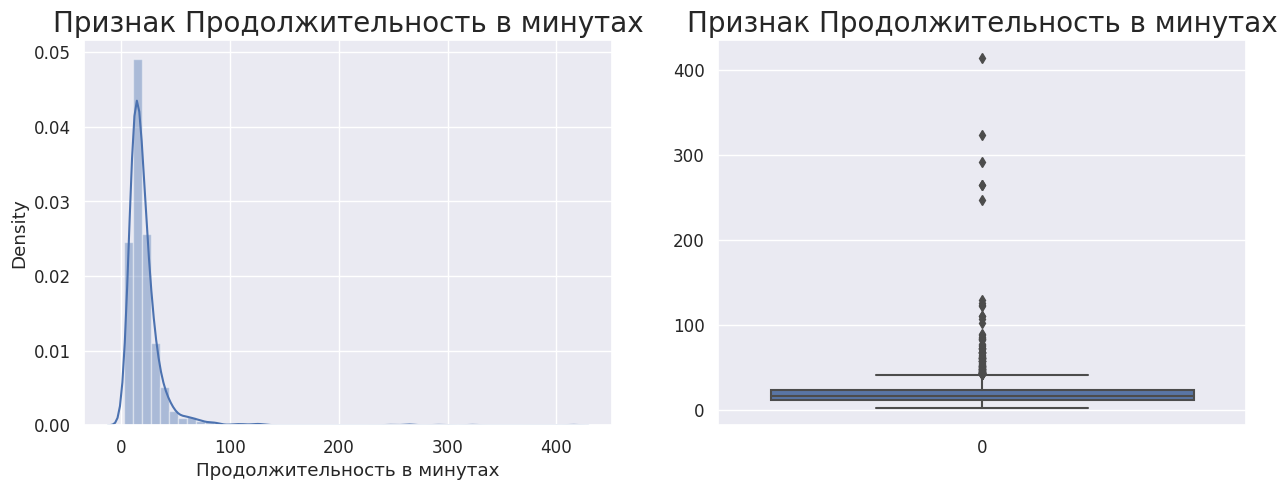

In [ ]:
df = dfsun_2023m
title = 'Продолжительность в минутах'

dist_and_box(dfsun_2023m,'Продолжительность в минутах')

In [ ]:
dfsun_2023m.describe()

,Активная область,Балл,Класс вспышки,E,Продолжительность в минутах
count,1604.000000,1604.000000,1604.000000,1.604000e+03,1604.000000
mean,2870.082918,3.449252,0.000003,6.726621e-06,21.445761
std,1066.081913,2.064314,0.000008,1.381025e-05,22.260331
min,0.000000,0.900000,0.000001,9.000000e-07,3.000000
25%,3192.000000,1.800000,0.000001,2.100000e-06,12.000000
50%,3256.000000,2.900000,0.000001,3.400000e-06,17.000000
75%,3305.000000,4.625000,0.000001,6.200000e-06,24.000000
max,3713.000000,9.900000,0.000100,2.200000e-04,414.000000


По признаку "Продолжительность в минутах" - во всех годах распределение скошено вправо. Стандартное квадратичное отклонение и среднее во всех годах, кроме 2021, близки.

In [ ]:
dfsun_2019m['Класс'] = dfsun_2019m['Балл вспышки'].apply(lambda x : x[:15])
dfsun_2020m['Класс'] = dfsun_2020m['Балл вспышки'].apply(lambda x : x[:15])
dfsun_2021m['Класс'] = dfsun_2021m['Балл вспышки'].apply(lambda x : x[:15])
dfsun_2022m['Класс'] = dfsun_2022m['Балл вспышки'].apply(lambda x : x[:15])
dfsun_2023m['Класс'] = dfsun_2023m['Балл вспышки'].apply(lambda x : x[:15])

print(dfsun_2019m.head)
print(dfsun_2020m.head)
print(dfsun_2021m.head)
print(dfsun_2022m.head)
print(dfsun_2023m.head)

<bound method NDFrame.head of           Балл вспышки  Активная область               Начало  \
0   Вспышка балла C1.6              2732  2019-01-06 13:31:00   
1   Вспышка балла C1.6              2732  2019-01-07 13:31:00   
2   Вспышка балла C5.0              2733  2019-01-26 16:12:00   
3   Вспышка балла C5.0              2733  2019-01-27 16:12:00   
4   Вспышка балла C1.9              2733  2019-01-29 13:21:00   
5   Вспышка балла C1.3              2733  2019-01-30 14:16:00   
6   Вспышка балла C5.2              2733  2019-01-30 08:56:00   
7   Вспышка балла C2.0              2733  2019-01-30 00:18:00   
8   Вспышка балла C1.3              2733  2019-01-31 14:16:00   
9   Вспышка балла C5.2              2733  2019-01-31 08:56:00   
10  Вспышка балла C2.0              2733  2019-01-31 00:18:00   
11  Вспышка балла C1.3              2734  2019-03-08 06:07:00   
12  Вспышка балла C1.3              2734  2019-03-09 06:07:00   
13  Вспышка балла C4.8              2736  2019-03-20 13:35:0

In [ ]:
dfsun_2019mpt = pd.pivot_table(dfsun_2019m, values=['Балл вспышки', 'Продолжительность в минутах', 'E', 'Активная область'],
                               index=['Класс'],
                               aggfunc={'Балл вспышки':'count', 'Продолжительность в минутах':'sum', 'E':'sum',
                                        'Активная область':lambda x: len(x.unique())})
dfsun_2019mpt = dfsun_2019mpt.rename(columns={'Балл вспышки':'Кол-во вспышек'})
dfsun_2019mpt = dfsun_2019mpt.reset_index()
dfsun_2019mpt['год'] = 2019
dfsun_2019mpt.head()

,Класс,E,Активная область,Кол-во вспышек,Продолжительность в минутах,год
0,Вспышка балла C,0.000128,6,48,1005,2019


In [ ]:
dfsun_2020mpt = pd.pivot_table(dfsun_2020m, values=['Балл вспышки', 'Продолжительность в минутах', 'E', 'Активная область'],
                               index=['Класс'],
                               aggfunc={'Балл вспышки':'count', 'Продолжительность в минутах':'sum', 'E':'sum',
                                        'Активная область':lambda x: len(x.unique())})
dfsun_2020mpt = dfsun_2020mpt.rename(columns={'Балл вспышки':'Кол-во вспышек'})
dfsun_2020mpt = dfsun_2020mpt.reset_index()
dfsun_2020mpt['год'] = 2020
dfsun_2020mpt.head()

,Класс,E,Активная область,Кол-во вспышек,Продолжительность в минутах,год
0,Вспышка балла C,0.00024,14,111,3001,2020
1,Вспышка балла M,0.00011,1,4,164,2020


In [ ]:
dfsun_2021mpt = pd.pivot_table(dfsun_2021m, values=['Балл вспышки', 'Продолжительность в минутах', 'E', 'Активная область'],
                               index=['Класс'],
                               aggfunc={'Балл вспышки':'count', 'Продолжительность в минутах':'sum', 'E':'sum',
                                        'Активная область':lambda x: len(x.unique())})
dfsun_2021mpt = dfsun_2021mpt.rename(columns={'Балл вспышки':'Кол-во вспышек'})
dfsun_2021mpt = dfsun_2021mpt.reset_index()
dfsun_2021mpt['год'] = 2021
dfsun_2021mpt.head()

,Класс,E,Активная область,Кол-во вспышек,Продолжительность в минутах,год
0,Вспышка балла C,0.001173,51,489,11945,2021
1,Вспышка балла M,0.000516,15,30,1022,2021
2,Вспышка балла X,0.000250,2,2,47,2021


In [ ]:
dfsun_2022mpt = pd.pivot_table(dfsun_2022m, values=['Балл вспышки', 'Продолжительность в минутах', 'E', 'Активная область'],
                               index=['Класс'],
                               aggfunc={'Балл вспышки':'count', 'Продолжительность в минутах':'sum', 'E':'sum',
                                        'Активная область':lambda x: len(x.unique())})
dfsun_2022mpt = dfsun_2022mpt.rename(columns={'Балл вспышки':'Кол-во вспышек'})
dfsun_2022mpt = dfsun_2022mpt.reset_index()
dfsun_2022mpt['год'] = 2022
dfsun_2022mpt.head()

,Класс,E,Активная область,Кол-во вспышек,Продолжительность в минутах,год
0,Вспышка балла C,0.006135,166,2175,46057,2022
1,Вспышка балла M,0.004458,51,191,5626,2022
2,Вспышка балла X,0.000930,6,7,169,2022


In [ ]:
dfsun_2023mpt = pd.pivot_table(dfsun_2023m, values=['Балл вспышки', 'Продолжительность в минутах', 'E', 'Активная область'],
                               index=['Класс'],
                               aggfunc={'Балл вспышки':'count', 'Продолжительность в минутах':'sum', 'E':'sum',
                                        'Активная область':lambda x: len(x.unique())})
dfsun_2023mpt = dfsun_2023mpt.rename(columns={'Балл вспышки':'Кол-во вспышек'})
dfsun_2023mpt = dfsun_2023mpt.reset_index()
dfsun_2023mpt['год'] = 2023
dfsun_2023mpt.head()

,Класс,E,Активная область,Кол-во вспышек,Продолжительность в минутах,год
0,Вспышка балла C,0.005066,117,1399,28711,2023
1,Вспышка балла M,0.004543,51,197,5462,2023
2,Вспышка балла X,0.001180,8,8,226,2023


In [ ]:
dfsun_2019mo = pd.pivot_table(dfsun_2019mpt, values=['Кол-во вспышек', 'Продолжительность в минутах', 'E', 'Активная область'], index=['год'],
                              aggfunc={'Кол-во вспышек':'sum', 'Продолжительность в минутах':'sum', 'E':'sum', 'Активная область':sum})
dfsun_2019mo = dfsun_2019mo.reset_index()

dfsun_2020mo = pd.pivot_table(dfsun_2020mpt, values=['Кол-во вспышек', 'Продолжительность в минутах', 'E', 'Активная область'], index=['год'],
                              aggfunc={'Кол-во вспышек':'sum', 'Продолжительность в минутах':'sum', 'E':'sum', 'Активная область':sum})
dfsun_2020mo = dfsun_2020mo.reset_index()

dfsun_2021mo = pd.pivot_table(dfsun_2021mpt, values=['Кол-во вспышек', 'Продолжительность в минутах', 'E', 'Активная область'], index=['год'],
                              aggfunc={'Кол-во вспышек':'sum', 'Продолжительность в минутах':'sum', 'E':'sum', 'Активная область':sum})
dfsun_2021mo = dfsun_2021mo.reset_index()

dfsun_2022mo = pd.pivot_table(dfsun_2022mpt, values=['Кол-во вспышек', 'Продолжительность в минутах', 'E', 'Активная область'], index=['год'],
                              aggfunc={'Кол-во вспышек':'sum', 'Продолжительность в минутах':'sum', 'E':'sum', 'Активная область':sum})
dfsun_2022mo = dfsun_2022mo.reset_index()

dfsun_2023mo = pd.pivot_table(dfsun_2023mpt, values=['Кол-во вспышек', 'Продолжительность в минутах', 'E', 'Активная область'], index=['год'],
                              aggfunc={'Кол-во вспышек':'sum', 'Продолжительность в минутах':'sum', 'E':'sum', 'Активная область':sum})
dfsun_2023mo = dfsun_2023mo.reset_index()

dfsun = pd.concat([dfsun_2019mo, dfsun_2020mo, dfsun_2021mo, dfsun_2022mo, dfsun_2023mo], axis=0)
dfsun

,год,E,Активная область,Кол-во вспышек,Продолжительность в минутах
0,2019,0.000128,6,48,1005
0,2020,0.000350,15,115,3165
0,2021,0.001939,68,521,13014
0,2022,0.011523,223,2373,51852
0,2023,0.010790,176,1604,34399


<Axes: xlabel='год'>

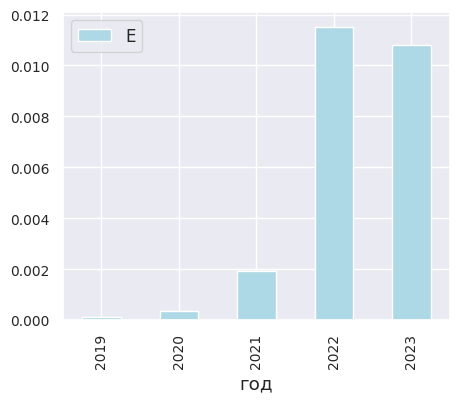

In [ ]:
dfsun.plot(x = 'год',
            y=['E'],
            kind = 'bar',
            color = ['lightblue'],
            figsize=(5, 4),
            fontsize=10)

<Axes: xlabel='год'>

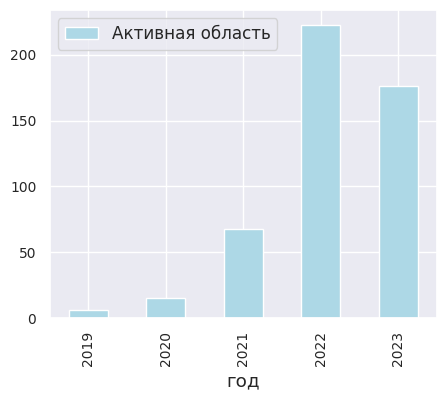

In [ ]:
dfsun.plot(x = 'год',
            y=['Активная область'],
            kind = 'bar',
            color = ['lightblue'],
            figsize=(5, 4),
            fontsize=10)

<Axes: xlabel='год'>

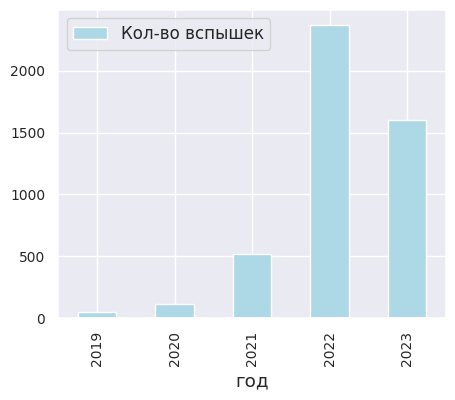

In [ ]:
dfsun.plot(x = 'год',
            y=['Кол-во вспышек'],
            kind = 'bar',
            color = ['lightblue'],
            figsize=(5, 4),
            fontsize=10)

<Axes: xlabel='год'>

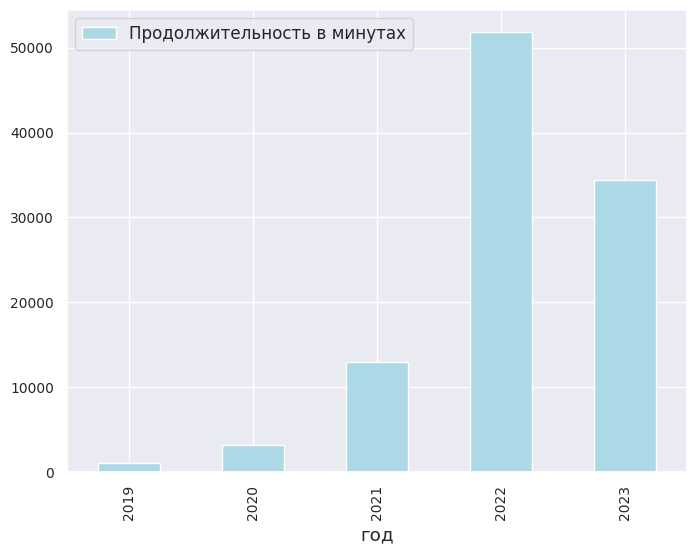

In [ ]:
dfsun.plot(x = 'год',
            y=['Продолжительность в минутах'],
            kind = 'bar',
            color = ['lightblue'],
            figsize=(8, 6),
            fontsize=10)

In [ ]:
dfsun_2019m.head(2)

,Балл вспышки,Активная область,Начало,Окончание,Дата начала вспышки,Продолжительность вспышки,Балл,Класс вспышки,E,Продолжительность в минутах,Класс
0,Вспышка балла C1.6,2732,2019-01-06 13:31:00,2019-01-06 14:00:00,2019-01-06,2023-10-13 00:29:00,1.6,0.000001,0.000002,29,Вспышка балла C
1,Вспышка балла C1.6,2732,2019-01-07 13:31:00,2019-01-07 14:00:00,2019-01-07,2023-10-13 00:29:00,1.6,0.000001,0.000002,29,Вспышка балла C


Доработка датасетов, удаление лишних столбцов

In [ ]:
dfsun_2019m = dfsun_2019m.drop(columns=['Балл вспышки', 'Продолжительность вспышки', 'Класс вспышки'])
dfsun_2019m = dfsun_2019m[['Класс', 'Балл', 'Активная область',	'Начало',	'Окончание',	'Дата начала вспышки',
                           'E',	'Продолжительность в минутах']]

In [ ]:
dfsun_2020m = dfsun_2020m.drop(columns=['Балл вспышки', 'Продолжительность вспышки', 'Класс вспышки'])
dfsun_2020m = dfsun_2020m[['Класс', 'Балл', 'Активная область',	'Начало',	'Окончание',	'Дата начала вспышки',
                           'E',	'Продолжительность в минутах']]

dfsun_2021m = dfsun_2021m.drop(columns=['Балл вспышки', 'Продолжительность вспышки', 'Класс вспышки'])
dfsun_2021m = dfsun_2021m[['Класс', 'Балл', 'Активная область',	'Начало',	'Окончание',	'Дата начала вспышки',
                           'E',	'Продолжительность в минутах']]

dfsun_2022m = dfsun_2022m.drop(columns=['Балл вспышки', 'Продолжительность вспышки', 'Класс вспышки'])
dfsun_2022m = dfsun_2022m[['Класс', 'Балл', 'Активная область',	'Начало',	'Окончание',	'Дата начала вспышки',
                           'E',	'Продолжительность в минутах']]

dfsun_2023m = dfsun_2023m.drop(columns=['Балл вспышки', 'Продолжительность вспышки', 'Класс вспышки'])
dfsun_2023m = dfsun_2023m[['Класс', 'Балл', 'Активная область',	'Начало',	'Окончание',	'Дата начала вспышки',
                           'E',	'Продолжительность в минутах']]

Сохранение датасетов по солнечным вспышкам доработанных

In [ ]:
dfsun_2019m.to_excel('dfsun_2019m.xlsx', index=False)
!cp dfsun_2019m.xlsx "drive/My Drive/Colab Notebooks/Солнце/"

dfsun_2020m.to_excel('dfsun_2020m.xlsx', index=False)
!cp dfsun_2020m.xlsx "drive/My Drive/Colab Notebooks/Солнце/"

dfsun_2021m.to_excel('dfsun_2021m.xlsx', index=False)
!cp dfsun_2021m.xlsx "drive/My Drive/Colab Notebooks/Солнце/"

dfsun_2022m.to_excel('dfsun_2022m.xlsx', index=False)
!cp dfsun_2022m.xlsx "drive/My Drive/Colab Notebooks/Солнце/"

dfsun_2023m.to_excel('dfsun_2023m.xlsx', index=False)
!cp dfsun_2023m.xlsx "drive/My Drive/Colab Notebooks/Солнце/"

##### Выводы по вспышек

Во всех годах признак "Е" имеет правостороннеее распределение (то есть, распределение гистограммы скошено вправо - среднне больше медианы). Значения в данном признаке совсем маленькие, большая часть значений скопились около 0. Это видно и по блочной диаграмме. Есть много выбросов свыше 3 квартиля - 75%-го процентиля, то есть одиночные большие значения.

В сравненнии признака выброса Энергии по годам, виден явный рост с 2019 года по настоящее время. Даже половина 2023 года уже почти догнало 2022 год.

Также и по признаку "Продолжительность в минутах" распределение скошено вправо, присутствуют отдельные пики в правой части, о чём и свидетельствуют выбросы в 3 квартиле блочной диаграммы.

Общая картина по всем признакам: явный рост значений с годами. Как и продолжительности в минутах, так и по кол-ву активных групп, значений энергии, и кол-ву вспышек.

#### Анализ активных пятен

In [ ]:
dfact_2019.head()

,Номер группы,Координаты на Солнце,Число пятен в группе,Классификация группы по модифицированной системе Цюриха,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы,Дата
0,2732,N10 W20,3,Bxo,10,4,215,Beta,2019-01-02
1,2732,N09 W33,6,Dro,30,6,214,Beta,2019-01-03
2,2732,N09 W47,6,Cao,90,8,215,Beta,2019-01-04
3,2732,N10 W59,3,Cao,50,8,215,Beta,2019-01-05
4,2732,N10 W74,3,Bxo,10,7,217,Beta,2019-01-06


<ipython-input-6-6b4c1374acf0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  displot = sns.distplot(df[col],ax=axs[0]).set_title(f'Признак {title}',fontsize=20);


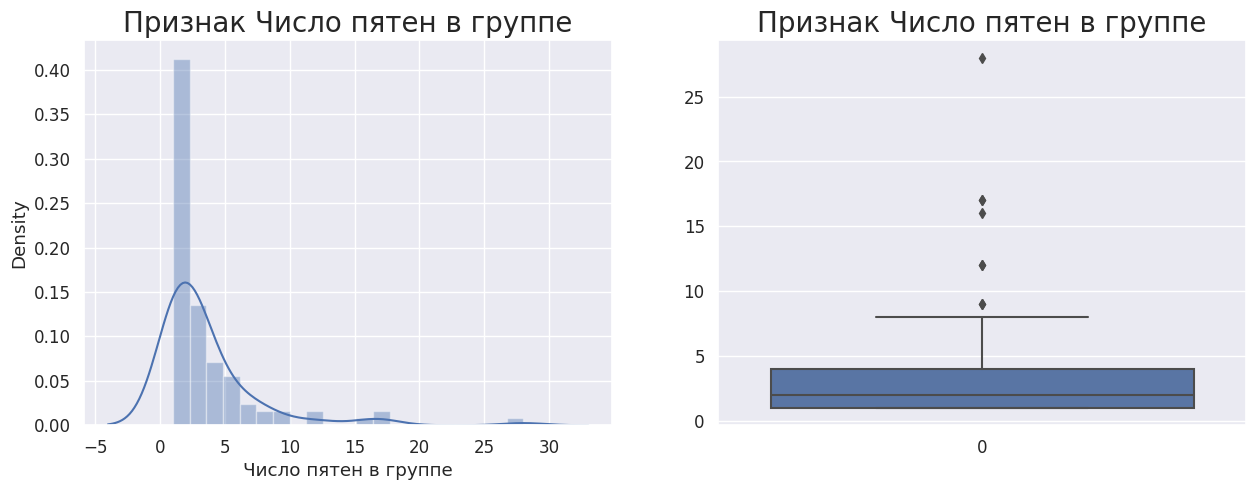

In [ ]:
df = dfact_2019
title = 'Число пятен в группе'

dist_and_box(dfact_2019,'Число пятен в группе')

In [ ]:
dfact_2019.describe()

,Число пятен в группе,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги)
count,98.000000,98.000000,98.000000,98.000000
mean,3.622449,101.734694,4.102041,223.122449
std,4.177789,112.213213,4.021821,84.816511
min,1.000000,0.000000,0.000000,59.000000
25%,1.000000,10.000000,2.000000,157.500000
50%,2.000000,45.000000,3.000000,260.000000
75%,4.000000,160.000000,5.000000,294.000000
max,28.000000,420.000000,33.000000,309.000000


<ipython-input-6-6b4c1374acf0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  displot = sns.distplot(df[col],ax=axs[0]).set_title(f'Признак {title}',fontsize=20);


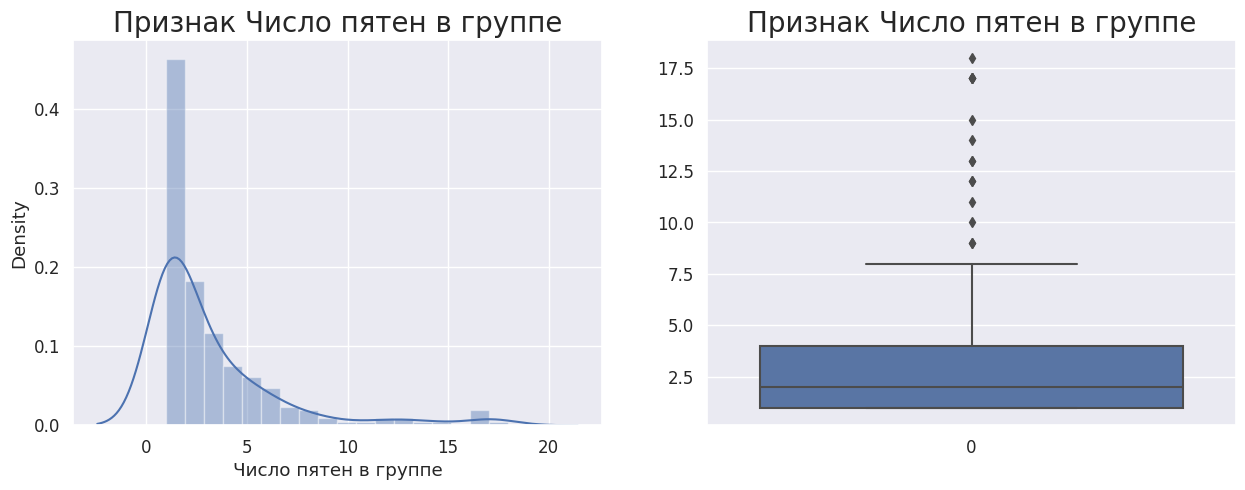

In [ ]:
df = dfact_2020
title = 'Число пятен в группе'

dist_and_box(dfact_2020,'Число пятен в группе')

In [ ]:
dfact_2020.describe()

,Число пятен в группе,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги)
count,226.000000,226.000000,226.000000,226.000000
mean,3.150442,98.584071,4.230088,192.973451
std,3.392072,147.885795,4.078145,112.382083
min,1.000000,0.000000,0.000000,2.000000
25%,1.000000,10.000000,1.250000,87.000000
50%,2.000000,60.000000,3.000000,199.000000
75%,4.000000,110.000000,5.000000,298.500000
max,18.000000,1000.000000,20.000000,359.000000


<ipython-input-6-6b4c1374acf0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  displot = sns.distplot(df[col],ax=axs[0]).set_title(f'Признак {title}',fontsize=20);


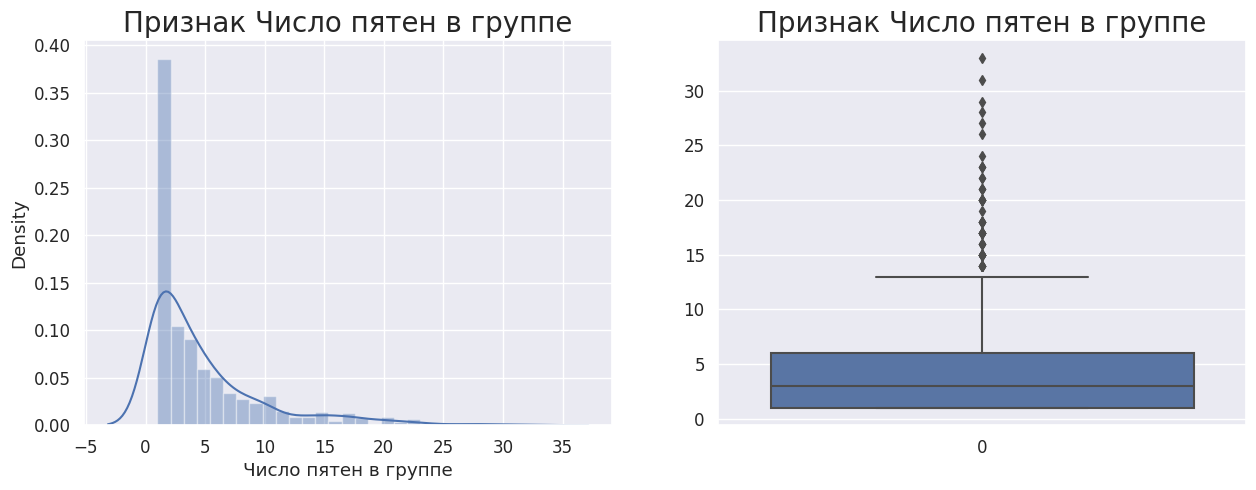

In [ ]:
df = dfact_2021
title = 'Число пятен в группе'

dist_and_box(dfact_2021,'Число пятен в группе')

In [ ]:
dfact_2021.describe()

,Число пятен в группе,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги)
count,730.00000,730.000000,730.000000,730.000000
mean,4.90000,89.184932,4.300000,203.243836
std,5.18197,107.147131,3.168626,104.145096
min,1.00000,0.000000,0.000000,1.000000
25%,1.00000,10.000000,2.000000,141.250000
50%,3.00000,40.000000,4.000000,212.000000
75%,6.00000,120.000000,6.000000,286.750000
max,33.00000,770.000000,14.000000,359.000000


<ipython-input-6-6b4c1374acf0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  displot = sns.distplot(df[col],ax=axs[0]).set_title(f'Признак {title}',fontsize=20);


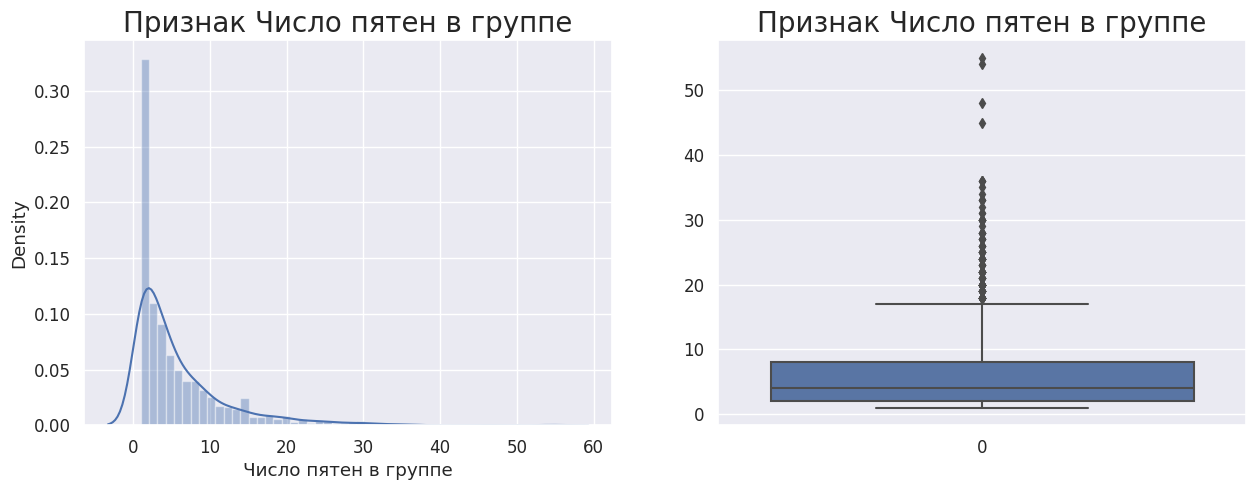

In [ ]:
df = dfact_2022
title = 'Число пятен в группе'

dist_and_box(dfact_2022,'Число пятен в группе')

In [ ]:
dfact_2022.describe()

,Число пятен в группе,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги)
count,1785.000000,1785.000000,1785.000000,1785.000000
mean,5.949020,125.746218,5.627451,164.261064
std,6.399637,161.398228,4.194624,109.096818
min,1.000000,0.000000,0.000000,1.000000
25%,2.000000,20.000000,2.000000,74.000000
50%,4.000000,70.000000,5.000000,140.000000
75%,8.000000,150.000000,8.000000,260.000000
max,55.000000,1190.000000,26.000000,360.000000


<ipython-input-6-6b4c1374acf0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  displot = sns.distplot(df[col],ax=axs[0]).set_title(f'Признак {title}',fontsize=20);


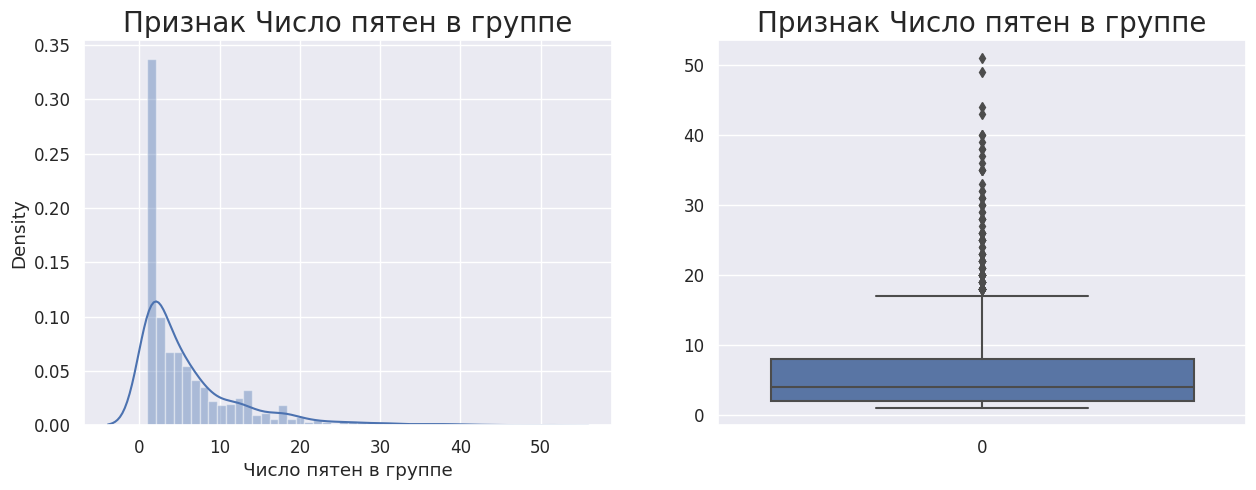

In [ ]:
df = dfact_2023
title = 'Число пятен в группе'

dist_and_box(dfact_2023,'Число пятен в группе')

In [ ]:
dfact_2023.describe()

,Число пятен в группе,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги)
count,1344.000000,1344.000000,1344.000000,1344.000000
mean,6.308036,121.164435,5.574405,176.718006
std,6.915966,150.329503,4.152936,100.969943
min,1.000000,0.000000,0.000000,1.000000
25%,2.000000,20.000000,2.000000,104.000000
50%,4.000000,60.000000,5.000000,170.000000
75%,8.000000,160.000000,8.000000,263.000000
max,51.000000,950.000000,19.000000,359.000000


Распределение по признаку "Число пятен в группе" скошено вправо, СКО от среднего далеки. Разброс значений очевиден по блочной диаграмме - присутствуют выбросы свыше 3 квартиля.

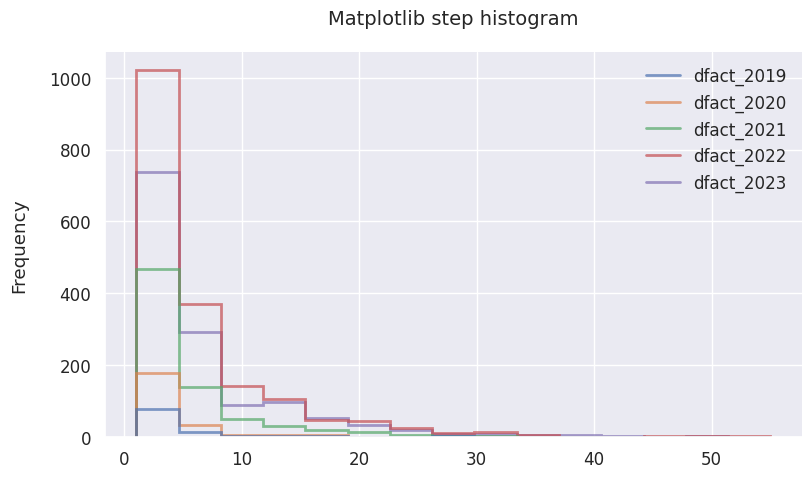

In [ ]:
from matplotlib.lines import Line2D


# Create figure with 'step' type of histogram to improve plot readability
fig, ax = plt.subplots(figsize=(9,5))
ax.hist([dfact_2019['Число пятен в группе'], dfact_2020['Число пятен в группе'],
         dfact_2021['Число пятен в группе'], dfact_2022['Число пятен в группе'],
         dfact_2023['Число пятен в группе']], bins=15, histtype='step', linewidth=2,
        alpha=0.7, label=['dfact_2019','dfact_2020', 'dfact_2021', 'dfact_2022', 'dfact_2023'])

# Edit legend to get lines as legend keys instead of the default polygons
# and sort the legend entries in alphanumeric order
handles, labels = ax.get_legend_handles_labels()
leg_entries = {}
for h, label in zip(handles, labels):
    leg_entries[label] = Line2D([0], [0], color=h.get_facecolor()[:-1],
                                alpha=h.get_alpha(), lw=h.get_linewidth())
labels_sorted, lines = zip(*sorted(leg_entries.items()))
ax.legend(lines, labels_sorted, frameon=False)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add annotations
plt.ylabel('Frequency', labelpad=15)
plt.title('Matplotlib step histogram', fontsize=14, pad=20)
plt.show()

Сравнение значений признака "Число пятен в группе" по годам, говорит о явном росте с 2019 года по настоящее время.

In [ ]:
dfact_2019.head()

,Номер группы,Координаты на Солнце,Число пятен в группе,Классификация группы по модифицированной системе Цюриха,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы,Дата
0,№ 2732,N10 W20,3,Bxo,10,4,215,Beta,2019-01-02
1,№ 2732,N09 W33,6,Dro,30,6,214,Beta,2019-01-03
2,№ 2732,N09 W47,6,Cao,90,8,215,Beta,2019-01-04
3,№ 2732,N10 W59,3,Cao,50,8,215,Beta,2019-01-05
4,№ 2732,N10 W74,3,Bxo,10,7,217,Beta,2019-01-06


Построим матрицу корреляции Пирсона и попробуем найти взаимосвязи.

In [ ]:
dfact_2019.corr().style.background_gradient(cmap='RdYlGn')

<ipython-input-35-1bec12db0401>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfact_2019.corr().style.background_gradient(cmap='RdYlGn')


,Число пятен в группе,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги)
Число пятен в группе,1.000000,0.124779,0.491940,0.108885
Площадь (в миллионных долях солнечной полусферы),0.124779,1.000000,0.116562,0.629050
Протяженность группы (в градусах),0.491940,0.116562,1.000000,0.022539
Кэррингтоновская долгота группы (в градусах дуги),0.108885,0.629050,0.022539,1.000000


In [ ]:
dfact_2020.corr().style.background_gradient(cmap='RdYlGn')

<ipython-input-37-7c3c00cb235e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfact_2020.corr().style.background_gradient(cmap='RdYlGn')


,Число пятен в группе,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги)
Число пятен в группе,1.000000,0.590403,0.757003,0.181807
Площадь (в миллионных долях солнечной полусферы),0.590403,1.000000,0.640385,0.304216
Протяженность группы (в градусах),0.757003,0.640385,1.000000,0.201488
Кэррингтоновская долгота группы (в градусах дуги),0.181807,0.304216,0.201488,1.000000


In [ ]:
dfact_2021.corr().style.background_gradient(cmap='RdYlGn')

<ipython-input-36-ecc45649de7b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfact_2021.corr().style.background_gradient(cmap='RdYlGn')


,Число пятен в группе,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги)
Число пятен в группе,1.000000,0.706078,0.738756,-0.037771
Площадь (в миллионных долях солнечной полусферы),0.706078,1.000000,0.603989,0.007335
Протяженность группы (в градусах),0.738756,0.603989,1.000000,-0.028991
Кэррингтоновская долгота группы (в градусах дуги),-0.037771,0.007335,-0.028991,1.000000


In [ ]:
dfact_2022.corr().style.background_gradient(cmap='RdYlGn')

<ipython-input-38-f9ac85157977>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfact_2022.corr().style.background_gradient(cmap='RdYlGn')


,Число пятен в группе,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги)
Число пятен в группе,1.000000,0.627837,0.751769,-0.048763
Площадь (в миллионных долях солнечной полусферы),0.627837,1.000000,0.670365,-0.018748
Протяженность группы (в градусах),0.751769,0.670365,1.000000,-0.017002
Кэррингтоновская долгота группы (в градусах дуги),-0.048763,-0.018748,-0.017002,1.000000


In [ ]:
dfact_2023.corr().style.background_gradient(cmap='RdYlGn')

<ipython-input-39-c8970ddf3db6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfact_2023.corr().style.background_gradient(cmap='RdYlGn')


,Число пятен в группе,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги)
Число пятен в группе,1.000000,0.683908,0.771658,0.000279
Площадь (в миллионных долях солнечной полусферы),0.683908,1.000000,0.676460,0.024372
Протяженность группы (в градусах),0.771658,0.676460,1.000000,-0.049550
Кэррингтоновская долгота группы (в градусах дуги),0.000279,0.024372,-0.049550,1.000000


По всем годам, можно сделать общий вывод: есть корреляция у значений Число пятен, протяжённсть, площадь. В 2019 и 2020 году, в корреляции присутствуют значения Кэррингтоновской долготы, но в последующие года - коэффициент корреляции значительно снижен. С Керрингтоновской долготой всё понятно, это географическое обозначение пятна, пожтому и корреляции не подвержена.

Предварительный вывод: площадь и протяжённость зависит от числа пятен в тот или иной день.

In [ ]:
dfact_2019.sort_values(by='Число пятен в группе', ascending=False).head()

,Номер группы,Координаты на Солнце,Число пятен в группе,Классификация группы по модифицированной системе Цюриха,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы,Дата
28,№ 2736,N09 W48,28,Dac,210,9,283,Beta-Gamma-Delta,2019-03-22
29,№ 2736,N08 W62,17,Eki,420,11,284,Beta-Gamma,2019-03-23
9,№ 2733,N06 W20,17,Dri,50,9,259,Beta,2019-01-26
10,№ 2733,N06 W34,16,Dsi,80,10,260,Beta,2019-01-27
30,№ 2736,N08 W77,12,Eki,280,12,285,Beta,2019-03-24


Предварительный вывод не совсем правильный, поскольку на отсортированном датасете видно, что площадь может быть больше у числа пятен, многим меньше, чем максимальное значение. Продолжим дальше искать взимосвязи, посмотрим влияет ли магнитный тип группы и классификация группы по модифицированной ситеме Цюрриха.

In [ ]:
print(pd.pivot_table(dfact_2019, index=['Магнитный тип группы'], values='Число пятен в группе', aggfunc='max').sort_values(by='Число пятен в группе', ascending=False))
print(pd.pivot_table(dfact_2019, index=['Классификация группы по модифицированной системе Цюриха'], values='Число пятен в группе', aggfunc='max').sort_values(by='Число пятен в группе', ascending=False).head())

                      Число пятен в группе
Магнитный тип группы                      
Beta-Gamma-Delta                        28
Beta                                    17
Beta-Gamma                              17
Beta-Delta                               4
Alpha                                    3
                                                    Число пятен в группе
Классификация группы по модифицированной систем...                      
Dac                                                                   28
Dri                                                                   17
Eki                                                                   17
Dsi                                                                   16
Dso                                                                   12


In [ ]:
print(pd.pivot_table(dfact_2020, index=['Магнитный тип группы'], values='Число пятен в группе', aggfunc='max').sort_values(by='Число пятен в группе', ascending=False))
print(pd.pivot_table(dfact_2020, index=['Классификация группы по модифицированной системе Цюриха'], values='Число пятен в группе', aggfunc='max').sort_values(by='Число пятен в группе', ascending=False).head())

                      Число пятен в группе
Магнитный тип группы                      
Beta                                    18
Beta-Gamma                              17
Alpha                                    6
                                                    Число пятен в группе
Классификация группы по модифицированной систем...                      
Ehi                                                                   18
Eso                                                                   17
Esi                                                                   17
Cki                                                                   17
Fko                                                                   17


In [ ]:
print(pd.pivot_table(dfact_2021, index=['Магнитный тип группы'], values='Число пятен в группе', aggfunc='max').sort_values(by='Число пятен в группе', ascending=False))
print(pd.pivot_table(dfact_2021, index=['Классификация группы по модифицированной системе Цюриха'], values='Число пятен в группе', aggfunc='max').sort_values(by='Число пятен в группе', ascending=False).head())

                      Число пятен в группе
Магнитный тип группы                      
Beta-Delta                              33
Beta                                    29
Beta-Gamma                              28
Beta-Gamma-Delta                        21
Alpha                                    4
                                                    Число пятен в группе
Классификация группы по модифицированной систем...                      
Dkc                                                                   33
Eki                                                                   27
Dhi                                                                   26
Dki                                                                   24
Ekc                                                                   23


In [ ]:
print(pd.pivot_table(dfact_2022, index=['Магнитный тип группы'], values='Число пятен в группе', aggfunc='max').sort_values(by='Число пятен в группе', ascending=False))
print(pd.pivot_table(dfact_2022, index=['Классификация группы по модифицированной системе Цюриха'], values='Число пятен в группе', aggfunc='max').sort_values(by='Число пятен в группе', ascending=False).head())

                      Число пятен в группе
Магнитный тип группы                      
Beta-Gamma-Delta                        55
Beta                                    45
Beta-Delta                              36
Beta-Gamma                              35
Alpha                                    8
                                                    Число пятен в группе
Классификация группы по модифицированной систем...                      
Fkc                                                                   55
Fso                                                                   45
Ekc                                                                   36
Fki                                                                   34
Ehc                                                                   33


In [ ]:
print(pd.pivot_table(dfact_2023, index=['Магнитный тип группы'], values='Число пятен в группе', aggfunc='max').sort_values(by='Число пятен в группе', ascending=False))
print(pd.pivot_table(dfact_2023, index=['Классификация группы по модифицированной системе Цюриха'], values='Число пятен в группе', aggfunc='max').sort_values(by='Число пятен в группе', ascending=False).head())

                      Число пятен в группе
Магнитный тип группы                      
Beta-Gamma-Delta                        51
Beta-Gamma                              49
Gamma                                   31
Beta-Delta                              27
Beta                                    23
Alpha                                   14
                                                    Число пятен в группе
Классификация группы по модифицированной систем...                      
Fkc                                                                   51
Ehi                                                                   49
Ekc                                                                   44
Fai                                                                   43
Eai                                                                   39


Классификация по системе Цюриха не влияет на число пятен, а скорее просто описывает характер пятен и их физические и магнитные свойства. А вот магнитный тип возможно имеет сязь с числом пятен. Максимальные значения пятен возникают в магнитных типах группы Beta, Beta-Gamma-Delta и Beta-Gamma. Посмотрим на частоту пятен в магнитных группах.

In [ ]:
print(pd.pivot_table(dfact_2019, index=['Магнитный тип группы'], values='Число пятен в группе', aggfunc='count').sort_values(by='Число пятен в группе', ascending=False))
print(pd.pivot_table(dfact_2020, index=['Магнитный тип группы'], values='Число пятен в группе', aggfunc='count').sort_values(by='Число пятен в группе', ascending=False))
print(pd.pivot_table(dfact_2021, index=['Магнитный тип группы'], values='Число пятен в группе', aggfunc='count').sort_values(by='Число пятен в группе', ascending=False))
print(pd.pivot_table(dfact_2022, index=['Магнитный тип группы'], values='Число пятен в группе', aggfunc='count').sort_values(by='Число пятен в группе', ascending=False))
print(pd.pivot_table(dfact_2023, index=['Магнитный тип группы'], values='Число пятен в группе', aggfunc='count').sort_values(by='Число пятен в группе', ascending=False))

                      Число пятен в группе
Магнитный тип группы                      
Alpha                                   50
Beta                                    44
Beta-Delta                               2
Beta-Gamma                               1
Beta-Gamma-Delta                         1
                      Число пятен в группе
Магнитный тип группы                      
Alpha                                  119
Beta                                    99
Beta-Gamma                               8
                      Число пятен в группе
Магнитный тип группы                      
Beta                                   383
Alpha                                  288
Beta-Gamma                              47
Beta-Delta                               8
Beta-Gamma-Delta                         4
                      Число пятен в группе
Магнитный тип группы                      
Beta                                  1050
Alpha                                  575
Beta-Gamma 

Чаще всего тёмные пятна возникают в магнитных типах Альфа и Бэтта.

Посмотрим, есть ли связь межу классификацией по Цюриху и протяжённостью, площадью, кэррингтоновской долготой.

In [ ]:
print(pd.pivot_table(dfact_2019, index=['Классификация группы по модифицированной системе Цюриха'], values=['Протяженность группы (в градусах)'], aggfunc='max').sort_values(by='Протяженность группы (в градусах)'))
print(pd.pivot_table(dfact_2020, index=['Классификация группы по модифицированной системе Цюриха'], values=['Протяженность группы (в градусах)'], aggfunc='max').sort_values(by='Протяженность группы (в градусах)'))
print(pd.pivot_table(dfact_2021, index=['Классификация группы по модифицированной системе Цюриха'], values=['Протяженность группы (в градусах)'], aggfunc='max').sort_values(by='Протяженность группы (в градусах)'))
print(pd.pivot_table(dfact_2022, index=['Классификация группы по модифицированной системе Цюриха'], values=['Протяженность группы (в градусах)'], aggfunc='max').sort_values(by='Протяженность группы (в градусах)'))
print(pd.pivot_table(dfact_2023, index=['Классификация группы по модифицированной системе Цюриха'], values=['Протяженность группы (в градусах)'], aggfunc='max').sort_values(by='Протяженность группы (в градусах)'))

                                                    Протяженность группы (в градусах)
Классификация группы по модифицированной систем...                                   
Hrx                                                                                 1
Axx                                                                                 2
Hax                                                                                 3
Hsx                                                                                 3
Dho                                                                                 4
Cho                                                                                 5
Cro                                                                                 6
Hhx                                                                                 6
Dro                                                                                 8
Dac                                                   

In [ ]:
print(pd.pivot_table(dfact_2019, index=['Классификация группы по модифицированной системе Цюриха'], values=['Площадь (в миллионных долях солнечной полусферы)'], aggfunc='max').sort_values(by='Площадь (в миллионных долях солнечной полусферы)'))
print(pd.pivot_table(dfact_2020, index=['Классификация группы по модифицированной системе Цюриха'], values=['Площадь (в миллионных долях солнечной полусферы)'], aggfunc='max').sort_values(by='Площадь (в миллионных долях солнечной полусферы)'))
print(pd.pivot_table(dfact_2021, index=['Классификация группы по модифицированной системе Цюриха'], values=['Площадь (в миллионных долях солнечной полусферы)'], aggfunc='max').sort_values(by='Площадь (в миллионных долях солнечной полусферы)'))
print(pd.pivot_table(dfact_2022, index=['Классификация группы по модифицированной системе Цюриха'], values=['Площадь (в миллионных долях солнечной полусферы)'], aggfunc='max').sort_values(by='Площадь (в миллионных долях солнечной полусферы)'))
print(pd.pivot_table(dfact_2023, index=['Классификация группы по модифицированной системе Цюриха'], values=['Площадь (в миллионных долях солнечной полусферы)'], aggfunc='max').sort_values(by='Площадь (в миллионных долях солнечной полусферы)'))

                                                    Площадь (в миллионных долях солнечной полусферы)
Классификация группы по модифицированной систем...                                                  
Axx                                                                                               10
Hrx                                                                                               10
Bxo                                                                                               20
Dro                                                                                               30
Cro                                                                                               30
Dri                                                                                               50
Dsi                                                                                               80
Dso                                                                                        

In [ ]:
print(pd.pivot_table(dfact_2019, index=['Классификация группы по модифицированной системе Цюриха'], values=['Кэррингтоновская долгота группы (в градусах дуги)'], aggfunc='max').sort_values(by='Кэррингтоновская долгота группы (в градусах дуги)'))
print(pd.pivot_table(dfact_2020, index=['Классификация группы по модифицированной системе Цюриха'], values=['Кэррингтоновская долгота группы (в градусах дуги)'], aggfunc='max').sort_values(by='Кэррингтоновская долгота группы (в градусах дуги)'))
print(pd.pivot_table(dfact_2021, index=['Классификация группы по модифицированной системе Цюриха'], values=['Кэррингтоновская долгота группы (в градусах дуги)'], aggfunc='max').sort_values(by='Кэррингтоновская долгота группы (в градусах дуги)'))
print(pd.pivot_table(dfact_2022, index=['Классификация группы по модифицированной системе Цюриха'], values=['Кэррингтоновская долгота группы (в градусах дуги)'], aggfunc='max').sort_values(by='Кэррингтоновская долгота группы (в градусах дуги)'))
print(pd.pivot_table(dfact_2023, index=['Классификация группы по модифицированной системе Цюриха'], values=['Кэррингтоновская долгота группы (в градусах дуги)'], aggfunc='max').sort_values(by='Кэррингтоновская долгота группы (в градусах дуги)'))

                                                    Кэррингтоновская долгота группы (в градусах дуги)
Классификация группы по модифицированной систем...                                                   
Dri                                                                                               259
Cro                                                                                               259
Dro                                                                                               259
Bxo                                                                                               260
Dsi                                                                                               260
Dso                                                                                               283
Dac                                                                                               283
Eki                                                                               

Да, видно как цифры распределились по группам.

In [ ]:
print(pd.pivot_table(dfact_2019, index=['Магнитный тип группы', 'Классификация группы по модифицированной системе Цюриха'], values=['Число пятен в группе'], aggfunc='max'))
print(pd.pivot_table(dfact_2020, index=['Магнитный тип группы', 'Классификация группы по модифицированной системе Цюриха'], values=['Число пятен в группе'], aggfunc='max'))

                                                                         Число пятен в группе
Магнитный тип группы Классификация группы по модифицированной систем...                      
Alpha                Axx                                                                    3
                     Hax                                                                    3
                     Hhx                                                                    3
                     Hrx                                                                    1
                     Hsx                                                                    3
Beta                 Bxo                                                                    7
                     Cao                                                                    8
                     Cho                                                                    4
                     Cro                                    

In [ ]:
print(pd.pivot_table(dfact_2023, index=['Магнитный тип группы', 'Классификация группы по модифицированной системе Цюриха'], values=['Число пятен в группе'], aggfunc='max').head(30))

                                                                         Число пятен в группе
Магнитный тип группы Классификация группы по модифицированной систем...                      
Alpha                Axx                                                                    7
                     Bxo                                                                    2
                     Hax                                                                    5
                     Hhx                                                                    4
                     Hkx                                                                    4
                     Hrx                                                                    6
                     Hsx                                                                   14
Beta                 Bxi                                                                    5
                     Bxo                                    

In [ ]:
print(pd.pivot_table(dfact_2021, index=['Магнитный тип группы', 'Классификация группы по модифицированной системе Цюриха'], values=['Число пятен в группе'], aggfunc='max'))

                                                                         Число пятен в группе
Магнитный тип группы Классификация группы по модифицированной систем...                      
Alpha                Axx                                                                    3
                     Hax                                                                    3
                     Hhx                                                                    1
                     Hkx                                                                    3
                     Hrx                                                                    4
                     Hsx                                                                    4
Beta                 Bxi                                                                    9
                     Bxo                                                                    9
                     Cai                                    

In [ ]:
print(pd.pivot_table(dfact_2022, index=['Магнитный тип группы', 'Классификация группы по модифицированной системе Цюриха'], values=['Число пятен в группе'], aggfunc='max').head(30))

                                                                         Число пятен в группе
Магнитный тип группы Классификация группы по модифицированной систем...                      
Alpha                Axx                                                                    4
                     Cro                                                                    4
                     Hax                                                                    5
                     Hhx                                                                    3
                     Hkx                                                                    7
                     Hrx                                                                    6
                     Hsx                                                                    8
Beta                 Bxi                                                                    5
                     Bxo                                    

Здесь тоже виден интересный момент, максимальное число пятен не пересекается по магнитным группам. Да есть повторы в магнитных группах, но связь магнитного типа группы и числа пятен очевидна. От неё тянутся дальнейшие связи: классификация группы по модифицированной системе Цюрриха, от которой зависит площадь, протяжённость и долгота. Причём большое число пятен не часто встречается, они редки.

In [ ]:
dfacto19 = pd.pivot_table(dfact_2019, values=['Номер группы', 'Число пятен в группе'], index='Магнитный тип группы',
                        aggfunc={'Номер группы':lambda x: len(x.unique()), 'Число пятен в группе':'sum'})
dfacto19 = dfacto19.rename(columns={'Номер группы':'Кол-во групп 2019'})
dfacto19 = dfacto19.rename(columns={'Число пятен в группе':'Число пятен в группах 2019'})
dfacto19 = dfacto19.reset_index()

dfacto20 = pd.pivot_table(dfact_2020, values=['Номер группы', 'Число пятен в группе'], index='Магнитный тип группы',
                        aggfunc={'Номер группы':lambda x: len(x.unique()), 'Число пятен в группе':'sum'})
dfacto20 = dfacto20.rename(columns={'Номер группы':'Кол-во групп 2020'})
dfacto20 = dfacto20.rename(columns={'Число пятен в группе':'Число пятен в группах 2020'})
dfacto20 = dfacto20.reset_index()

dfacto21 = pd.pivot_table(dfact_2021, values=['Номер группы', 'Число пятен в группе'], index='Магнитный тип группы',
                        aggfunc={'Номер группы':lambda x: len(x.unique()), 'Число пятен в группе':'sum'})
dfacto21 = dfacto21.rename(columns={'Номер группы':'Кол-во групп 2021'})
dfacto21 = dfacto21.rename(columns={'Число пятен в группе':'Число пятен в группах 2021'})
dfacto21 = dfacto21.reset_index()

dfacto22 = pd.pivot_table(dfact_2022, values=['Номер группы', 'Число пятен в группе'], index='Магнитный тип группы',
                        aggfunc={'Номер группы':lambda x: len(x.unique()), 'Число пятен в группе':'sum'})
dfacto22 = dfacto22.rename(columns={'Номер группы':'Кол-во групп 2022'})
dfacto22 = dfacto22.rename(columns={'Число пятен в группе':'Число пятен в группах 2022'})
dfacto22 = dfacto22.reset_index()

dfacto23 = pd.pivot_table(dfact_2023, values=['Номер группы', 'Число пятен в группе'], index='Магнитный тип группы',
                        aggfunc={'Номер группы':lambda x: len(x.unique()), 'Число пятен в группе':'sum'})
dfacto23 = dfacto23.rename(columns={'Номер группы':'Кол-во групп 2023'})
dfacto23 = dfacto23.rename(columns={'Число пятен в группе':'Число пятен в группах 2023'})
dfacto23 = dfacto23.reset_index()

dfacto = dfacto19.merge(dfacto20, on='Магнитный тип группы', how='left')
dfacto = dfacto.merge(dfacto21, on='Магнитный тип группы', how='left')
dfacto = dfacto.merge(dfacto22, on='Магнитный тип группы', how='left')
dfacto = dfacto.merge(dfacto23, on='Магнитный тип группы', how='left')
dfacto = dfacto.fillna(0)
dfacto['Кол-во групп 2020'] = dfacto['Кол-во групп 2020'].astype('int')
dfacto['Число пятен в группах 2020'] = dfacto['Число пятен в группах 2020'].astype('int')

dfacto

,Магнитный тип группы,Кол-во групп 2019,Число пятен в группах 2019,Кол-во групп 2020,Число пятен в группах 2020,Кол-во групп 2021,Число пятен в группах 2021,Кол-во групп 2022,Число пятен в группах 2022,Кол-во групп 2023,Число пятен в группах 2023
0,Alpha,15,76,31,154,93,375,179,835,124,701
1,Beta,15,226,32,454,104,2395,231,7186,155,4355
2,Beta-Delta,1,8,0,0,4,107,10,342,16,409
3,Beta-Gamma,1,17,3,104,16,634,40,1526,38,2030
4,Beta-Gamma-Delta,1,28,0,0,3,66,11,730,17,952


(-1.1086761266534577,
 1.2825179775199487,
 -1.1049336542359034,
 1.2039260570157564)

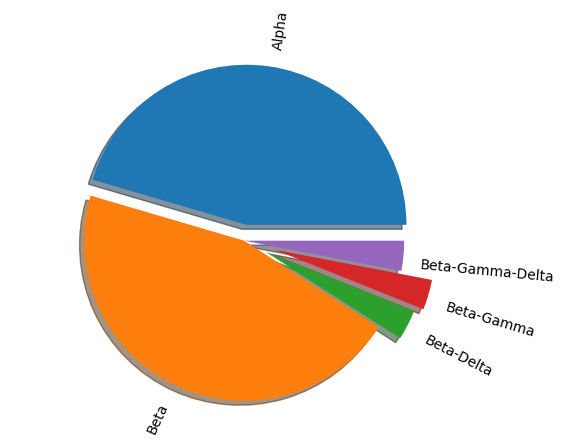

In [ ]:
# Кол-во групп активных областей в 2019 году, распределённых по магнитному типу группы

vals = list(dfacto['Кол-во групп 2019'])
labels = list(dfacto['Магнитный тип группы'])
explode = (0.1, 0, 0.15, 0.2, 0)

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, shadow=True, explode=explode, rotatelabels=True)
ax.axis('equal')

(-1.1098875733398474,
 1.3078619987418447,
 -1.1049611972914148,
 1.204521912546771)

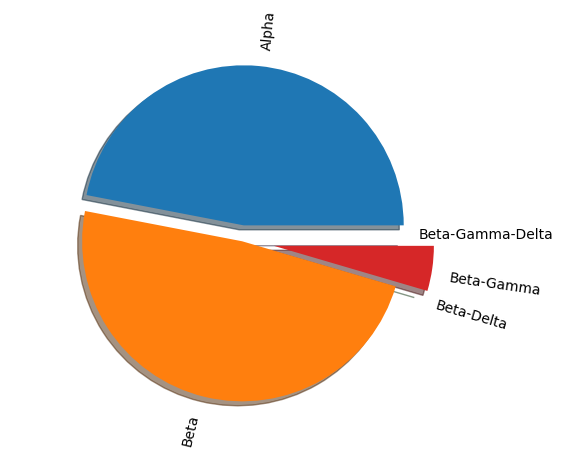

In [ ]:
# Кол-во групп активных областей в 2020 году, распределённых по магнитному типу группы

vals = list(dfacto['Кол-во групп 2020'])
labels = list(dfacto['Магнитный тип группы'])
explode = (0.1, 0, 0.15, 0.2, 0)

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, shadow=True, explode=explode, rotatelabels=True)
ax.axis('equal')

(-1.1093109920828585,
 1.2958694239853303,
 -1.1048452254801877,
 1.2019119850794449)

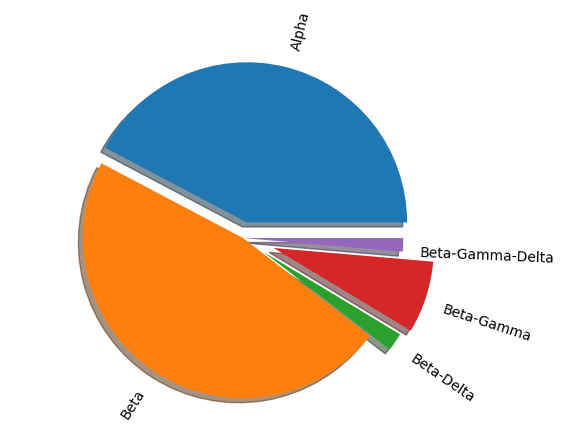

In [ ]:
# Кол-во групп активных областей в 2021 году, распределённых по магнитному типу группы

vals = list(dfacto['Кол-во групп 2021'])
labels = list(dfacto['Магнитный тип группы'])
explode = (0.1, 0, 0.15, 0.2, 0)

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, shadow=True, explode=explode, rotatelabels=True)
ax.axis('equal')

(-1.1086196532452561,
 1.281013054168043,
 -1.1046488945550432,
 1.1976269598915745)

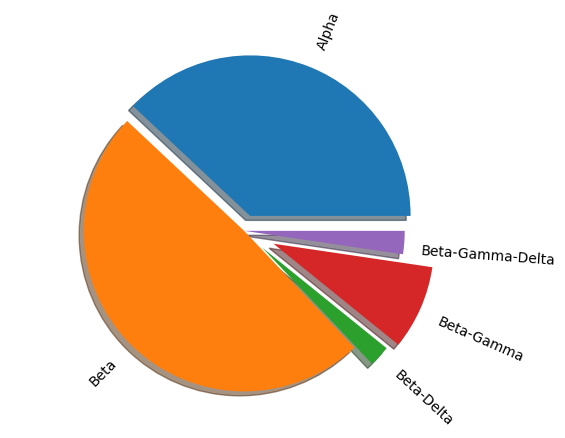

In [ ]:
# Кол-во групп активных областей в 2022 году, распределённых по магнитному типу группы

vals = list(dfacto['Кол-во групп 2022'])
labels = list(dfacto['Магнитный тип группы'])
explode = (0.1, 0, 0.15, 0.2, 0)

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, shadow=True, explode=explode, rotatelabels=True)
ax.axis('equal')

(-1.105663455186116,
 1.2191314613966002,
 -1.201268355222154,
 1.1987969656086155)

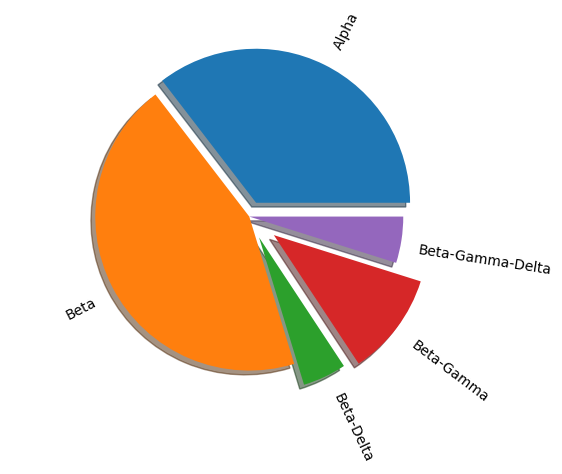

In [ ]:
# Кол-во групп активных областей в 2023 году, распределённых по магнитному типу группы

vals = list(dfacto['Кол-во групп 2023'])
labels = list(dfacto['Магнитный тип группы'])
explode = (0.1, 0, 0.15, 0.2, 0)

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, shadow=True, explode=explode, rotatelabels=True)
ax.axis('equal')

Во всех годах преобладает альфа и бэтта магнитные типы групп. Остальные проявились достаточно сильно в 2023 году.

### 2 Блок - продолжительность вспышки и излучение, тип магнитной группы

#### Приведём для начала данные в нужный тип и объединим датасеты о солнечных вспышках и датасаты об активных пятнах для дальнешего исследования

In [ ]:
dfact_2019.head(2)

,Номер группы,Координаты на Солнце,Число пятен в группе,Классификация группы по модифицированной системе Цюриха,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы,Дата
0,2732,N10 W20,3,Bxo,10,4,215,Beta,2019-01-02
1,2732,N09 W33,6,Dro,30,6,214,Beta,2019-01-03


In [ ]:
dfact_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 9 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Номер группы                                             98 non-null     object
 1   Координаты на Солнце                                     98 non-null     object
 2   Число пятен в группе                                     98 non-null     int64 
 3   Классификация группы по модифицированной системе Цюриха  98 non-null     object
 4   Площадь (в миллионных долях солнечной полусферы)         98 non-null     int64 
 5   Протяженность группы (в градусах)                        98 non-null     int64 
 6   Кэррингтоновская долгота группы (в градусах дуги)        98 non-null     int64 
 7   Магнитный тип группы                                     98 non-null     object
 8   Дата                                       

In [ ]:
dfact_2019['Номер группы'] = dfact_2019['Номер группы'].astype('int')
dfact_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 9 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Номер группы                                             98 non-null     int64 
 1   Координаты на Солнце                                     98 non-null     object
 2   Число пятен в группе                                     98 non-null     int64 
 3   Классификация группы по модифицированной системе Цюриха  98 non-null     object
 4   Площадь (в миллионных долях солнечной полусферы)         98 non-null     int64 
 5   Протяженность группы (в градусах)                        98 non-null     int64 
 6   Кэррингтоновская долгота группы (в градусах дуги)        98 non-null     int64 
 7   Магнитный тип группы                                     98 non-null     object
 8   Дата                                       

In [ ]:
print(dfact_2020.info())
print(dfact_2021.info())
print(dfact_2022.info())
print(dfact_2023.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 9 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Дата                                                     226 non-null    object
 1   Номер группы                                             226 non-null    object
 2   Координаты на Солнце                                     226 non-null    object
 3   Число пятен в группе                                     226 non-null    int64 
 4   Классификация группы по модифицированной системе Цюриха  226 non-null    object
 5   Площадь (в миллионных долях солнечной полусферы)         226 non-null    int64 
 6   Протяженность группы (в градусах)                        226 non-null    int64 
 7   Кэррингтоновская долгота группы (в градусах дуги)        226 non-null    int64 
 8   Магнитный тип группы                     

Номер группы везде имеет тип объект, поменем на целочисленный.

In [ ]:
dfact_2020['Номер группы'] = dfact_2020['Номер группы'].astype('int')
dfact_2020.info()

dfact_2021['Номер группы'] = dfact_2021['Номер группы'].astype('int')
dfact_2021.info()

dfact_2022['Номер группы'] = dfact_2022['Номер группы'].astype('int')
dfact_2022.info()

dfact_2023['Номер группы'] = dfact_2023['Номер группы'].astype('int')
dfact_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 9 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Дата                                                     226 non-null    object
 1   Номер группы                                             226 non-null    int64 
 2   Координаты на Солнце                                     226 non-null    object
 3   Число пятен в группе                                     226 non-null    int64 
 4   Классификация группы по модифицированной системе Цюриха  226 non-null    object
 5   Площадь (в миллионных долях солнечной полусферы)         226 non-null    int64 
 6   Протяженность группы (в градусах)                        226 non-null    int64 
 7   Кэррингтоновская долгота группы (в градусах дуги)        226 non-null    int64 
 8   Магнитный тип группы                     

In [ ]:
dfsun_2019m.head(2)

,Класс,Балл,Активная область,Начало,Окончание,Дата начала вспышки,E,Продолжительность в минутах
0,Вспышка балла C,1.6,2732,2019-01-06 13:31:00,2019-01-06 14:00:00,2019-01-06,0.000002,29
1,Вспышка балла C,1.6,2732,2019-01-07 13:31:00,2019-01-07 14:00:00,2019-01-07,0.000002,29


In [ ]:
dfsun_act19 = dfsun_2019m.merge(dfact_2019, left_on=['Дата начала вспышки', 'Активная область'], right_on=['Дата', 'Номер группы'], how='left')
dfsun_act19 = dfsun_act19.drop(columns=['Номер группы', 'Дата'])
dfsun_act19.head()

,Класс,Балл,Активная область,Начало,Окончание,Дата начала вспышки,E,Продолжительность в минутах,Координаты на Солнце,Число пятен в группе,Классификация группы по модифицированной системе Цюриха,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы
0,Вспышка балла C,1.6,2732,2019-01-06 13:31:00,2019-01-06 14:00:00,2019-01-06,0.000002,29,N10 W74,3.0,Bxo,10.0,7.0,217.0,Beta
1,Вспышка балла C,1.6,2732,2019-01-07 13:31:00,2019-01-07 14:00:00,2019-01-07,0.000002,29,N09 W85,2.0,Bxo,10.0,5.0,213.0,Beta
2,Вспышка балла C,5.0,2733,2019-01-26 16:12:00,2019-01-26 16:34:00,2019-01-26,0.000005,22,N06 W20,17.0,Dri,50.0,9.0,259.0,Beta
3,Вспышка балла C,5.0,2733,2019-01-27 16:12:00,2019-01-27 16:34:00,2019-01-27,0.000005,22,N06 W34,16.0,Dsi,80.0,10.0,260.0,Beta
4,Вспышка балла C,1.9,2733,2019-01-29 13:21:00,2019-01-29 13:40:00,2019-01-29,0.000002,19,N06 W61,6.0,Cso,80.0,10.0,261.0,Beta


In [ ]:
dfsun_act20 = dfsun_2020m.merge(dfact_2020, left_on=['Дата начала вспышки', 'Активная область'], right_on=['Дата', 'Номер группы'], how='left')
dfsun_act20 = dfsun_act20.drop(columns=['Номер группы', 'Дата'])

dfsun_act21 = dfsun_2021m.merge(dfact_2021, left_on=['Дата начала вспышки', 'Активная область'], right_on=['Дата', 'Номер группы'], how='left')
dfsun_act21 = dfsun_act21.drop(columns=['Номер группы', 'Дата'])

dfsun_act22 = dfsun_2019m.merge(dfact_2022, left_on=['Дата начала вспышки', 'Активная область'], right_on=['Дата', 'Номер группы'], how='left')
dfsun_act22 = dfsun_act22.drop(columns=['Номер группы', 'Дата'])

dfsun_act23 = dfsun_2023m.merge(dfact_2023, left_on=['Дата начала вспышки', 'Активная область'], right_on=['Дата', 'Номер группы'], how='left')
dfsun_act23 = dfsun_act23.drop(columns=['Номер группы', 'Дата'])

In [ ]:
dfsun_act19.info()
dfsun_act20.info()
dfsun_act21.info()
dfsun_act22.info()
dfsun_act23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 15 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Класс                                                    48 non-null     object 
 1   Балл                                                     48 non-null     float64
 2   Активная область                                         48 non-null     int64  
 3   Начало                                                   48 non-null     object 
 4   Окончание                                                48 non-null     object 
 5   Дата начала вспышки                                      48 non-null     object 
 6   E                                                        48 non-null     float64
 7   Продолжительность в минутах                              48 non-null     int64  
 8   Координаты на Солнце            

Да пропусков достаточно много, очсобенно в 2022 году. Это связанос тем, что тёмные пятна динамичны и их появление лишь может предвещать солнечную вспышку и выброс корональной массы.

Сохраним датасеты соединённые.

In [ ]:
dfsun_act19.to_excel('dfsun_act19.xlsx', index=False)
!cp dfsun_act19.xlsx "drive/My Drive/Colab Notebooks/Солнце/"

dfsun_act20.to_excel('dfsun_act20.xlsx', index=False)
!cp dfsun_act20.xlsx "drive/My Drive/Colab Notebooks/Солнце/"

dfsun_act21.to_excel('dfsun_act21.xlsx', index=False)
!cp dfsun_act21.xlsx "drive/My Drive/Colab Notebooks/Солнце/"

dfsun_act22.to_excel('dfsun_act22.xlsx', index=False)
!cp dfsun_act22.xlsx "drive/My Drive/Colab Notebooks/Солнце/"

dfsun_act23.to_excel('dfsun_act23.xlsx', index=False)
!cp dfsun_act23.xlsx "drive/My Drive/Colab Notebooks/Солнце/"

#### Что исследуем:

1. самое большое значение Энергии в какой день.
2. самая длительная вспышка.
3. день в году с самым большим кол-м вспышек.

самое большое значение Энергии в какой день и описать характеристики магнитные.

In [ ]:
dfsun_act19.sort_values(by='E', ascending=False).head(3)

,Класс,Балл,Активная область,Начало,Окончание,Дата начала вспышки,E,Продолжительность в минутах,Координаты на Солнце,Число пятен в группе,Классификация группы по модифицированной системе Цюриха,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы
39,Вспышка балла C,9.9,2740,2019-05-06 08:04:00,2019-05-06 08:12:00,2019-05-06,0.000010,8,N08 E54,4.0,Dho,280.0,4.0,307.0,Beta-Delta
35,Вспышка балла C,7.3,2740,2019-05-06 16:35:00,2019-05-06 16:57:00,2019-05-06,0.000007,22,N08 E54,4.0,Dho,280.0,4.0,307.0,Beta-Delta
45,Вспышка балла C,6.7,2740,2019-05-10 08:40:00,2019-05-10 08:56:00,2019-05-10,0.000007,16,N08 W00,4.0,Cao,120.0,3.0,307.0,Beta


In [ ]:
dfsun_act20.sort_values(by='E', ascending=False).head(3)

,Класс,Балл,Активная область,Начало,Окончание,Дата начала вспышки,E,Продолжительность в минутах,Координаты на Солнце,Число пятен в группе,Классификация группы по модифицированной системе Цюриха,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы
40,Вспышка балла M,4.4,0,2020-11-29 15:34:00,2020-11-29 16:41:00,2020-11-29,0.000044,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,Вспышка балла M,4.4,0,2020-11-30 15:34:00,2020-11-30 16:41:00,2020-11-30,0.000044,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,Вспышка балла M,1.1,0,2020-05-30 10:13:00,2020-05-30 10:28:00,2020-05-30,0.000011,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfsun_act21.sort_values(by='E', ascending=False).head(3)

,Класс,Балл,Активная область,Начало,Окончание,Дата начала вспышки,E,Продолжительность в минутах,Координаты на Солнце,Число пятен в группе,Классификация группы по модифицированной системе Цюриха,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы
112,Вспышка балла X,1.5,2838,2021-07-03 17:18:00,2021-07-03 17:34:00,2021-07-03,0.000150,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,Вспышка балла X,1.0,2887,2021-10-28 18:17:00,2021-10-28 18:48:00,2021-10-28,0.000100,31,S26 E04,26.0,Dhi,250.0,8.0,275.0,Beta-Gamma
174,Вспышка балла M,4.7,2860,2021-08-28 08:39:00,2021-08-28 09:23:00,2021-08-28,0.000047,44,S28 E03,22.0,Eki,330.0,12.0,1.0,Beta-Gamma


In [ ]:
dfsun_act22.sort_values(by='E', ascending=False).head(3)

,Класс,Балл,Активная область,Начало,Окончание,Дата начала вспышки,E,Продолжительность в минутах,Координаты на Солнце,Число пятен в группе,Классификация группы по модифицированной системе Цюриха,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы
39,Вспышка балла C,9.9,2740,2019-05-06 08:04:00,2019-05-06 08:12:00,2019-05-06,0.000010,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,Вспышка балла C,7.3,2740,2019-05-06 16:35:00,2019-05-06 16:57:00,2019-05-06,0.000007,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,Вспышка балла C,6.7,2740,2019-05-10 08:40:00,2019-05-10 08:56:00,2019-05-10,0.000007,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfsun_act23.sort_values(by='E', ascending=False).head(3)

,Класс,Балл,Активная область,Начало,Окончание,Дата начала вспышки,E,Продолжительность в минутах,Координаты на Солнце,Число пятен в группе,Классификация группы по модифицированной системе Цюриха,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы
41,Вспышка балла X,2.2,3229,2023-02-17 22:38:00,2023-02-17 23:50:00,2023-02-17,0.00022,72,N30 E70,2.0,Dao,240.0,6.0,36.0,Beta
225,Вспышка балла X,2.1,3234,2023-03-03 20:42:00,2023-03-03 20:59:00,2023-03-03,0.00021,17,N25 W63,20.0,Ekc,830.0,14.0,345.0,Beta-Gamma-Delta
168,Вспышка балла X,1.9,3184,2023-01-09 21:37:00,2023-01-09 21:57:00,2023-01-09,0.00019,20,S13 E81,3.0,Hax,240.0,3.0,179.0,Alpha


самая длительная вспышка.

In [ ]:
dfsun_act19.sort_values(by='Продолжительность в минутах', ascending=False).head(3)

,Класс,Балл,Активная область,Начало,Окончание,Дата начала вспышки,E,Продолжительность в минутах,Координаты на Солнце,Число пятен в группе,Классификация группы по модифицированной системе Цюриха,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы
43,Вспышка балла C,1.2,2740,2019-05-08 12:51:00,2019-05-08 13:58:00,2019-05-08,0.000001,67,N08 E28,6.0,Cso,240.0,5.0,306.0,Beta
41,Вспышка балла C,1.2,2740,2019-05-07 12:51:00,2019-05-07 13:58:00,2019-05-07,0.000001,67,N07 E40,4.0,Cso,200.0,3.0,308.0,Beta-Delta
31,Вспышка балла C,1.0,2740,2019-05-04 01:49:00,2019-05-04 02:49:00,2019-05-04,0.000001,60,N12 E80,1.0,Hhx,260.0,4.0,307.0,Alpha


In [ ]:
dfsun_act20.sort_values(by='Продолжительность в минутах', ascending=False).head(3)

,Класс,Балл,Активная область,Начало,Окончание,Дата начала вспышки,E,Продолжительность в минутах,Координаты на Солнце,Число пятен в группе,Классификация группы по модифицированной системе Цюриха,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы
0,Вспышка балла C,2.6,0,2020-11-26 22:20:00,2020-11-27 02:53:00,2020-11-26,0.000003,273,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,Вспышка балла C,7.4,2790,2020-12-08 18:46:00,2020-12-08 20:33:00,2020-12-08,0.000007,107,S22 W15,1.0,Hsx,50.0,2.0,251.0,Alpha
19,Вспышка балла C,7.4,2790,2020-12-07 18:46:00,2020-12-07 20:33:00,2020-12-07,0.000007,107,S23 W02,1.0,Hsx,60.0,2.0,252.0,Alpha


In [ ]:
dfsun_act21.sort_values(by='Продолжительность в минутах', ascending=False).head(3)

,Класс,Балл,Активная область,Начало,Окончание,Дата начала вспышки,E,Продолжительность в минутах,Координаты на Солнце,Число пятен в группе,Классификация группы по модифицированной системе Цюриха,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы
205,Вспышка балла C,1.6,2871,2021-09-18 10:48:00,2021-09-19 02:48:00,2021-09-18,0.000002,960,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,Вспышка балла C,1.3,2824,2021-05-22 10:10:00,2021-05-22 17:03:00,2021-05-22,0.000001,413,N20 E27,3.0,Hsx,150.0,3.0,194.0,Alpha
319,Вспышка балла M,1.7,2891,2021-11-02 04:20:00,2021-11-02 06:50:00,2021-11-02,0.000017,150,N16 E03,17.0,Dai,230.0,8.0,210.0,Beta


In [ ]:
dfsun_act22.sort_values(by='Продолжительность в минутах', ascending=False).head(3)

,Класс,Балл,Активная область,Начало,Окончание,Дата начала вспышки,E,Продолжительность в минутах,Координаты на Солнце,Число пятен в группе,Классификация группы по модифицированной системе Цюриха,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы
43,Вспышка балла C,1.2,2740,2019-05-08 12:51:00,2019-05-08 13:58:00,2019-05-08,0.000001,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,Вспышка балла C,1.2,2740,2019-05-07 12:51:00,2019-05-07 13:58:00,2019-05-07,0.000001,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,Вспышка балла C,1.0,2740,2019-05-04 01:49:00,2019-05-04 02:49:00,2019-05-04,0.000001,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfsun_act23.sort_values(by='Продолжительность в минутах', ascending=False).head(3)

,Класс,Балл,Активная область,Начало,Окончание,Дата начала вспышки,E,Продолжительность в минутах,Координаты на Солнце,Число пятен в группе,Классификация группы по модифицированной системе Цюриха,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы
642,Вспышка балла C,3.7,3214,2023-02-14 08:08:00,2023-02-14 15:02:00,2023-02-14,0.000004,414,N11 W60,6.0,Eko,360.0,11.0,206.0,Beta
794,Вспышка балла C,3.5,3276,2023-04-10 07:14:00,2023-04-10 12:37:00,2023-04-10,0.000003,323,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601,Вспышка балла C,4.0,0,2023-01-03 10:42:00,2023-01-03 15:33:00,2023-01-03,0.000004,291,NaN,NaN,NaN,NaN,NaN,NaN,NaN


день в году с самым большим кол-м вспышек.

In [ ]:
print(pd.pivot_table(dfsun_act19, index='Дата начала вспышки', values='Балл', aggfunc='count').sort_values(by='Балл', ascending=False).head())
print(pd.pivot_table(dfsun_act20, index='Дата начала вспышки', values='Балл', aggfunc='count').sort_values(by='Балл', ascending=False).head())
print(pd.pivot_table(dfsun_act21, index='Дата начала вспышки', values='Балл', aggfunc='count').sort_values(by='Балл', ascending=False).head())
print(pd.pivot_table(dfsun_act22, index='Дата начала вспышки', values='Балл', aggfunc='count').sort_values(by='Балл', ascending=False).head())
print(pd.pivot_table(dfsun_act23, index='Дата начала вспышки', values='Балл', aggfunc='count').sort_values(by='Балл', ascending=False).head())

                     Балл
Дата начала вспышки      
2019-05-06              7
2019-03-22              6
2019-03-23              6
2019-03-21              5
2019-01-30              3
                     Балл
Дата начала вспышки      
2020-11-06              9
2020-11-05              9
2020-11-04              5
2020-10-30              5
2020-10-29              5
                     Балл
Дата начала вспышки      
2021-12-15             18
2021-10-27             17
2021-12-23             16
2021-12-25             15
2021-12-20             15
                     Балл
Дата начала вспышки      
2019-05-06              7
2019-03-22              6
2019-03-23              6
2019-03-21              5
2019-01-30              3
                     Балл
Дата начала вспышки      
2023-05-20             26
2023-01-10             23
2023-04-10             21
2023-05-19             20
2023-05-03             19


В каких активных областях больше всего вспышек по каждому году.

In [ ]:
print(pd.pivot_table(dfsun_act19, index=['Активная область', 'Класс'], values=['E'], aggfunc='count').sort_values(by='E', ascending=False).head())
print(pd.pivot_table(dfsun_act20, index=['Активная область', 'Класс'], values=['E'], aggfunc='count').sort_values(by='E', ascending=False).head())
print(pd.pivot_table(dfsun_act21, index=['Активная область', 'Класс'], values=['E'], aggfunc='count').sort_values(by='E', ascending=False).head())
print(pd.pivot_table(dfsun_act22, index=['Активная область', 'Класс'], values=['E'], aggfunc='count').sort_values(by='E', ascending=False).head())
print(pd.pivot_table(dfsun_act23, index=['Активная область', 'Класс'], values=['E'], aggfunc='count').sort_values(by='E', ascending=False).head())

                                   E
Активная область Класс              
2736             Вспышка балла C  18
2740             Вспышка балла C  15
2733             Вспышка балла C   9
2732             Вспышка балла C   2
2734             Вспышка балла C   2
                                   E
Активная область Класс              
2781             Вспышка балла C  25
2786             Вспышка балла C  18
2779             Вспышка балла C  14
0                Вспышка балла C  13
2790             Вспышка балла C   8
                                   E
Активная область Класс              
2907             Вспышка балла C  61
0                Вспышка балла C  50
2891             Вспышка балла C  28
2824             Вспышка балла C  28
2887             Вспышка балла C  26
                                   E
Активная область Класс              
2736             Вспышка балла C  18
2740             Вспышка балла C  15
2733             Вспышка балла C   9
2732             Вспышка балла C   2
2

### 3 Блок - Магнитные бури

In [ ]:
magnetic_storms_2019.head()

,Дата,Поток радиоизлучения (10.7 см),Усредненный планетарный A-индекс,Усредненный планетарный Kp-индекс,Балл магнитного шторма
0,2019-01-01,72,7,3 (30 nT),не было магнитных бурь
1,2019-01-02,75,6,1 (7 nT),не было магнитных бурь
2,2019-01-03,75,5,1 (7 nT),не было магнитных бурь
3,2019-01-04,73,9,3 (30 nT),не было магнитных бурь
4,2019-01-05,72,14,5 (95 nT),G1


In [ ]:
df19 = pd.pivot_table(magnetic_storms_2019, index='Балл магнитного шторма', values='Дата', aggfunc='count').reset_index().rename(columns={'Дата':'Дата-19'})
df20 = pd.pivot_table(magnetic_storms_2020, index='Балл магнитного шторма', values='Дата', aggfunc='count').reset_index().rename(columns={'Дата':'Дата-20'})
df21 = pd.pivot_table(magnetic_storms_2021, index='Балл магнитного шторма', values='Дата', aggfunc='count').reset_index().rename(columns={'Дата':'Дата-21'})
df22 = pd.pivot_table(magnetic_storms_2022, index='Балл магнитного шторма', values='Дата', aggfunc='count').reset_index().rename(columns={'Дата':'Дата-22'})
df23 = pd.pivot_table(magnetic_storms_2023, index='Балл магнитного шторма', values='Дата', aggfunc='count').reset_index().rename(columns={'Дата':'Дата-23'})
dfall = df19.merge(df20, on='Балл магнитного шторма', how='outer').merge(df21, on='Балл магнитного шторма', how='outer').merge(df22, on='Балл магнитного шторма', how='outer').merge(df23, on='Балл магнитного шторма', how='outer').fillna(0)
dfall

,Балл магнитного шторма,Дата-19,Дата-20,Дата-21,Дата-22,Дата-23
0,G1,15.0,10.0,24.0,42.0,0.0
1,G2,3.0,1.0,3.0,8.0,3.0
2,G3,1.0,0.0,2.0,1.0,3.0
3,не было магнитных бурь,344.0,355.0,335.0,272.0,174.0
4,G4,0.0,0.0,0.0,0.0,1.0


Как видно из сводного датасета, в 2023 году появилась первая сильная буря - балл G4. До 2023 года также явно видна тенденция на сокращение кол-ва дней без магнитных бурь. Посмотрим были ли солнечные вспышки в этот день.

In [ ]:
magnetic_storms_2023[magnetic_storms_2023['Балл магнитного шторма']=='G4']

,Дата,Поток радиоизлучения (10.7 см),Усредненный планетарный A-индекс,Усредненный планетарный Kp-индекс,Балл магнитного шторма
113,2023-04-24,135,78,8 (440 nT),G4


In [ ]:
dfsun_act23[dfsun_act23['Дата начала вспышки']=='2023-04-24']

,Класс,Балл,Активная область,Начало,Окончание,Дата начала вспышки,E,Продолжительность в минутах,Координаты на Солнце,Число пятен в группе,Классификация группы по модифицированной системе Цюриха,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы
257,Вспышка балла C,1.5,3285,2023-04-24 20:19:00,2023-04-24 20:31:00,2023-04-24,0.000002,12,S17 E44,7.0,Dao,190.0,9.0,272.0,Beta
328,Вспышка балла C,1.1,3282,2023-04-24 19:14:00,2023-04-24 19:29:00,2023-04-24,0.000001,15,N12 W70,8.0,Fki,300.0,16.0,26.0,Beta-Gamma
568,Вспышка балла C,2.8,3283,2023-04-24 15:59:00,2023-04-24 16:10:00,2023-04-24,0.000003,11,S22 W41,4.0,Bxo,10.0,7.0,358.0,Beta
683,Вспышка балла C,2.2,3282,2023-04-24 14:06:00,2023-04-24 14:20:00,2023-04-24,0.000002,14,N12 W70,8.0,Fki,300.0,16.0,26.0,Beta-Gamma


В этот день были 4 вспышки. Сильная магнитная активность спровоцировала выброс высокоэнергетичных заряженных частиц.

In [5]:
ms19 = magnetic_storms_2019.drop(columns=['Поток радиоизлучения (10.7 см)',	'Усредненный планетарный A-индекс',	'Усредненный планетарный Kp-индекс'])
ms20 = magnetic_storms_2020.drop(columns=['Поток радиоизлучения (10.7 см)',	'Усредненный планетарный A-индекс',	'Усредненный планетарный Kp-индекс'])
ms21 = magnetic_storms_2021.drop(columns=['Поток радиоизлучения (10.7 см)',	'Усредненный планетарный A-индекс',	'Усредненный планетарный Kp-индекс'])
ms22 = magnetic_storms_2022.drop(columns=['Поток радиоизлучения (10.7 см)',	'Усредненный планетарный A-индекс',	'Усредненный планетарный Kp-индекс'])
ms23 = magnetic_storms_2023.drop(columns=['Поток радиоизлучения (10.7 см)',	'Усредненный планетарный A-индекс',	'Усредненный планетарный Kp-индекс'])

ms19['Дата'] = ms19['Дата'].astype('object')
ms20['Дата'] = ms20['Дата'].astype('object')
ms21['Дата'] = ms21['Дата'].astype('object')
ms22['Дата'] = ms22['Дата'].astype('object')
ms23['Дата'] = ms23['Дата'].astype('object')

ms19['Дата'] = ms19['Дата'].astype(str).str[:-9]
ms20['Дата'] = ms20['Дата'].astype(str).str[:-9]
ms21['Дата'] = ms21['Дата'].astype(str).str[:-9]
ms22['Дата'] = ms22['Дата'].astype(str).str[:-9]
ms23['Дата'] = ms23['Дата'].astype(str).str[:-9]

dfsam19 = dfsun_act19.merge(ms19, left_on='Дата начала вспышки', right_on='Дата', how='left')
dfsam20 = dfsun_act20.merge(ms20, left_on='Дата начала вспышки', right_on='Дата', how='left')
dfsam21 = dfsun_act21.merge(ms21, left_on='Дата начала вспышки', right_on='Дата', how='left')
dfsam22 = dfsun_act22.merge(ms22, left_on='Дата начала вспышки', right_on='Дата', how='left')
dfsam23 = dfsun_act23.merge(ms23, left_on='Дата начала вспышки', right_on='Дата', how='left')

In [6]:
print(dfsam19.info())
print(dfsam20.info())
print(dfsam21.info())
print(dfsam22.info())
print(dfsam23.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 17 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Класс                                                    48 non-null     object 
 1   Балл                                                     48 non-null     float64
 2   Активная область                                         48 non-null     int64  
 3   Начало                                                   48 non-null     object 
 4   Окончание                                                48 non-null     object 
 5   Дата начала вспышки                                      48 non-null     object 
 6   E                                                        48 non-null     float64
 7   Продолжительность в минутах                              48 non-null     int64  
 8   Координаты на Солнце            

In [ ]:
dfsam23.sort_values(by='Дата начала вспышки', ascending=False).head(2)

,Класс,Балл,Активная область,Начало,Окончание,Дата начала вспышки,E,Продолжительность в минутах,Координаты на Солнце,Число пятен в группе,Классификация группы по модифицированной системе Цюриха,Площадь (в миллионных долях солнечной полусферы),Протяженность группы (в градусах),Кэррингтоновская долгота группы (в градусах дуги),Магнитный тип группы,Дата,Балл магнитного шторма
510,Вспышка балла C,4.2,3354,2023-06-30 16:44:00,2023-06-30 16:59:00,2023-06-30,0.000004,15,N15 W16,40.0,Ekc,890.0,13.0,166.0,Beta-Gamma-Delta,2023-06-30,не было магнитных бурь
165,Вспышка балла C,3.7,3354,2023-06-30 21:53:00,2023-06-30 22:01:00,2023-06-30,0.000004,8,N15 W16,40.0,Ekc,890.0,13.0,166.0,Beta-Gamma-Delta,2023-06-30,не было магнитных бурь


In [9]:
dfsam23.pivot_table(values='Балл', index='Балл магнитного шторма', columns='Класс', aggfunc=lambda x: len(x.unique()))

Класс,Вспышка балла C,Вспышка балла M,Вспышка балла X
Балл магнитного шторма,,,
G2,19.0,2.0,NaN
G3,12.0,NaN,NaN
G4,4.0,NaN,NaN
не было магнитных бурь,89.0,49.0,6.0


In [14]:
dfsam22.pivot_table(values='Балл', index='Балл магнитного шторма', columns='Класс', aggfunc=lambda x: len(x.unique()))

Класс
Балл магнитного шторма


In [11]:
dfsam21.pivot_table(values='Балл', index='Балл магнитного шторма', columns='Класс', aggfunc=lambda x: len(x.unique()))

Класс,Вспышка балла C,Вспышка балла M,Вспышка балла X
Балл магнитного шторма,,,
G1,19.0,2.0,NaN
G2,2.0,NaN,NaN
G3,4.0,NaN,NaN
не было магнитных бурь,64.0,14.0,2.0


In [12]:
dfsam20.pivot_table(values='Балл', index='Балл магнитного шторма', columns='Класс', aggfunc=lambda x: len(x.unique()))

Класс,Вспышка балла C,Вспышка балла M
Балл магнитного шторма,,
G1,3.0,NaN
не было магнитных бурь,27.0,2.0


In [13]:
dfsam19.pivot_table(values='Балл', index='Балл магнитного шторма', columns='Класс', aggfunc=lambda x: len(x.unique()))

Класс,Вспышка балла C
Балл магнитного шторма,
не было магнитных бурь,18


Здесь явна видна динамика увеличения и солнечных вспышек и магнитных бурь. Единственное - 2022 год - провал в анализируемых значениях. Возможно не все данные были переданы.